#                   data model to predict the probability of default for XYZ org.

### IMPORTING Libraries

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

## Reading the data from source file 

In [2]:
os.chdir(r"/home/aryan/Programs & Projects/Machine Learning/IMARTICUS DATA SCIENCE/CapStone Project/Python Project - Bank Lending")
data = pd.read_csv('XYZCorp_LendingData.txt',sep="\t",low_memory=False)

In [3]:
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  ... il_util open_rv_12m open_rv_24m  \
0     10.65       162.87     B        B2  ...     NaN         NaN         NaN   
1     15.27        59.83     C        C4  ...     NaN         NaN         NaN   
2     15.96        84.33     C        C5  ...     NaN         NaN         NaN   
3     13.49       339.31     C        C1  ...     NaN         NaN         NaN   
4     12.69        67.79     B        B5  ...     NaN         NaN         NaN   

   max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  \
0         NaN      NaN              NaN    NaN         NaN          NaN   
1         NaN      NaN              NaN    NaN         NaN          NaN   
2         NaN      NaN              NaN    NaN         NaN          NaN   
3         NaN      NaN              NaN    NaN         NaN          NaN   
4         NaN      NaN              NaN    NaN         NaN          NaN   

  default_ind  
0           0  
1           1  
2           0  
3           0  
4           0  

[5 rows x 73 columns]

In [4]:
data.shape

(855969, 73)

In [5]:
data.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths           

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

In [7]:
data.describe()

id     member_id      loan_amnt    funded_amnt  \
count  8.559690e+05  8.559690e+05  855969.000000  855969.000000   
mean   3.224073e+07  3.476269e+07   14745.571335   14732.378305   
std    2.271969e+07  2.399418e+07    8425.340005    8419.471653   
min    5.473400e+04  7.069900e+04     500.000000     500.000000   
25%    9.067986e+06  1.079273e+07    8000.000000    8000.000000   
50%    3.431355e+07  3.697532e+07   13000.000000   13000.000000   
75%    5.446311e+07  5.803559e+07   20000.000000   20000.000000   
max    6.861687e+07  7.351969e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    855969.000000  855969.000000  855969.000000  8.559690e+05   
mean      14700.061226      13.192320     436.238072  7.507119e+04   
std        8425.805478       4.368365     243.726876  6.426447e+04   
min           0.000000       5.320000      15.690000  0.000000e+00   
25%        8000.000000       9.990000     260.550000  4.500000e+04   
50%       13000.000000      12.990000     382.550000  6.500000e+04   
75%       20000.000000      15.990000     571.560000  9.000000e+04   
max       35000.000000      28.990000    1445.460000  9.500000e+06   

                 dti    delinq_2yrs  ...       il_util   open_rv_12m  \
count  855969.000000  855969.000000  ...  11609.000000  13288.000000   
mean       18.122165       0.311621  ...     71.486993      1.354305   
std        17.423629       0.857189  ...     23.015293      1.483710   
min         0.000000       0.000000  ...      0.000000      0.000000   
25%        11.880000       0.000000  ...     58.500000      0.000000   
50%        17.610000       0.000000  ...     75.000000      1.000000   
75%        23.900000       0.000000  ...     87.500000      2.000000   
max      9999.000000      39.000000  ...    223.300000     22.000000   

        open_rv_24m    max_bal_bc      all_util  total_rev_hi_lim  \
count  13288.000000  13288.000000  13288.000000      7.886560e+05   
mean       2.945515   5840.443332     61.024526      3.216357e+04   
std        2.595313   5108.500262     20.018117      3.769964e+04   
min        0.000000      0.000000      0.000000      0.000000e+00   
25%        1.000000   2405.000000     47.900000      1.400000e+04   
50%        2.000000   4485.500000     62.100000      2.380000e+04   
75%        4.000000   7701.250000     75.300000      3.990000e+04   
max       43.000000  83047.000000    151.400000      9.999999e+06   

             inq_fi   total_cu_tl  inq_last_12m    default_ind  
count  13288.000000  13288.000000  13288.000000  855969.000000  
mean       0.947772      1.524232      1.841963       0.054286  
std        1.441667      2.697601      2.975049       0.226581  
min        0.000000      0.000000     -4.000000       0.000000  
25%        0.000000      0.000000      0.000000       0.000000  
50%        0.000000      0.000000      2.000000       0.000000  
75%        1.000000      2.000000      3.000000       0.000000  
max       15.000000     33.000000     32.000000       1.000000  

[8 rows x 52 columns]

In [8]:
data.describe(include=object)

term   grade sub_grade emp_title emp_length home_ownership  \
count       855969  855969    855969    806526     812908         855969   
unique           2       7        35    290912         11              6   
top      36 months       B        B3   Teacher  10+ years       MORTGAGE   
freq        600221  247998     54958     12965     282090         429106   

       verification_status   issue_d pymnt_plan    desc  ...  \
count               855969    855969     855969  121812  ...   
unique                   3       103          2  120335  ...   
top        Source Verified  Oct-2015          n          ...   
freq                318178     48212     855964     231  ...   

                     title zip_code addr_state earliest_cr_line  \
count               855936   855969     855969           855969   
unique               60991      931         51              697   
top     Debt consolidation    945xx         CA         Aug-2001   
freq                398089     9466     125172             6433   

       initial_list_status last_pymnt_d next_pymnt_d last_credit_pull_d  \
count               855969       847107       602998             855919   
unique                   2           97            3                102   
top                      f     Jan-2016     Feb-2016           Jan-2016   
freq                442555       467510       534094             701687   

       application_type verification_status_joint  
count            855969                       442  
unique                2                         3  
top          INDIVIDUAL              Not Verified  
freq             855527                       252  

[4 rows x 21 columns]

## Exploratory Data Analysis

##### Checking NULL values and treating them

In [9]:
data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [10]:
null_cols = [x for x in data.count() < 855969*0.40]
data.drop(data.columns[null_cols], 1, inplace=True)

In [11]:
data.shape

(855969, 53)

We observe 20 columns are dropped which had more than 60% NAN values of the total datapoint, hence they would not have contributed towards prediction. For the remaining columns which have null values we will check and treat them using various methods

#### Treating Null values

In [12]:
#mths_since_last_delinq has 439812 null values lets check their various parameters
print (data.mths_since_last_delinq.min(), data.mths_since_last_delinq.max())
print(data.mths_since_last_delinq.mean())
print(data.mths_since_last_delinq.median())
print(data.mths_since_last_delinq.mode())

0.0 188.0
34.14994341078007
31.0
0    9.0
dtype: float64


In [13]:
# we will replace NA values with Median value of the column, after treatement we see zero Null Values
data.mths_since_last_delinq = data.mths_since_last_delinq.fillna(data.mths_since_last_delinq.median())
data.mths_since_last_delinq.isnull().sum()

0

In [14]:
#emp_title- Lets check various parameters
data['emp_title'].describe()

count      806526
unique     290912
top       Teacher
freq        12965
Name: emp_title, dtype: object

We observe a lot of unique values here more than 29000 which would be difficlut to visualize, Lets see graphically 
probably we will take a call later in visualization to keep it or drop this feature.

In [15]:
#revol_util- Lets check various parameters here
print (data.revol_util.min(), data.revol_util.max())
print(data.revol_util.mean())
print(data.revol_util.median())
print(data.revol_util.mode())

0.0 892.3
55.019404504615196
55.9
0    0.0
dtype: float64


In [16]:
#We will replace null values here with mean of this feature. 
data.revol_util = data.revol_util.fillna(data.revol_util.mean())
data.revol_util.isnull().sum()

0

In [17]:
#last_pymnt_d- Since these are dates we will fill the null values with previous values
data["last_pymnt_d"].fillna( method ='ffill', inplace = True) 
#next_pymnt_d- Since these are dates we will fill the null values with previous values
data["next_pymnt_d"].fillna( method ='ffill', inplace = True) 

In [18]:
#  -- tot_coll_amt  -- tot_cur_bal -- total_rev_hi_lim- Lets check features of all and treat NA with Mean
#tot_coll_amt
print (data.tot_coll_amt.min(), data.tot_coll_amt.max())
print(data.tot_coll_amt.mean())
print(data.tot_coll_amt.median())
print(data.tot_coll_amt.mode())
print('*********************')
print('*********************')

#tot_cur_bal
print (data.tot_cur_bal.min(), data.tot_cur_bal.max())
print(data.tot_cur_bal.mean())
print(data.tot_cur_bal.median())
print(data.tot_cur_bal.mode())
print('*********************')
print('*********************')
#total_rev_hi_lim
print (data.total_rev_hi_lim.min(), data.total_rev_hi_lim.max())
print(data.total_rev_hi_lim.mean())
print(data.total_rev_hi_lim.median())
print(data.total_rev_hi_lim.mode())

data.tot_coll_amt = data.tot_coll_amt.fillna(data.tot_coll_amt.mean())
data.tot_cur_bal = data.tot_cur_bal.fillna(data.tot_cur_bal.mean())
data.total_rev_hi_lim = data.total_rev_hi_lim.fillna(data.total_rev_hi_lim.mean())

0.0 9152545.0
225.41288216915868
0.0
0    0.0
dtype: float64
*********************
*********************
0.0 8000078.0
139766.24752870706
81008.5
0    0.0
dtype: float64
*********************
*********************
0.0 9999999.0
32163.5745255219
23800.0
0    15000.0
dtype: float64


In [19]:
#last_credit_pull_d- replace null with previous datapoint
data["last_credit_pull_d"].fillna( method ='ffill', inplace = True) 

In [20]:
#collections_12_mths_ex_med- Lets check various features
print (data.collections_12_mths_ex_med.min(), data.collections_12_mths_ex_med.max())
print(data.collections_12_mths_ex_med.mean())
print(data.collections_12_mths_ex_med.median())
print(data.collections_12_mths_ex_med.mode())

0.0 20.0
0.014230418278493258
0.0
0    0.0
dtype: float64


In [21]:
#replacing NA with Median
data.collections_12_mths_ex_med = data.collections_12_mths_ex_med.fillna(data.collections_12_mths_ex_med.median())

In [22]:
#title
data['title'].describe()

count                 855936
unique                 60991
top       Debt consolidation
freq                  398089
Name: title, dtype: object

In [23]:
#60991 unique values this may not convey much information so will later take call to discard or keept it
data["title"].fillna( method ='ffill', inplace = True)

In [24]:
#next_pymnt_d
data["next_pymnt_d"].value_counts()

Feb-2016    756807
Jan-2016     99081
Mar-2016        77
Name: next_pymnt_d, dtype: int64

In [25]:
data["next_pymnt_d"].describe()

count       855965
unique           3
top       Feb-2016
freq        756807
Name: next_pymnt_d, dtype: object

In [26]:
#replacing NA with most frequent value which is Feb-2016
data["next_pymnt_d"].fillna('Feb-2016', inplace = True) 

##### LETs check the target variable 

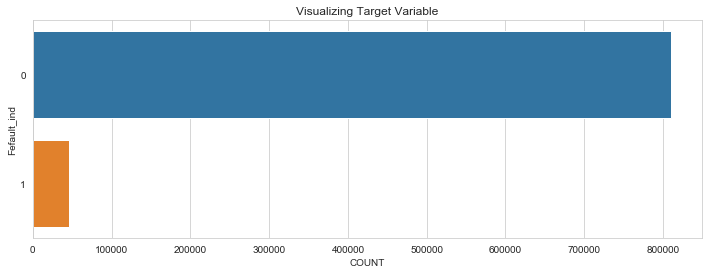

In [27]:
plt.figure(figsize= (12,4))
sns.set_style("whitegrid")
sns.countplot(y='default_ind',data=data)
plt.title("Visualizing Target Variable")
plt.xlabel('COUNT')
plt.ylabel('Fefault_ind')
plt.show()

In [312]:
data['default_ind'].value_counts()

0    804383
1     45668
Name: default_ind, dtype: int64

Its a highly impalanced target that we have, So for model fitting IMBALANCE treatement would be required here which we will 
do once we have done the Data cleaning part 

In [28]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     49443
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq            0
open_acc                          0
pub_rec                     

In [29]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

Lets visualize a few parameters after treating Null values

##### DATA VISUALIZATION

In [30]:
dt_series = pd.to_datetime(data['issue_d'])
data['year'] = dt_series.dt.year
data['year'] = data['year'].astype(object)

Text(0.5, 1.0, 'Loan Amount issued v/s Year of iisue')

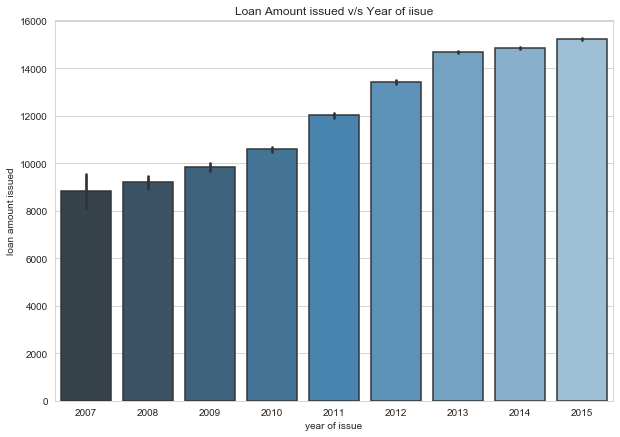

In [31]:
# Lets check how much loan amount was issue in which year

plt.figure(figsize= (10,7))
sns.barplot('year', 'loan_amnt', data=data, palette="Blues_d",linewidth=1.5, errcolor=".2", edgecolor=".2")
plt.ylabel('loan amount issued')
plt.xlabel('year of issue')
plt.title('Loan Amount issued v/s Year of iisue')

Thus it can be concluded that LOAN amount issued kept in increasing with each year.

Text(0.5, 1.0, 'Defaulters v/s Year')

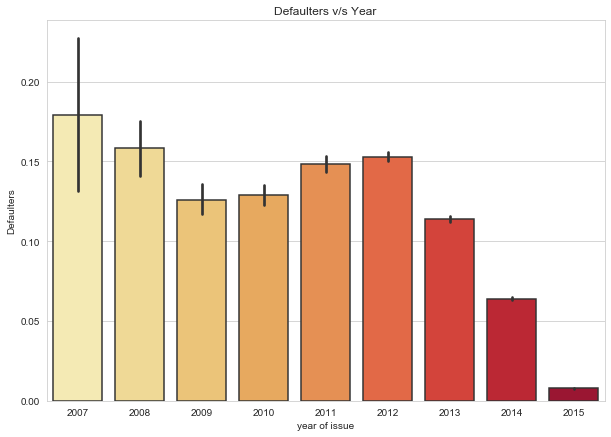

In [32]:
# NOW Let's check defaulters yearwise
# Lets check how much loan amount was issue in which year

plt.figure(figsize= (10,7))
sns.barplot('year', 'default_ind', data=data, palette="YlOrRd",linewidth=1.5, errcolor=".2", edgecolor=".2")
plt.ylabel('Defaulters')
plt.xlabel('year of issue')
plt.title('Defaulters v/s Year')

Text(0.5, 1.0, 'Loan Amt v/s grade')

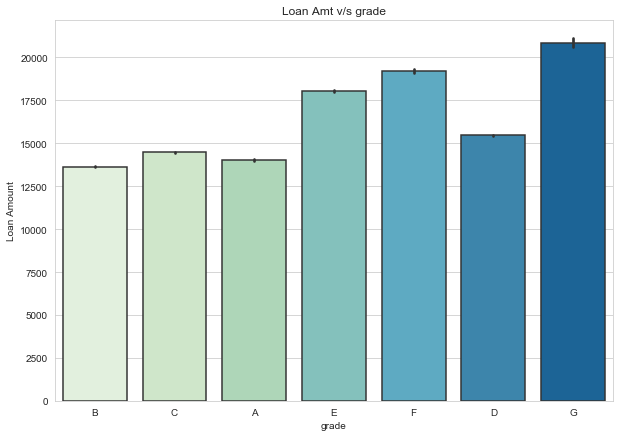

In [33]:
#grade vs loan amount
plt.figure(figsize= (10,7))
sns.barplot('grade', 'loan_amnt', data=data, palette="GnBu",linewidth=1.5, errcolor=".2", edgecolor=".2")
plt.ylabel('Loan Amount')
plt.xlabel('grade')
plt.title('Loan Amt v/s grade')


Text(0.5, 1.0, 'Loan Amt v/s grade')

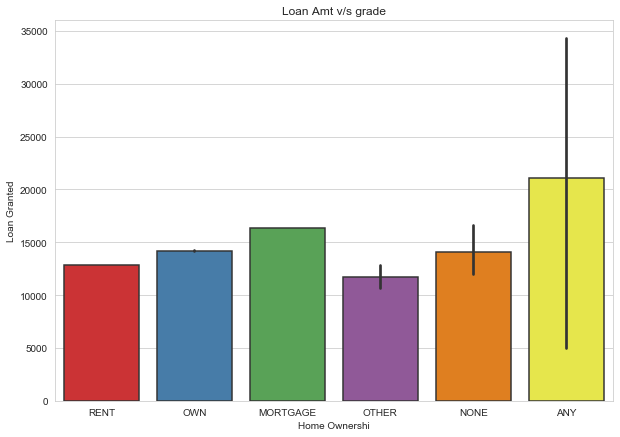

In [34]:
#'home_ownership' vs Loan granted

plt.figure(figsize= (10,7))
sns.barplot('home_ownership','loan_amnt', data=data, palette="Set1",linewidth=1.5, errcolor=".2", edgecolor=".2")
plt.ylabel('Loan Granted')
plt.xlabel('Home Ownershi')
plt.title('Loan Amt v/s grade')

Text(0.5, 1.0, 'Loan Amt v/s purpose')

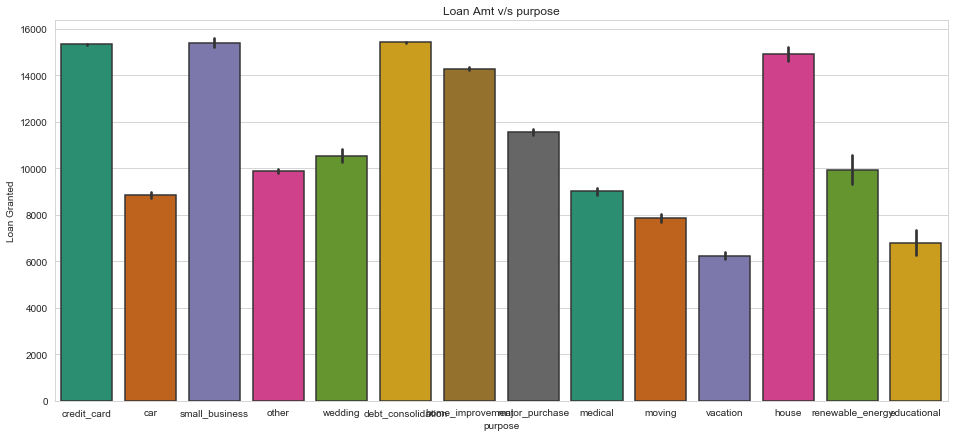

In [35]:
#purpose vs Loan

plt.figure(figsize= (16,7))
sns.barplot('purpose','loan_amnt', data=data, palette="Dark2",linewidth=1.5, errcolor=".2", edgecolor=".2")
plt.ylabel('Loan Granted')
plt.xlabel('purpose')
plt.title('Loan Amt v/s purpose')

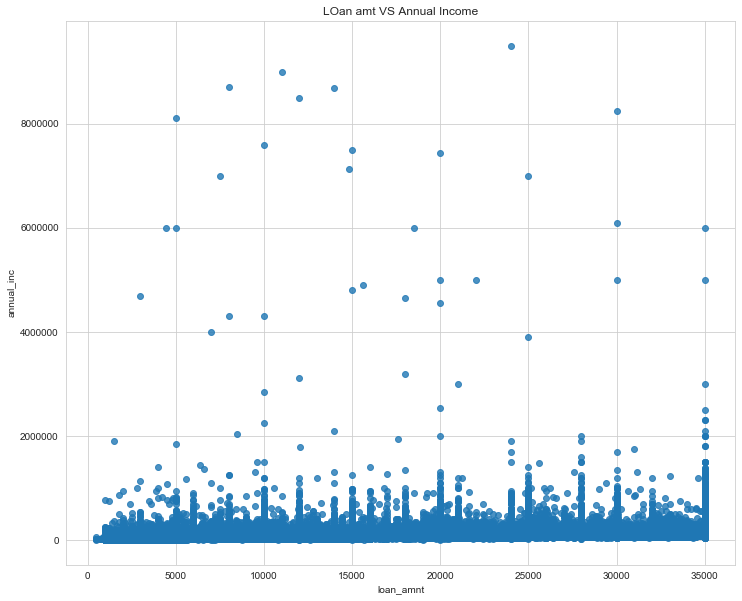

In [36]:
#  loan given wrt anuual income
plt.plot
plt.figure(figsize= (12,10))
g = sns.regplot(x=data['loan_amnt'], y=data['annual_inc'], fit_reg=False).set_title("LOan amt VS Annual Income")
#it does not convey much

Above we have visualized a few relations wrt LOAN amount, Now for further EDA We will Diveide data into numerical and 
categorical and seperately treat them , check their relation wrt target variable and treat possible outliers in them

In [37]:
data.drop(['year'], axis=1, inplace = True)

In [38]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

### Plugging out Numerical Columns and treating them Seperately

In [39]:
data_num = data.select_dtypes(include = ['float64', 'int64'])

In [40]:
data_num.shape

(855969, 34)

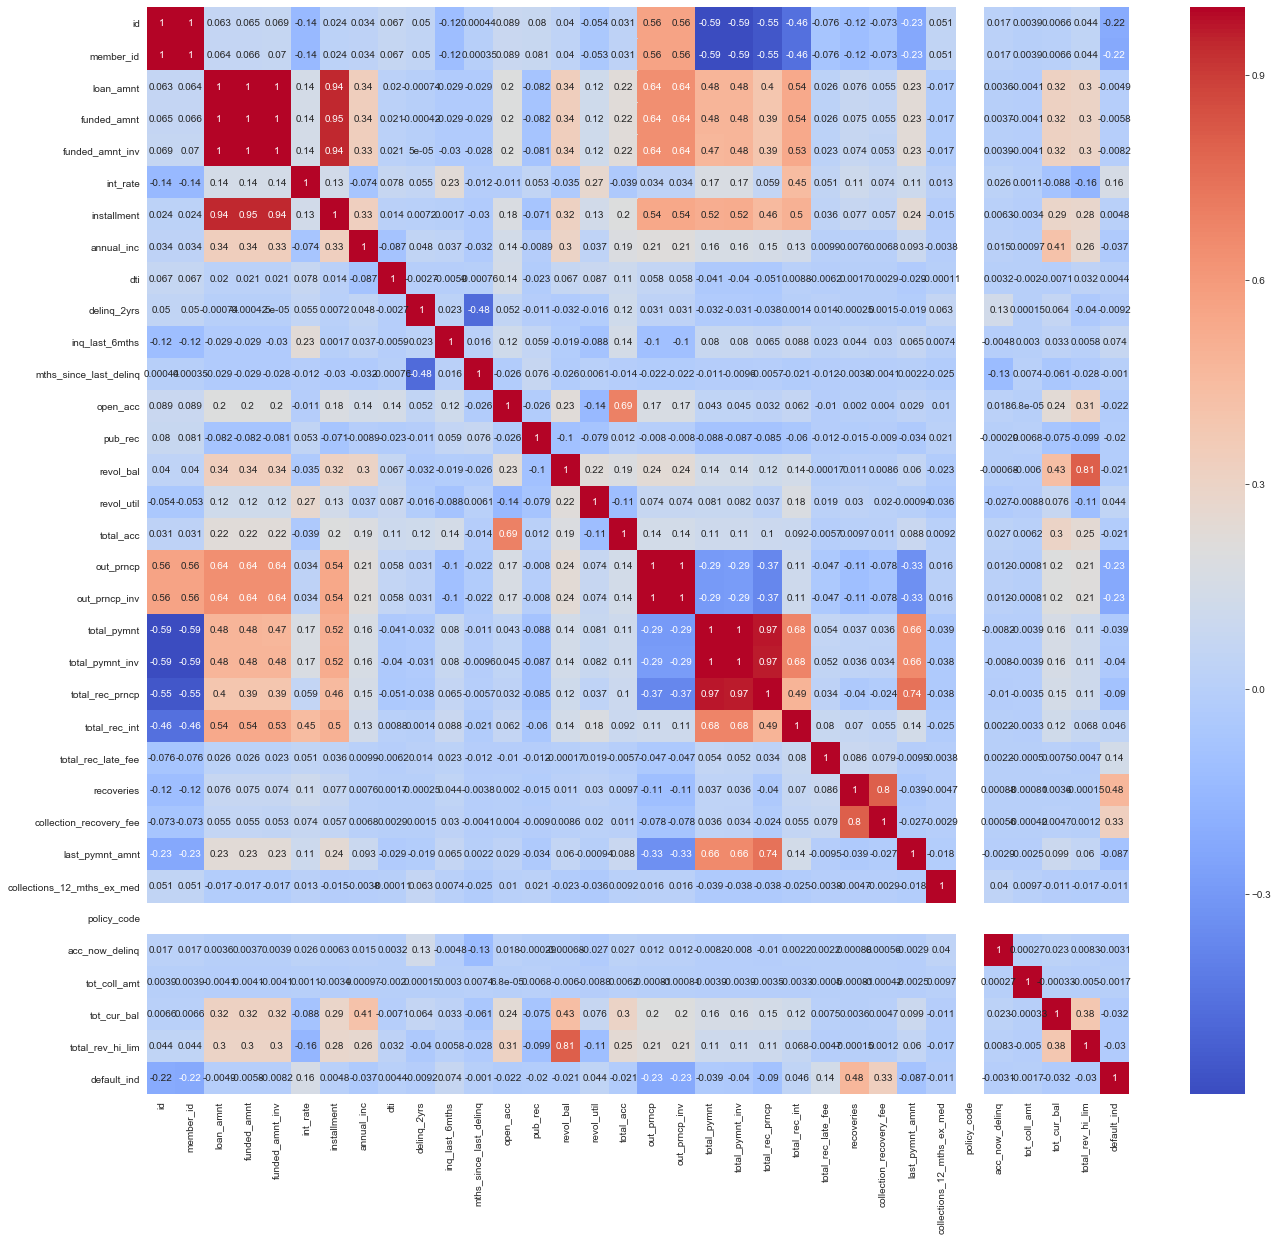

In [41]:
#Using Pearson Correlation
plt.figure(figsize=(22,20))
cor = data_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.coolwarm)
plt.show()

##### Checking for Multicolinearity & removing the columns with ration greater than 0.8

In [42]:
corr_matrix = data_num.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['member_id',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee',
 'total_rev_hi_lim']

In [43]:
# Drop features 
data_num=data_num.drop(data_num[to_drop], axis=1)

In [44]:
data_num.drop(['id','policy_code'], axis = 1, inplace = True)
data_num.head()

loan_amnt  int_rate  annual_inc    dti  delinq_2yrs  inq_last_6mths  \
0     5000.0     10.65     24000.0  27.65          0.0             1.0   
1     2500.0     15.27     30000.0   1.00          0.0             5.0   
2     2400.0     15.96     12252.0   8.72          0.0             2.0   
3    10000.0     13.49     49200.0  20.00          0.0             1.0   
4     3000.0     12.69     80000.0  17.94          0.0             0.0   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  ...   total_pymnt  \
0                    31.0       3.0      0.0    13648.0  ...   5861.071414   
1                    31.0       3.0      0.0     1687.0  ...   1008.710000   
2                    31.0       2.0      0.0     2956.0  ...   3003.653644   
3                    35.0      10.0      0.0     5598.0  ...  12226.302212   
4                    38.0      15.0      0.0    27783.0  ...   3242.170000   

   total_rec_int  total_rec_late_fee  recoveries  last_pymnt_amnt  \
0         861.07                0.00        0.00           171.62   
1         435.17                0.00      117.08           119.66   
2         603.65                0.00        0.00           649.91   
3        2209.33               16.97        0.00           357.48   
4        1009.07                0.00        0.00            67.79   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt    tot_cur_bal  \
0                         0.0             0.0    225.412882  139766.247529   
1                         0.0             0.0    225.412882  139766.247529   
2                         0.0             0.0    225.412882  139766.247529   
3                         0.0             0.0    225.412882  139766.247529   
4                         0.0             0.0    225.412882  139766.247529   

   default_ind  
0            0  
1            1  
2            0  
3            0  
4            0  

[5 rows x 23 columns]

In [45]:
data_num.shape

(855969, 23)

Checking Correlation again

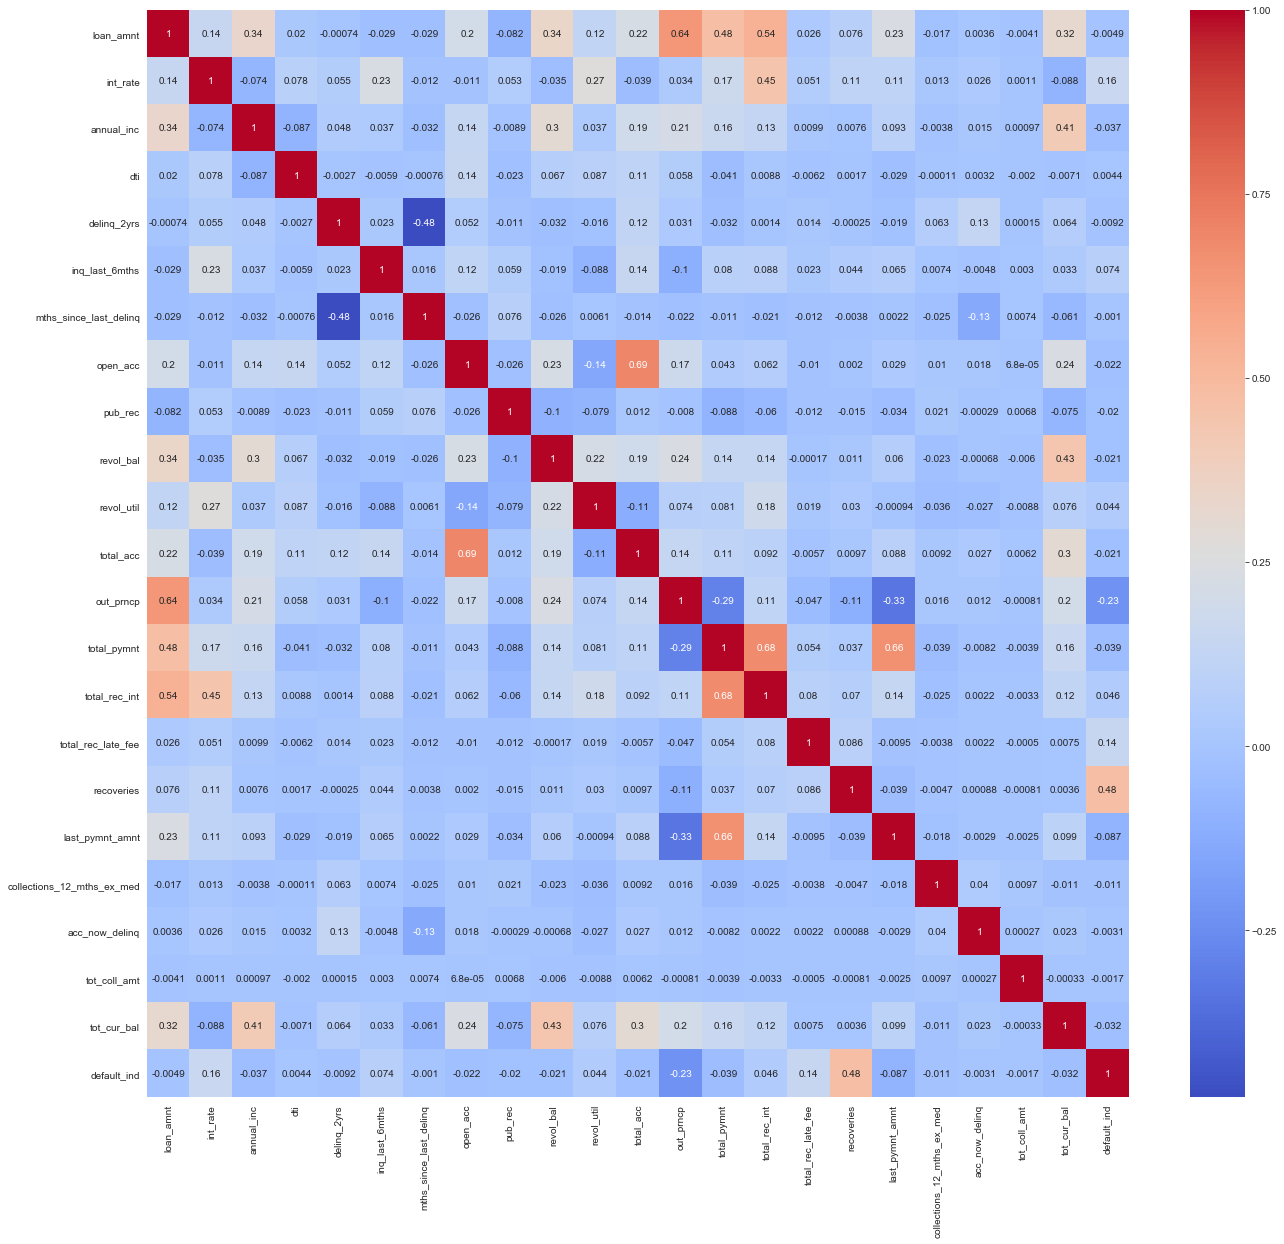

In [46]:
#Using Pearson Correlation
plt.figure(figsize=(22,20))
cor = data_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.coolwarm)
plt.show()

#### Now Checking all numerical columns, checking outliers, applying outlier treatement wherever applicable 
####  and finally comparing feature wrt Target variable

In [47]:
#annual_inc
data_num['annual_inc']= data_num['annual_inc'].astype(float)
data_num['annual_inc'].describe()

count    8.559690e+05
mean     7.507119e+04
std      6.426447e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

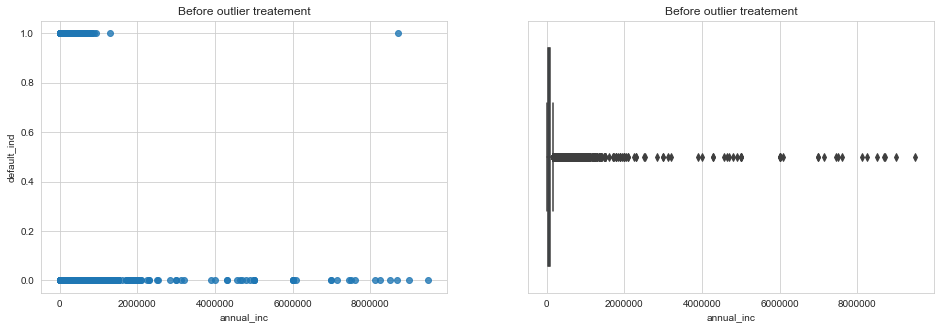

In [48]:
#Checking Outlier annual_inc
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['annual_inc'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['annual_inc']).set_title("Before outlier treatement")
plt.show()

In [49]:
Q1=data_num['annual_inc'].quantile(0.25)
Q3=data_num['annual_inc'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

45000.0
90000.0
45000.0
-22500.0 157500.0


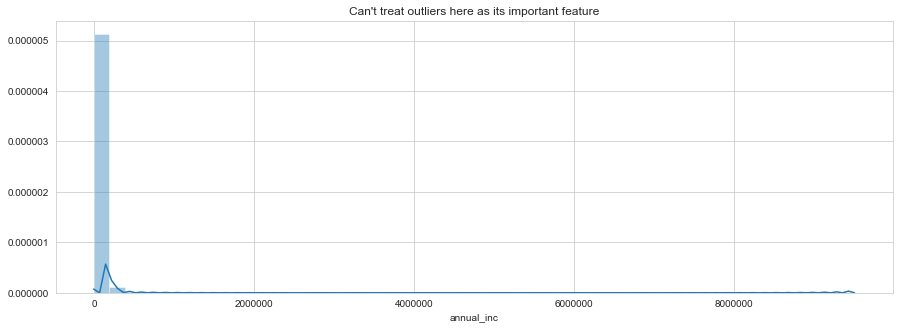

In [50]:
plt.subplots(figsize=(15, 5))
plt.plot
g = sns.distplot(data_num['annual_inc']).set_title("Can't treat outliers here as its important feature")

In [51]:
print(data_num.shape, data.shape)

(855969, 23) (855969, 53)


We Observe here that a lot of outliers are there but we cannot apply mean or discard datapoints as its an important indicator so we will kepp all the data points


In [52]:
data_num['annual_inc_band'] = pd.cut(data_num['annual_inc'], 4)
data_num['annual_inc_band'].value_counts()

(-9500.0, 2375000.0]      855931
(2375000.0, 4750000.0]        14
(4750000.0, 7125000.0]        13
(7125000.0, 9500000.0]        11
Name: annual_inc_band, dtype: int64

In [53]:
#creating bands
data_num.loc[data_num['annual_inc'] <= 39366.925, 'annual_inc'] = 0
data_num.loc[(data_num['annual_inc'] > 39366.925) & (data_num['annual_inc'] <= 78733.85), 'annual_inc'] = 1
data_num.loc[(data_num['annual_inc'] > 78733.85) & (data_num['annual_inc'] <= 118100.775), 'annual_inc'] = 2
data_num.loc[data_num['annual_inc'] > 118100.775, 'annual_inc'] = 3
data_num['annual_inc'].value_counts()

1.0    428114
2.0    192483
0.0    132438
3.0    102934
Name: annual_inc, dtype: int64

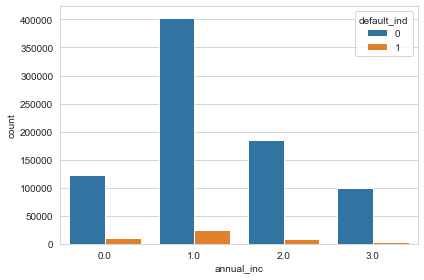

In [54]:
sns.countplot(x='annual_inc',hue='default_ind',data=data_num)
plt.tight_layout()

In [55]:
#loan_amnt
data_num['loan_amnt'].describe()

count    855969.000000
mean      14745.571335
std        8425.340005
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

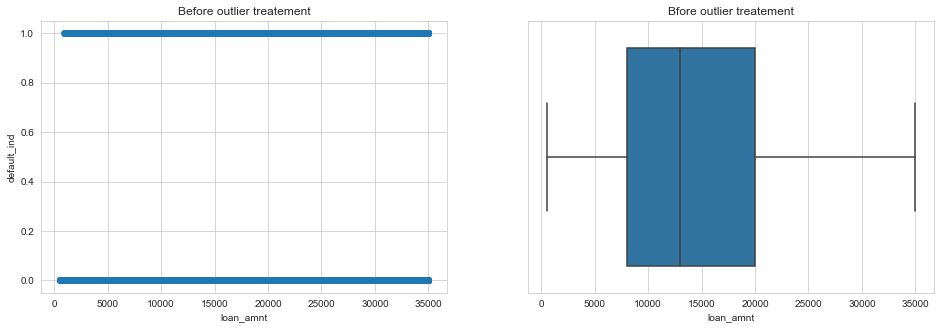

In [56]:
#Checking Outlier loan_amnt
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['loan_amnt'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['loan_amnt']).set_title("Bfore outlier treatement")
plt.show()

In [57]:
Q1=data_num['loan_amnt'].quantile(0.25)
Q3=data_num['loan_amnt'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

8000.0
20000.0
12000.0
-10000.0 38000.0


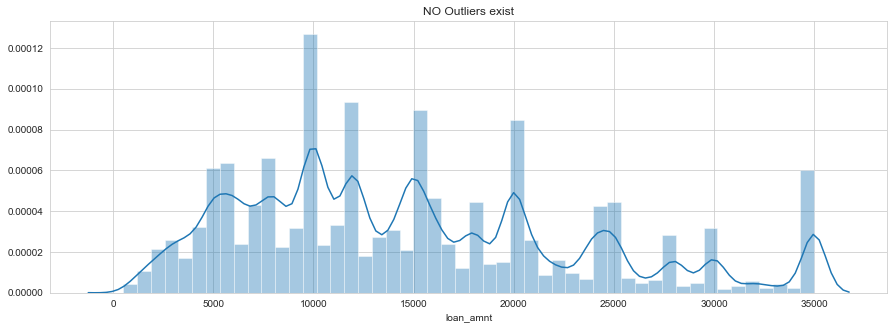

In [58]:
plt.subplots(figsize=(15, 5))
plt.plot
g = sns.distplot(data_num['loan_amnt']).set_title("NO Outliers exist")

In [59]:
data_num['loan_amnt_band'] = pd.cut(data_num['loan_amnt'], 4)
data_num['loan_amnt_band'].value_counts()

(9125.0, 17750.0]     326382
(465.5, 9125.0]       246730
(17750.0, 26375.0]    189822
(26375.0, 35000.0]     93035
Name: loan_amnt_band, dtype: int64

In [60]:
data_num.loc[data_num['loan_amnt'] <= 9125.0, 'loan_amnt'] = 0
data_num.loc[(data_num['loan_amnt'] > 9125.0) & (data_num['loan_amnt'] <= 17750.0), 'loan_amnt'] = 1
data_num.loc[(data_num['loan_amnt'] > 17750.0) & (data_num['loan_amnt'] <= 26375.0), 'loan_amnt'] = 2
data_num.loc[data_num['loan_amnt'] > 26375.0, 'loan_amnt'] = 3
data_num['loan_amnt'].value_counts()

1.0    326382
0.0    246730
2.0    189822
3.0     93035
Name: loan_amnt, dtype: int64

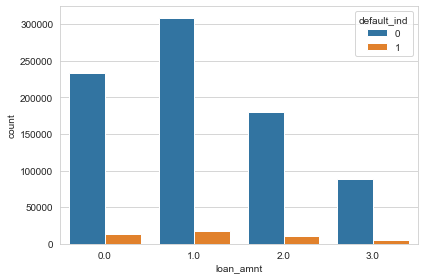

In [61]:
sns.countplot(x='loan_amnt',hue='default_ind',data=data_num)
plt.tight_layout()

In [62]:
#int_rate
data_num['int_rate'].describe()

count    855969.000000
mean         13.192320
std           4.368365
min           5.320000
25%           9.990000
50%          12.990000
75%          15.990000
max          28.990000
Name: int_rate, dtype: float64

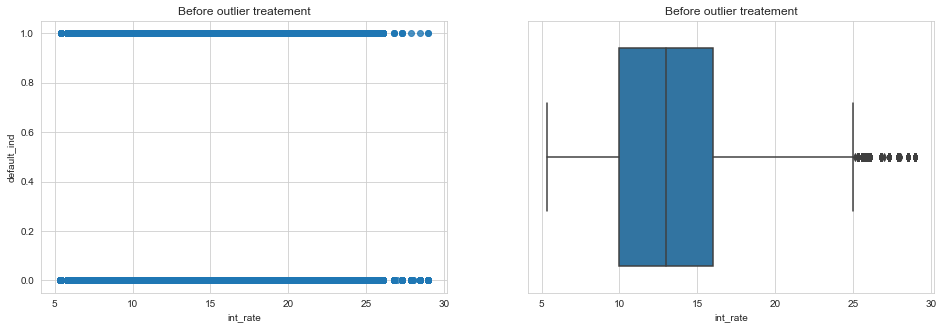

In [63]:
#Checking Outlier int_rate
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['int_rate'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['int_rate']).set_title("Before outlier treatement")
plt.show()

In [64]:
Q1=data_num['int_rate'].quantile(0.25)
Q3=data_num['int_rate'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

9.99
15.99
6.0
0.9900000000000002 24.990000000000002


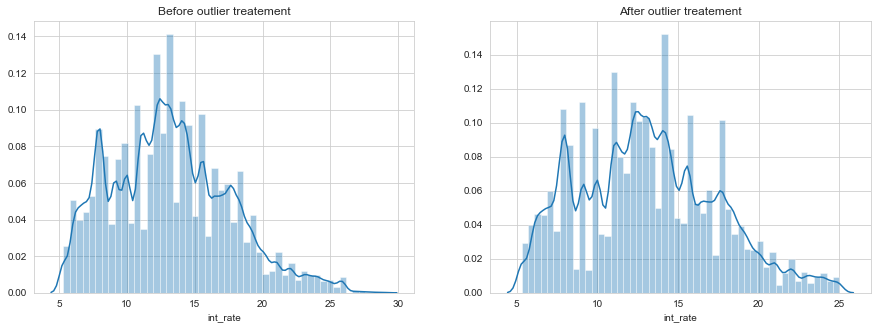

In [65]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['int_rate']).set_title("Before outlier treatement")
data_num = data_num[data_num['int_rate']< Upper_Whisker]
data = data[data['int_rate']< Upper_Whisker]
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['int_rate']).set_title("After outlier treatement")

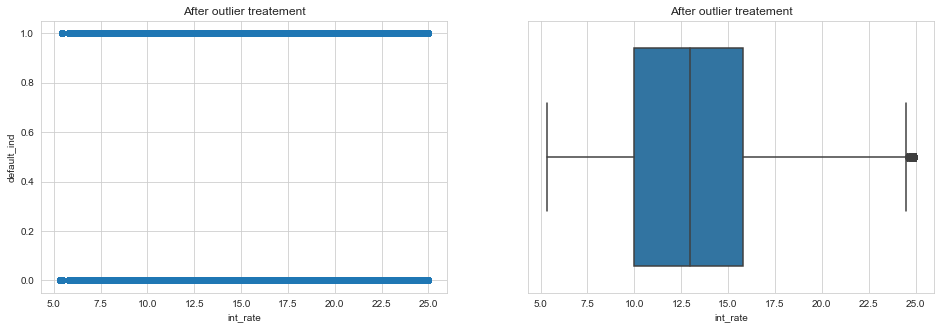

In [66]:
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['int_rate'], y=data_num['default_ind'], fit_reg=False).set_title("After outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['int_rate']).set_title("After outlier treatement")
plt.show()

In [67]:
data_num['int_rate_band'] = pd.cut(data_num['int_rate'], 4)
data_num['int_rate_band'].value_counts()

(10.238, 15.155]    351088
(5.3, 10.238]       240928
(15.155, 20.072]    208893
(20.072, 24.99]      49142
Name: int_rate_band, dtype: int64

In [68]:
data_num.loc[data_num['int_rate'] <= 10.238, 'int_rate'] = 0
data_num.loc[(data_num['int_rate'] > 10.238) & (data_num['int_rate'] <= 15.155), 'int_rate'] = 1
data_num.loc[(data_num['int_rate'] > 15.155) & (data_num['int_rate'] <= 20.072), 'int_rate'] = 2
data_num.loc[data_num['int_rate'] > 20.072, 'int_rate'] = 3
data_num['int_rate'].value_counts()

1.0    351088
0.0    240928
2.0    208893
3.0     49142
Name: int_rate, dtype: int64

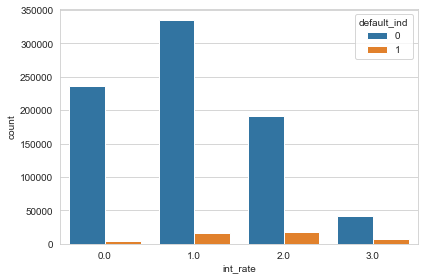

In [69]:
sns.countplot(x='int_rate',hue='default_ind',data=data_num)
plt.tight_layout()

In [70]:
#dti
data_num['dti'].describe()

count    850051.000000
mean         18.111031
std          17.469635
min           0.000000
25%          11.870000
50%          17.600000
75%          23.880000
max        9999.000000
Name: dti, dtype: float64

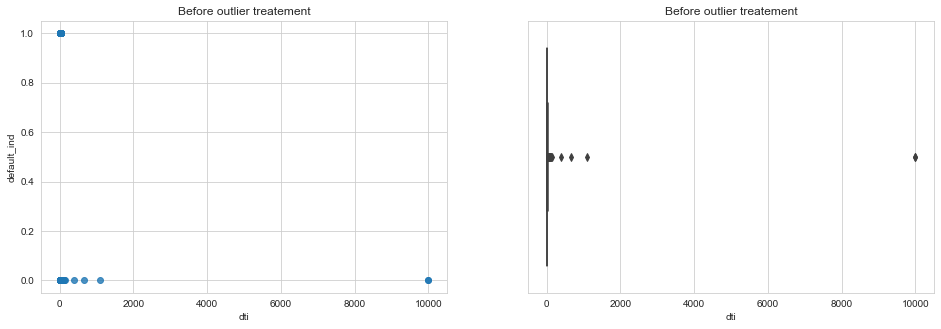

In [71]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['dti'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['dti']).set_title("Before outlier treatement")
plt.show()

In [72]:
# Outliers Treatment
#Find mean of the column "dti"
dti_mean = int(data_num['dti'].mean())
IQR_dti_P75 = data_num['dti'].quantile(q=0.75)
IQR_dti_P25 = data_num['dti'].quantile(q=0.25)
IQR_dti = IQR_dti_P75-IQR_dti_P25
IQR_LL = int(IQR_dti_P25 - 1.5*IQR_dti)
IQR_UL = int(IQR_dti_P75 + 1.5*IQR_dti)

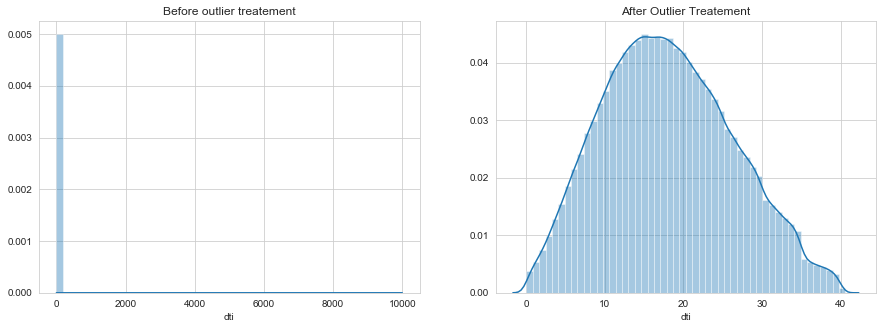

In [73]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['dti']).set_title("Before outlier treatement")
data_num.loc[data_num['dti']>IQR_UL , 'dti'] = dti_mean
data.loc[data['dti']>IQR_UL , 'dti'] = dti_mean
data_num.loc[data_num['dti']<IQR_LL , 'dti'] = dti_mean
data.loc[data['dti']<IQR_LL , 'dti'] = dti_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['dti']).set_title('After Outlier Treatement')

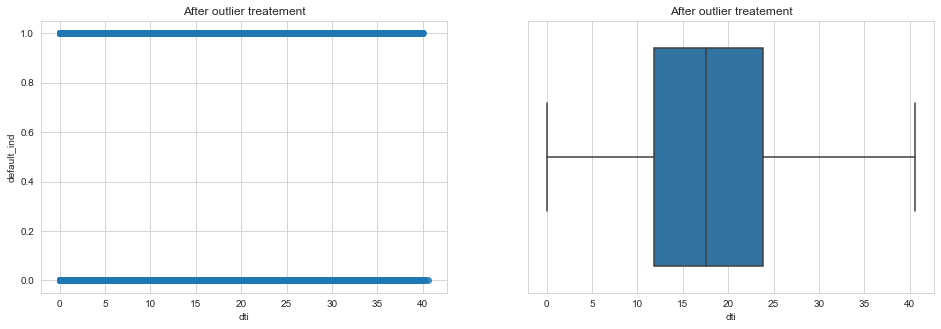

In [74]:
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['dti'], y=data_num['default_ind'], fit_reg=False).set_title("After outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['dti']).set_title("After outlier treatement")
plt.show()

In [75]:
data_num.shape

(850051, 26)

In [76]:
data_num['dti_band'] = pd.cut(data_num['dti'], 4)
data_num['dti_band'].value_counts()

(10.152, 20.305]     367190
(20.305, 30.458]     255950
(-0.0406, 10.152]    156667
(30.458, 40.61]       70244
Name: dti_band, dtype: int64

In [77]:
data_num.loc[data_num['dti'] <= 10.51, 'dti'] = 0
data_num.loc[(data_num['dti'] > 10.51) & (data_num['dti'] <= 21.02), 'dti'] = 1
data_num.loc[(data_num['dti'] > 21.02) & (data_num['dti'] <= 31.53), 'dti'] = 2
data_num.loc[data_num['dti'] > 31.53, 'dti'] = 3
data_num['dti'].value_counts()

1.0    380872
2.0    245480
0.0    167730
3.0     55969
Name: dti, dtype: int64

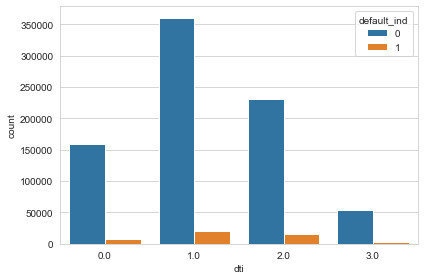

In [78]:
sns.countplot(x='dti',hue='default_ind',data=data_num)
plt.tight_layout()

In [79]:
#delinq_2yrs
data_num['delinq_2yrs'].describe()

count    850051.000000
mean          0.311085
std           0.856071
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: delinq_2yrs, dtype: float64

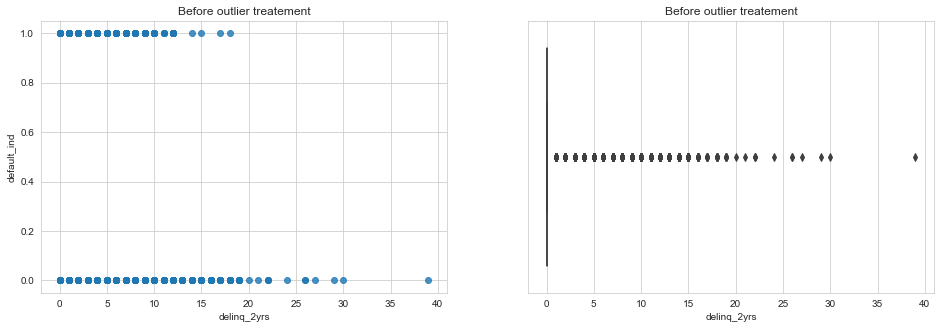

In [80]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['delinq_2yrs'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['delinq_2yrs']).set_title("Before outlier treatement")
plt.show()

In [81]:
print(data.shape, data_num.shape)

(850051, 53) (850051, 27)


#### Outliers Treatment not required here as its imp para wrt corruption

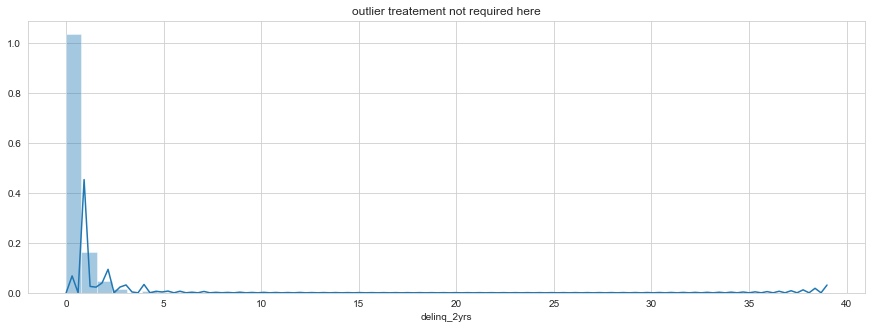

In [82]:
plt.subplots(figsize=(15, 5))
plt.plot
g = sns.distplot(data_num['delinq_2yrs']).set_title("outlier treatement not required here")

Conclusion : Outlier treatement should not be required here as all data point are required here

In [83]:
data_num['delinq_2yrs_bandvx'] = pd.cut(data_num['delinq_2yrs'], 4)
data_num['delinq_2yrs_bandvx'].value_counts()

(-0.039, 9.75]    849493
(9.75, 19.5]         546
(19.5, 29.25]         10
(29.25, 39.0]          2
Name: delinq_2yrs_bandvx, dtype: int64

In [84]:
data_num.loc[data_num['delinq_2yrs'] <= 0, 'delinq_2yrs'] = 0
data_num.loc[data_num['delinq_2yrs'] > 0, 'delinq_2yrs'] = 1
data_num['delinq_2yrs'].value_counts()

0.0    688137
1.0    161914
Name: delinq_2yrs, dtype: int64

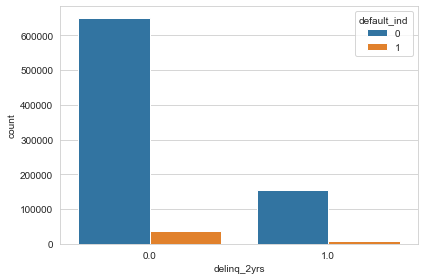

In [85]:
sns.countplot(x='delinq_2yrs',hue='default_ind',data=data_num)
plt.tight_layout()  

In [86]:
#inq_last_6mths
data_num['inq_last_6mths'].describe()

count    850051.000000
mean          0.676164
std           0.959599
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: inq_last_6mths, dtype: float64

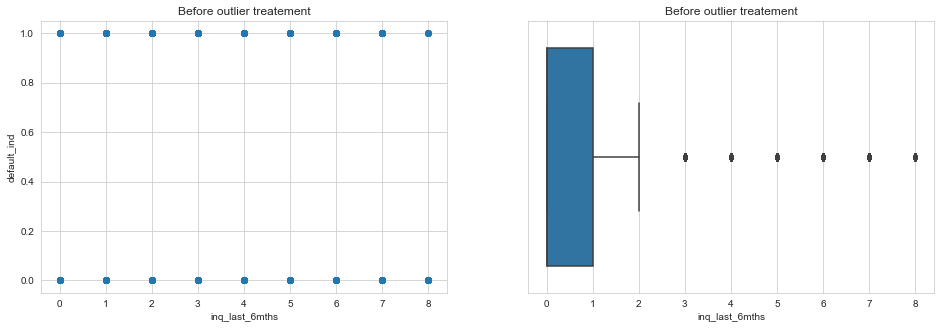

In [87]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['inq_last_6mths'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['inq_last_6mths']).set_title("Before outlier treatement")
plt.show()

In [88]:
# Outliers Treatment
#Find mean of the column "inq_last_6mths"
inq_last_6mths_mean = int(data_num['inq_last_6mths'].mean())

#FInd 75th Percentile of the column "inq_last_6mths"
IQR_inq_last_6mths_P75 = data_num['inq_last_6mths'].quantile(q=0.75)

#FInd 25th Percentile of the column "inq_last_6mths"
IQR_inq_last_6mths_P25 = data_num['inq_last_6mths'].quantile(q=0.25)

#FInd IQR of the column "inq_last_6mths"
IQR_inq_last_6mths = IQR_inq_last_6mths_P75-IQR_inq_last_6mths_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_inq_last_6mths_P25 - 1.5*IQR_inq_last_6mths)
IQR_UL = int(IQR_inq_last_6mths_P75 + 1.5*IQR_inq_last_6mths)


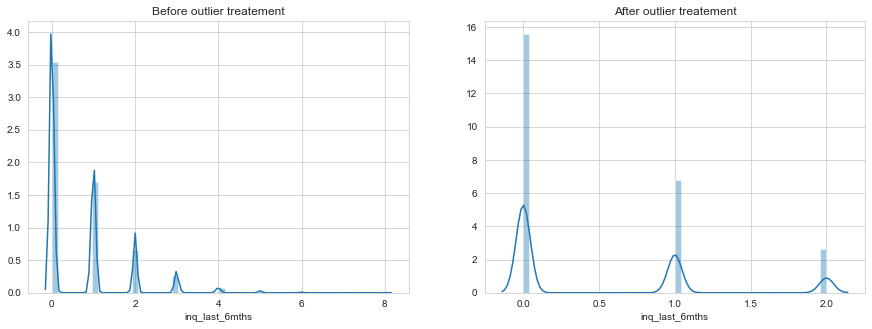

In [89]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['inq_last_6mths']).set_title("Before outlier treatement")

#treating upper end outier with mean
data_num.loc[data_num['inq_last_6mths']>IQR_UL , 'inq_last_6mths'] = inq_last_6mths_mean
data.loc[data['inq_last_6mths']>IQR_UL , 'inq_last_6mths'] = inq_last_6mths_mean

#treating lower end outlier as mean
data_num.loc[data_num['inq_last_6mths']<IQR_LL , 'inq_last_6mths'] = inq_last_6mths_mean
data.loc[data['inq_last_6mths']<IQR_LL , 'inq_last_6mths'] = inq_last_6mths_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['inq_last_6mths']).set_title("After outlier treatement")

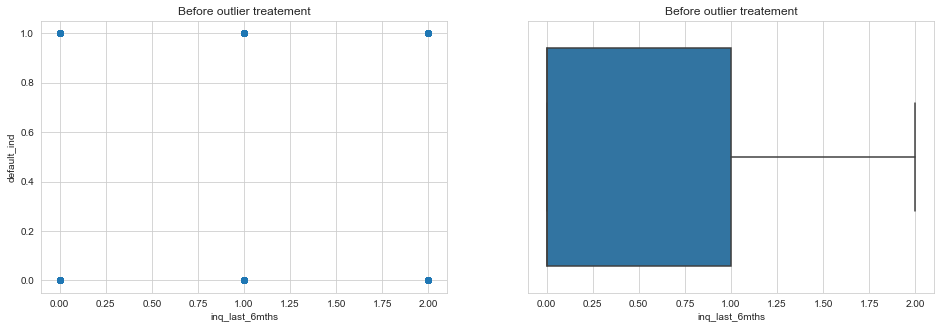

In [90]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['inq_last_6mths'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['inq_last_6mths']).set_title("Before outlier treatement")
plt.show()

In [91]:
#inq_last_6mths
data_num['inq_last_6mths_band'] = pd.cut(data_num['inq_last_6mths'], 4)
data_num['inq_last_6mths_band'].value_counts()

(-0.002, 0.5]    529613
(0.5, 1.0]       231122
(1.5, 2.0]        89316
(1.0, 1.5]            0
Name: inq_last_6mths_band, dtype: int64

In [92]:
data_num.loc[data_num['inq_last_6mths'] <= 0.5, 'inq_last_6mths'] = 0
data_num.loc[(data_num['inq_last_6mths'] > 0.5) & (data_num['inq_last_6mths'] <= 1.0), 'inq_last_6mths'] = 1
data_num.loc[data_num['inq_last_6mths'] > 1.0, 'inq_last_6mths'] = 2
data_num['inq_last_6mths'].value_counts()

0.0    529613
1.0    231122
2.0     89316
Name: inq_last_6mths, dtype: int64

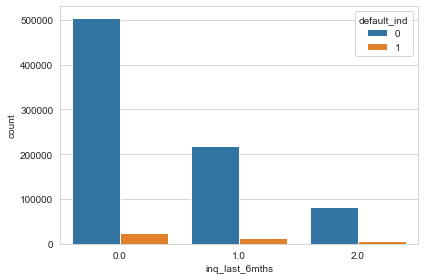

In [93]:
sns.countplot(x='inq_last_6mths',hue='default_ind',data=data_num)
plt.tight_layout()

In [94]:
#mths_since_last_delinq
data_num['mths_since_last_delinq'].describe()


count    850051.000000
mean         32.536540
std          15.324222
min           0.000000
25%          31.000000
50%          31.000000
75%          31.000000
max         188.000000
Name: mths_since_last_delinq, dtype: float64

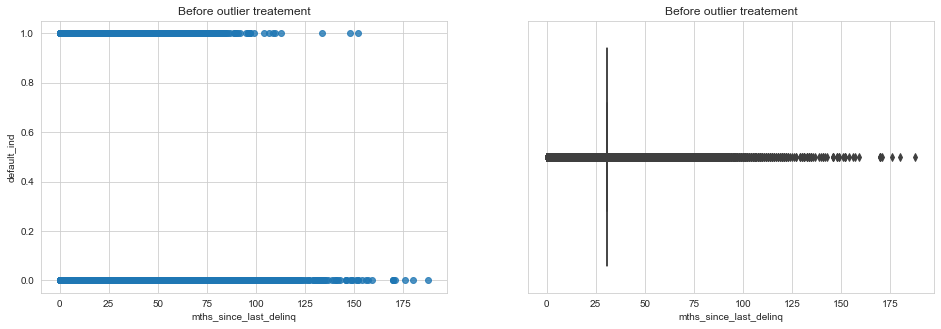

In [95]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['mths_since_last_delinq'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['mths_since_last_delinq']).set_title("Before outlier treatement")
plt.show()

In [96]:
# Outliers Treatment
#Find mean of the column "mths_since_last_delinq"
mths_since_last_delinq_mean = int(data_num['mths_since_last_delinq'].mean())

#FInd 75th Percentile of the column "mths_since_last_delinq"
IQR_mths_since_last_delinq_P75 = data_num['mths_since_last_delinq'].quantile(q=0.75)

#FInd 25th Percentile of the column "mths_since_last_delinq"
IQR_mths_since_last_delinq_P25 = data_num['mths_since_last_delinq'].quantile(q=0.25)

#FInd IQR of the column "mths_since_last_delinq"
IQR_mths_since_last_delinq = IQR_mths_since_last_delinq_P75-IQR_mths_since_last_delinq_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_mths_since_last_delinq_P25 - 1.5*IQR_mths_since_last_delinq)
IQR_UL = int(IQR_mths_since_last_delinq_P75 + 1.5*IQR_mths_since_last_delinq)


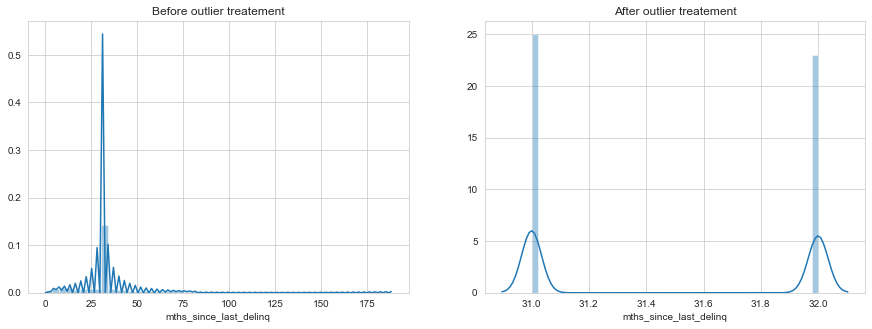

In [97]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['mths_since_last_delinq']).set_title("Before outlier treatement")

#treating upper end outier with mean
data_num.loc[data_num['mths_since_last_delinq']>IQR_UL , 'mths_since_last_delinq'] = mths_since_last_delinq_mean
data.loc[data['mths_since_last_delinq']>IQR_UL , 'mths_since_last_delinq'] = mths_since_last_delinq_mean

#treating lower end outlier as mean
data_num.loc[data_num['mths_since_last_delinq']<IQR_LL , 'mths_since_last_delinq'] = mths_since_last_delinq_mean
data.loc[data['mths_since_last_delinq']<IQR_LL , 'mths_since_last_delinq'] = mths_since_last_delinq_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['mths_since_last_delinq']).set_title("After outlier treatement")

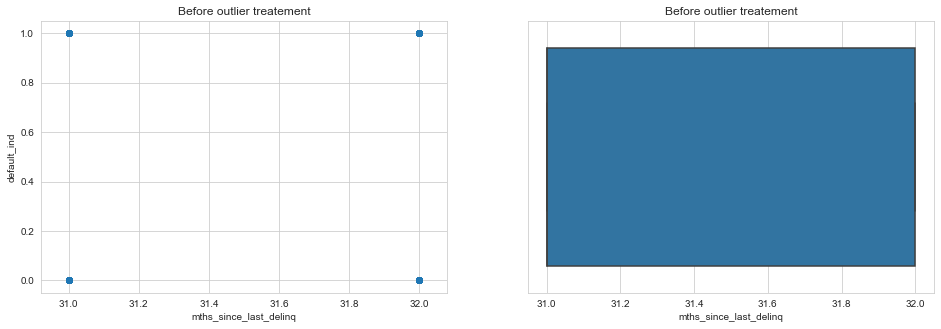

In [98]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['mths_since_last_delinq'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['mths_since_last_delinq']).set_title("Before outlier treatement")
plt.show()

In [99]:
#mths_since_last_delinq
data_num['mths_since_last_delinq_band'] = pd.cut(data_num['mths_since_last_delinq'], 4)
data_num['mths_since_last_delinq_band'].value_counts()

(30.999, 31.25]    443211
(31.75, 32.0]      406840
(31.5, 31.75]           0
(31.25, 31.5]           0
Name: mths_since_last_delinq_band, dtype: int64

In [100]:
data_num.loc[data_num['mths_since_last_delinq'] <= 31.25, 'mths_since_last_delinq'] = 0
data_num.loc[data_num['mths_since_last_delinq'] > 31.25, 'mths_since_last_delinq'] = 1
data_num['mths_since_last_delinq'].value_counts()

0.0    443211
1.0    406840
Name: mths_since_last_delinq, dtype: int64

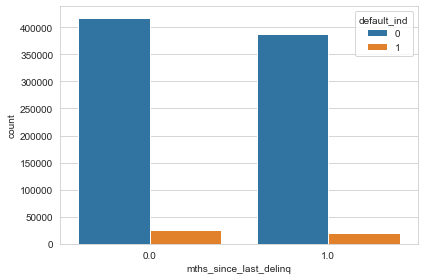

In [101]:
sns.countplot(x='mths_since_last_delinq',hue='default_ind',data=data_num)
plt.tight_layout()

In [102]:
#open_acc
data_num['open_acc'].describe()

count    850051.000000
mean         11.538581
std           5.305199
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

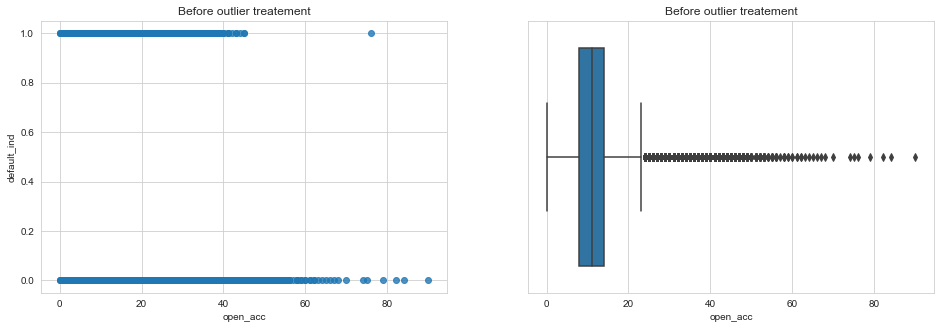

In [103]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['open_acc'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['open_acc']).set_title("Before outlier treatement")
plt.show()

In [104]:
# Outliers Treatment
#Find mean of the column "open_acc"
open_acc_mean = int(data_num['open_acc'].mean())

#FInd 75th Percentile of the column "open_acc"
IQR_open_acc_P75 = data_num['open_acc'].quantile(q=0.75)

#FInd 25th Percentile of the column "open_acc"
IQR_open_acc_P25 = data_num['open_acc'].quantile(q=0.25)

#FInd IQR of the column "open_acc"
IQR_open_acc = IQR_open_acc_P75-IQR_open_acc_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_open_acc_P25 - 1.5*IQR_open_acc)
IQR_UL = int(IQR_open_acc_P75 + 1.5*IQR_open_acc)


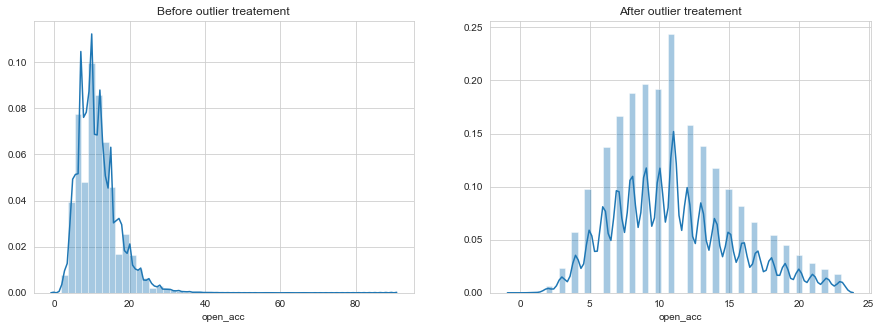

In [105]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['open_acc']).set_title("Before outlier treatement")

#treating upper end outier with mean
data_num.loc[data_num['open_acc']>IQR_UL , 'open_acc'] = open_acc_mean
data.loc[data['open_acc']>IQR_UL , 'open_acc'] = open_acc_mean

#treating lower end outlier as mean
data_num.loc[data_num['open_acc']<IQR_LL , 'open_acc'] = open_acc_mean
data.loc[data['open_acc']<IQR_LL , 'open_acc'] = open_acc_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['open_acc']).set_title("After outlier treatement")

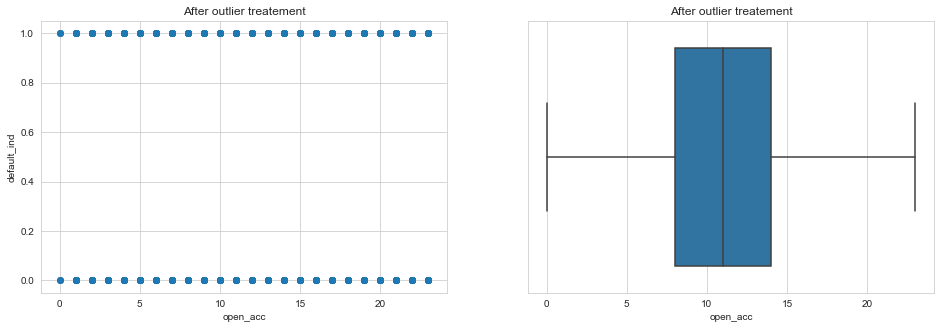

In [106]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['open_acc'], y=data_num['default_ind'], fit_reg=False).set_title("After outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['open_acc']).set_title("After outlier treatement")
plt.show()

In [107]:
#open_acc
data_num['open_acc_ba'] = pd.cut(data_num['open_acc'], 4)
data_num['open_acc_ba'].value_counts()

(5.75, 11.5]      439866
(11.5, 17.25]     258070
(17.25, 23.0]      79580
(-0.023, 5.75]     72535
Name: open_acc_ba, dtype: int64

In [108]:
data_num.loc[data_num['open_acc'] <= 5.75, 'open_acc'] = 0
data_num.loc[(data_num['open_acc'] > 5.75) & (data_num['open_acc'] <= 11.5), 'open_acc'] = 1
data_num.loc[(data_num['open_acc'] > 11.5) & (data_num['open_acc'] <= 17.25), 'open_acc'] = 2
data_num.loc[data_num['open_acc'] > 17.25, 'open_acc'] = 3
data_num['open_acc'].value_counts()

1.0    439866
2.0    258070
3.0     79580
0.0     72535
Name: open_acc, dtype: int64

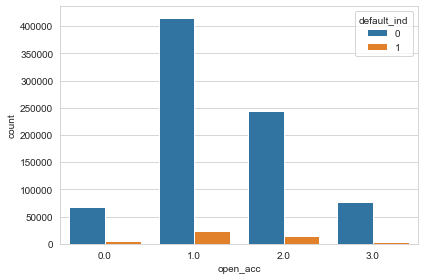

In [109]:
sns.countplot(x='open_acc',hue='default_ind',data=data_num)
plt.tight_layout()

In [110]:
#pub_rec
data_num['pub_rec'].describe()

count    850051.000000
mean          0.194146
std           0.581145
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

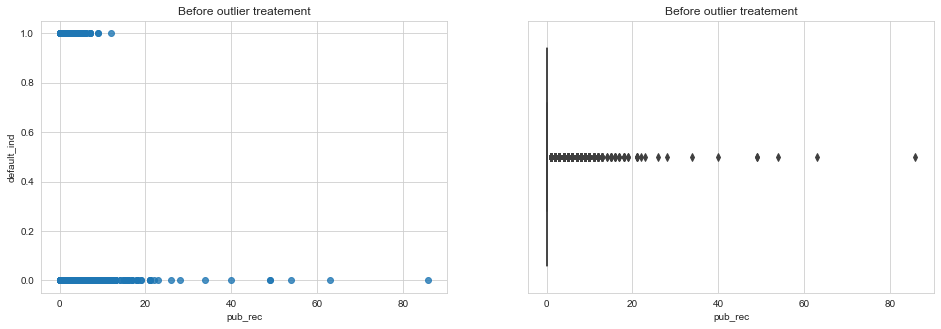

In [111]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['pub_rec'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['pub_rec']).set_title("Before outlier treatement")
plt.show()

###### Outliers Treatment - have to binarize so cant treat outlier

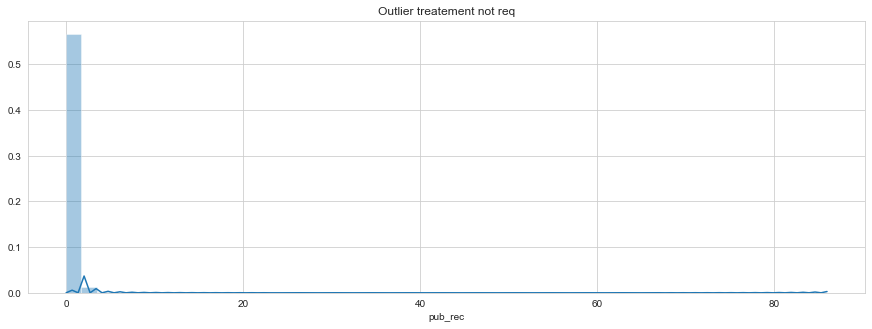

In [112]:
plt.subplots(figsize=(15, 5))
plt.plot
g = sns.distplot(data_num['pub_rec']).set_title("Outlier treatement not req")


In [113]:
data_num['pub_rec_ban'] = pd.cut(data_num['pub_rec'], 4)
data_num['pub_rec_ban'].value_counts()

(-0.086, 21.5]    850040
(21.5, 43.0]           6
(43.0, 64.5]           4
(64.5, 86.0]           1
Name: pub_rec_ban, dtype: int64

In [114]:
data_num.loc[data_num['pub_rec'] <= 0, 'pub_rec'] = 0
data_num.loc[data_num['pub_rec'] > 0, 'pub_rec'] = 1
data_num['open_acc'].value_counts()

1.0    439866
2.0    258070
3.0     79580
0.0     72535
Name: open_acc, dtype: int64

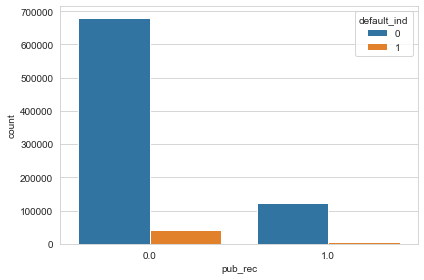

In [115]:
sns.countplot(x='pub_rec',hue='default_ind',data=data_num)
plt.tight_layout() #irrelevant can be removed if we want

In [116]:
#revol_bal
data_num['revol_bal'].describe()

count    8.500510e+05
mean     1.691698e+04
std      2.223767e+04
min      0.000000e+00
25%      6.473000e+03
50%      1.190800e+04
75%      2.086100e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

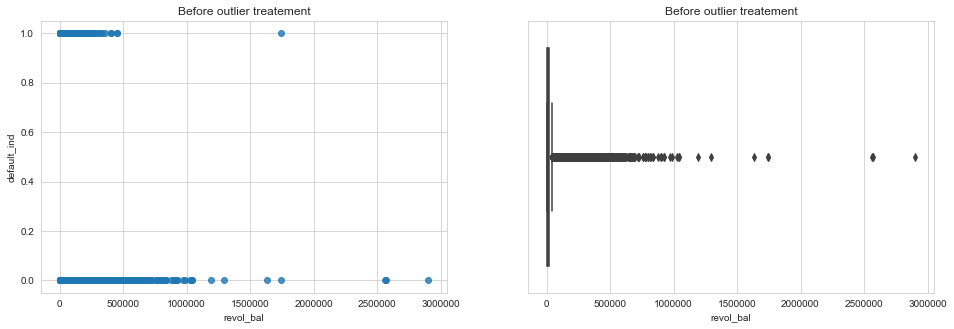

In [117]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['revol_bal'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['revol_bal']).set_title("Before outlier treatement")
plt.show()

In [118]:
# Outliers Treatment
#Find mean of the column "revol_bal"
open_revol_bal = int(data_num['revol_bal'].mean())

#FInd 75th Percentile of the column "revol_bal"
IQR_revol_bal_P75 = data_num['revol_bal'].quantile(q=0.75)

#FInd 25th Percentile of the column "revol_bal"
IQR_revol_bal_P25 = data_num['revol_bal'].quantile(q=0.25)

#FInd IQR of the column "revol_bal"
IQR_revol_bal = IQR_revol_bal_P75-IQR_revol_bal_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_revol_bal_P25 - 1.5*IQR_revol_bal)
IQR_UL = int(IQR_revol_bal_P75 + 1.5*IQR_revol_bal)

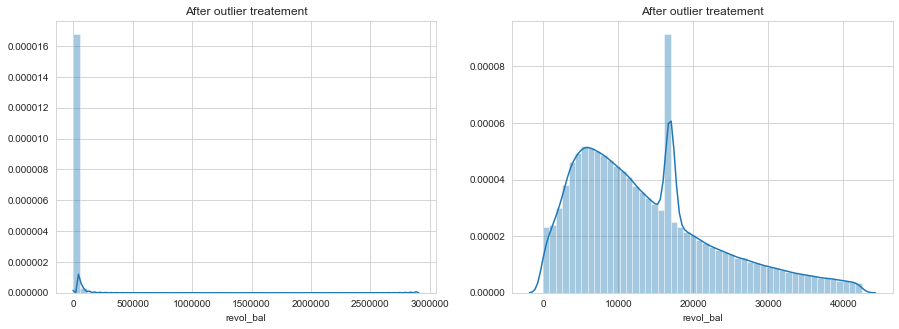

In [119]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['revol_bal']).set_title("After outlier treatement")

#treating upper end outier with mean
data_num.loc[data_num['revol_bal']>IQR_UL , 'revol_bal'] = open_revol_bal
data.loc[data['revol_bal']>IQR_UL , 'revol_bal'] = open_revol_bal

#treating lower end outlier as mean
data_num.loc[data_num['revol_bal']<IQR_LL , 'revol_bal'] = open_revol_bal
data.loc[data['revol_bal']<IQR_LL , 'revol_bal'] = open_revol_bal
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['revol_bal']).set_title("After outlier treatement")

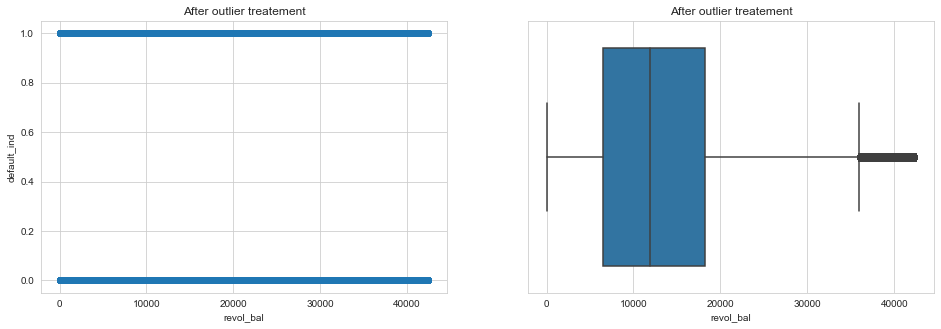

In [120]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['revol_bal'], y=data_num['default_ind'], fit_reg=False).set_title("After outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['revol_bal']).set_title("After outlier treatement")
plt.show()

In [121]:
data_num['revol_bal_baad'] = pd.cut(data_num['revol_bal'], 4)
data_num['revol_bal_baad'].value_counts()

(-42.443, 10610.75]    379316
(10610.75, 21221.5]    310272
(21221.5, 31832.25]    111384
(31832.25, 42443.0]     49079
Name: revol_bal_baad, dtype: int64

In [122]:
data_num.loc[data_num['revol_bal'] <= 10118.25, 'revol_bal'] = 0
data_num.loc[(data_num['revol_bal'] > 10118.25) & (data_num['revol_bal'] <= 20236.5), 'revol_bal'] = 1
data_num.loc[(data_num['revol_bal'] > 20236.5) & (data_num['revol_bal'] <= 30354.75), 'revol_bal'] = 2
data_num.loc[data_num['revol_bal'] > 17.25, 'revol_bal'] = 3
data_num['revol_bal'].value_counts()

0.0    361245
1.0    312528
2.0    116397
3.0     59881
Name: revol_bal, dtype: int64

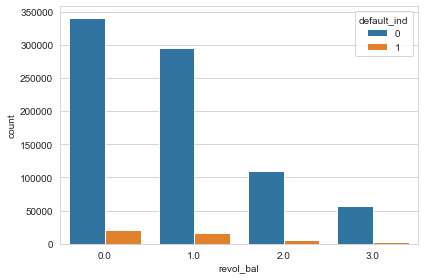

In [123]:
sns.countplot(x='revol_bal',hue='default_ind',data=data_num)
plt.tight_layout()

In [124]:
#revol_util
data_num['revol_util'].describe()

count    850051.000000
mean         54.979643
std          23.796476
min           0.000000
25%          37.600000
50%          55.900000
75%          73.400000
max         892.300000
Name: revol_util, dtype: float64

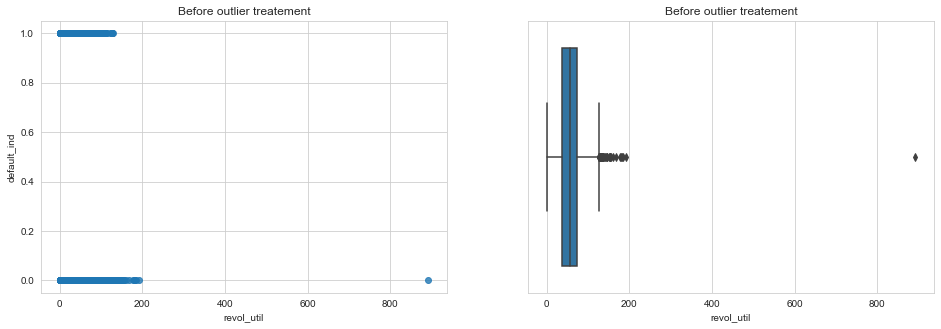

In [125]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['revol_util'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['revol_util']).set_title("Before outlier treatement")
plt.show()

In [126]:
# Outliers Treatment
#Find mean of the column "revol_util"
revol_util_mean = int(data_num['revol_util'].mean())

#FInd 75th Percentile of the column "revol_util"
IQR_revol_util_P75 = data_num['revol_util'].quantile(q=0.75)

#FInd 25th Percentile of the column "revol_util"
IQR_revol_util_P25 = data_num['revol_util'].quantile(q=0.25)

#FInd IQR of the column "open_acc"
IQR_revol_util = IQR_revol_util_P75-IQR_revol_util_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_revol_util_P25 - 1.5*IQR_revol_util)
IQR_UL = int(IQR_revol_util_P75 + 1.5*IQR_revol_util)

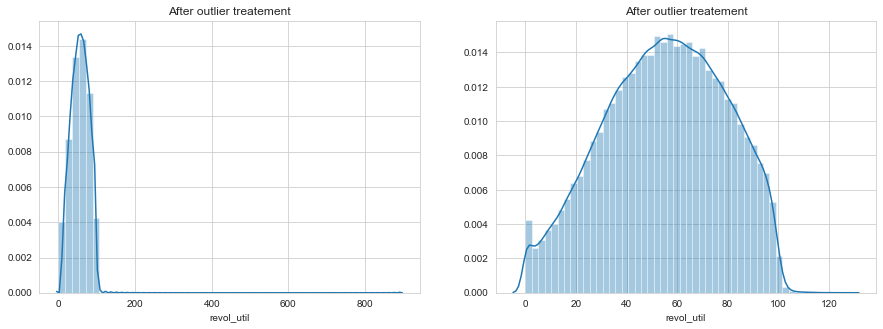

In [127]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['revol_util']).set_title("After outlier treatement")

#treating upper end outier with mean
data_num.loc[data_num['revol_util']>IQR_UL , 'revol_util'] = revol_util_mean
data.loc[data['revol_util']>IQR_UL , 'revol_util'] = revol_util_mean

#treating lower end outlier as mean
data_num.loc[data_num['revol_util']<IQR_LL , 'revol_util'] = revol_util_mean
data.loc[data['revol_util']<IQR_LL , 'revol_util'] = revol_util_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['revol_util']).set_title("After outlier treatement")

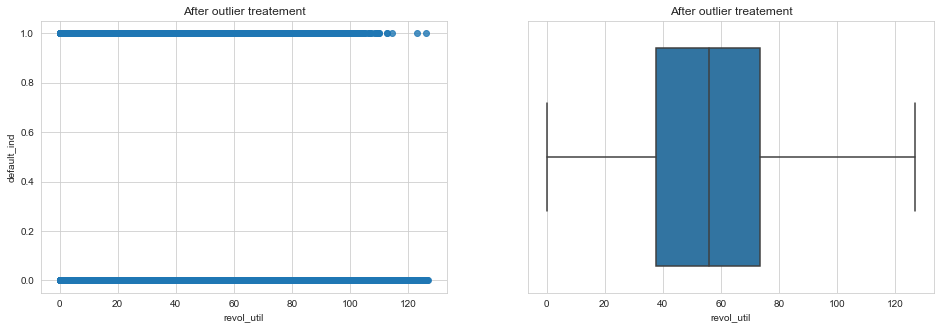

In [128]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['revol_util'], y=data_num['default_ind'], fit_reg=False).set_title("After outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['revol_util']).set_title("After outlier treatement")
plt.show()

In [129]:
data_num['revol_util_ban'] = pd.cut(data_num['revol_util'], 3)
data_num['revol_util_ban'].value_counts()

(42.333, 84.667]    485873
(-0.127, 42.333]    263049
(84.667, 127.0]     101129
Name: revol_util_ban, dtype: int64

In [130]:
data_num.loc[data_num['revol_util'] <= 42.0, 'revol_util'] = 0
data_num.loc[(data_num['revol_util'] > 42.0) & (data_num['revol_util'] <= 84.0), 'revol_util'] = 1
data_num.loc[data_num['revol_util'] > 84.0, 'revol_util'] = 2
data_num['revol_util'].value_counts()

1.0    483980
0.0    259889
2.0    106182
Name: revol_util, dtype: int64

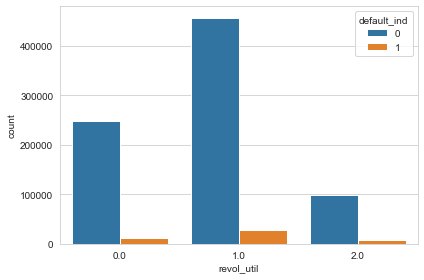

In [131]:
sns.countplot(x='revol_util',hue='default_ind',data=data_num)
plt.tight_layout()

In [132]:
#total_acc
data_num['total_acc'].describe()

count    850051.000000
mean         25.267998
std          11.812430
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         169.000000
Name: total_acc, dtype: float64

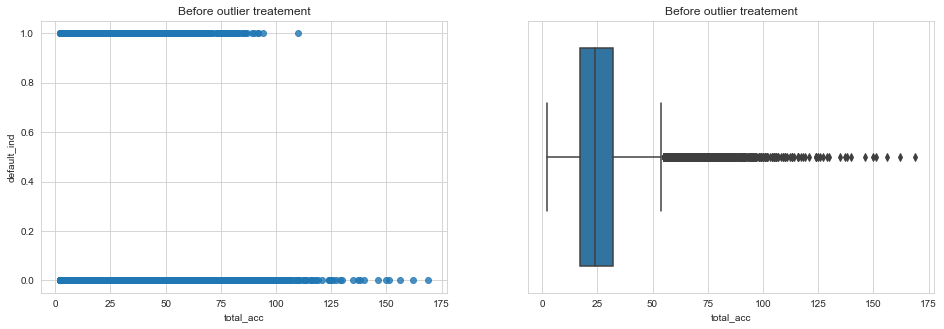

In [133]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['total_acc'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['total_acc']).set_title("Before outlier treatement")
plt.show()

In [134]:
# Outliers Treatment
#Find mean of the column "total_acc"
total_acc_mean = int(data_num['total_acc'].mean())

#FInd 75th Percentile of the column "total_acc"
IQR_total_acc_P75 = data_num['total_acc'].quantile(q=0.75)

#FInd 25th Percentile of the column "total_acc"
IQR_total_acc_P25 = data_num['total_acc'].quantile(q=0.25)

#FInd IQR of the column "total_acc"
IQR_total_acc = IQR_total_acc_P75-IQR_total_acc_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_total_acc_P25 - 1.5*IQR_total_acc)
IQR_UL = int(IQR_total_acc_P75 + 1.5*IQR_total_acc)

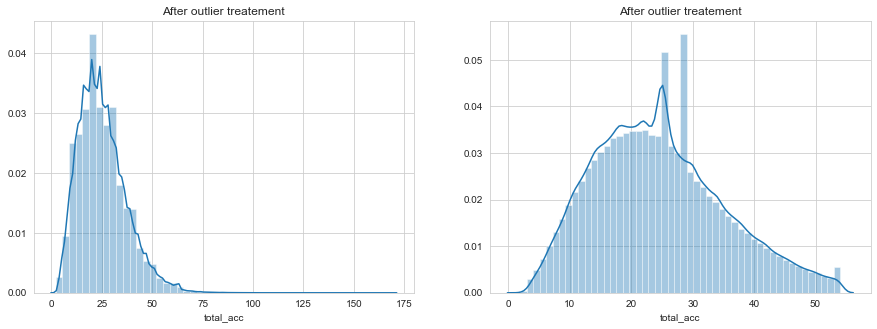

In [135]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['total_acc']).set_title("After outlier treatement")

#treating upper end outier with mean
data_num.loc[data_num['total_acc']>IQR_UL , 'total_acc'] = total_acc_mean
data.loc[data['total_acc']>IQR_UL , 'total_acc'] = total_acc_mean

#treating lower end outlier as mean
data_num.loc[data_num['total_acc']<IQR_LL , 'total_acc'] = total_acc_mean
data.loc[data['total_acc']<IQR_LL , 'total_acc'] = total_acc_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['total_acc']).set_title("After outlier treatement")

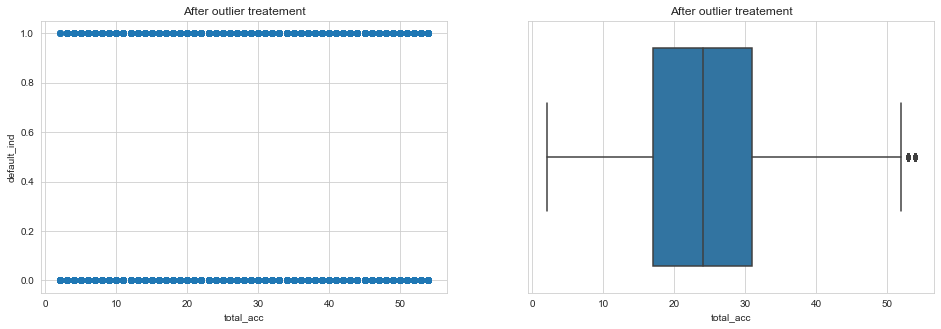

In [136]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['total_acc'], y=data_num['default_ind'], fit_reg=False).set_title("After outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['total_acc']).set_title("After outlier treatement")
plt.show()

In [137]:
data_num['total_acc_band'] = pd.cut(data_num['total_acc'], 3)
data_num['total_acc_band'].value_counts()

(19.333, 36.667]    431493
(1.948, 19.333]     298422
(36.667, 54.0]      120136
Name: total_acc_band, dtype: int64

In [138]:
data_num.loc[data_num['total_acc'] <= 20.0, 'total_acc'] = 0
data_num.loc[(data_num['total_acc'] > 20.0) & (data_num['total_acc'] <= 38.0), 'total_acc'] = 1
data_num.loc[data_num['total_acc'] > 38.0, 'total_acc'] = 2
data_num['total_acc'].value_counts()

1.0    426310
0.0    329179
2.0     94562
Name: total_acc, dtype: int64

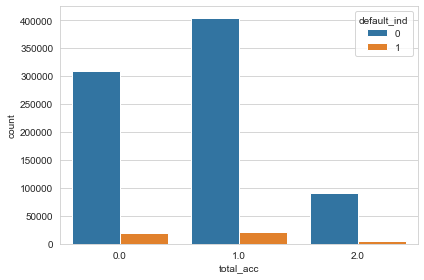

In [139]:
sns.countplot(x='total_acc',hue='default_ind',data=data_num)
plt.tight_layout()

In [140]:
#out_prncp
data_num['out_prncp'].describe()

count    850051.000000
mean       8258.794022
std        8439.747363
min           0.000000
25%           0.000000
50%        6257.450000
75%       13484.410000
max       49372.860000
Name: out_prncp, dtype: float64

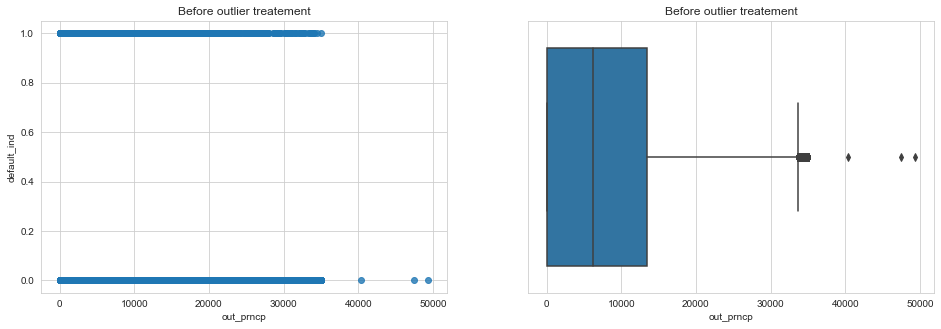

In [141]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['out_prncp'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['out_prncp']).set_title("Before outlier treatement")
plt.show()

In [142]:
# Outliers Treatment
#Find mean of the column "out_prncp"
out_prncp_mean = int(data_num['out_prncp'].mean())

#FInd 75th Percentile of the column "out_prncp"
IQR_out_prncp_P75 = data_num['out_prncp'].quantile(q=0.75)

#FInd 25th Percentile of the column "out_prncp"
IQR_out_prncp_P25 = data_num['out_prncp'].quantile(q=0.25)

#FInd IQR of the column "open_acc"
IQR_out_prncp = IQR_out_prncp_P75-IQR_out_prncp_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_out_prncp_P25 - 1.5*IQR_out_prncp)
IQR_UL = int(IQR_out_prncp_P75 + 1.5*IQR_out_prncp)

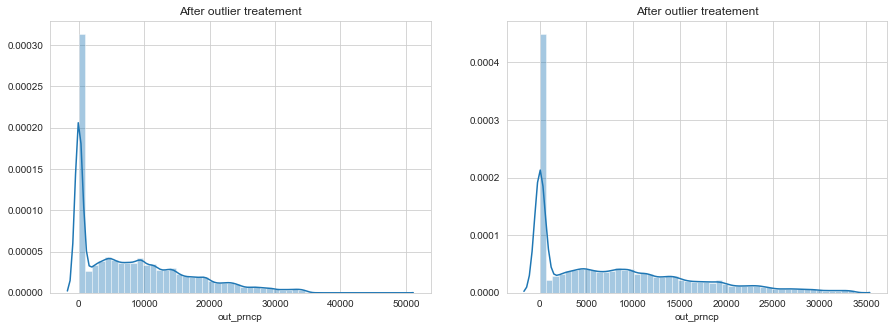

In [143]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['out_prncp']).set_title("After outlier treatement")

#treating upper end outier with mean
data_num.loc[data_num['out_prncp']>IQR_UL , 'out_prncp'] = out_prncp_mean
data.loc[data['out_prncp']>IQR_UL , 'out_prncp'] = out_prncp_mean

#treating lower end outlier as mean
data_num.loc[data_num['out_prncp']<IQR_LL , 'out_prncp'] = out_prncp_mean
data.loc[data['out_prncp']<IQR_LL , 'out_prncp'] = out_prncp_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['out_prncp']).set_title("After outlier treatement")

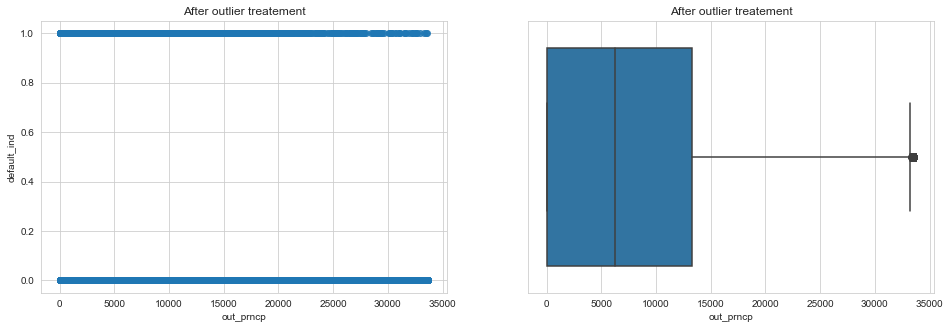

In [144]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['out_prncp'], y=data_num['default_ind'], fit_reg=False).set_title("After outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['out_prncp']).set_title("After outlier treatement")
plt.show()

In [145]:
data_num['out_prncp_ban'] = pd.cut(data_num['out_prncp'], 3)
data_num['out_prncp_ban'].value_counts()

(-33.708, 11236.03]     585456
(11236.03, 22472.06]    201870
(22472.06, 33708.09]     62725
Name: out_prncp_ban, dtype: int64

In [146]:
data_num.loc[data_num['out_prncp'] <= 10854.23, 'out_prncp'] = 0
data_num.loc[(data_num['out_prncp'] > 10854.23) & (data_num['out_prncp'] <= 21708.46), 'out_prncp'] = 1
data_num.loc[data_num['out_prncp'] > 21708.46, 'out_prncp'] = 2
data_num['out_prncp'].value_counts()

0.0    574418
1.0    205038
2.0     70595
Name: out_prncp, dtype: int64

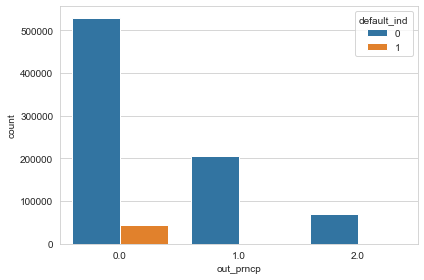

In [147]:
sns.countplot(x='out_prncp',hue='default_ind',data=data_num)
plt.tight_layout()

In [148]:
#total_pymnt
data_num['total_pymnt'].describe()

count    850051.000000
mean       7636.171211
std        7891.899183
min           0.000000
25%        1963.980000
50%        4961.080000
75%       10722.884214
max       57777.579870
Name: total_pymnt, dtype: float64

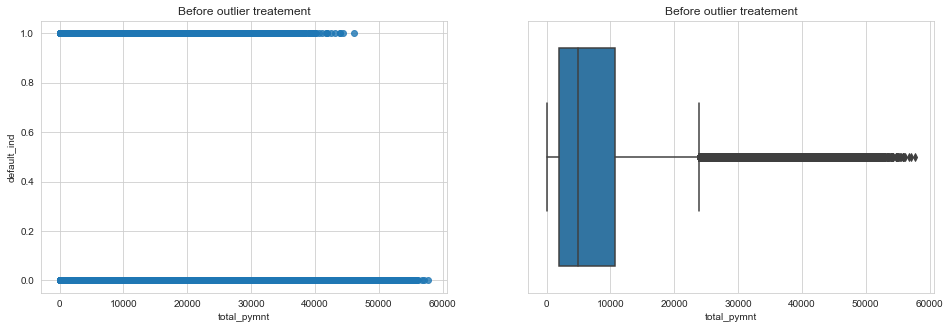

In [149]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['total_pymnt'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['total_pymnt']).set_title("Before outlier treatement")
plt.show()

In [150]:
# Outliers Treatment
#Find mean of the column "total_pymnt"
total_pymnt_mean = int(data_num['total_pymnt'].mean())

#FInd 75th Percentile of the column "total_pymnt"
IQR_total_pymnt_P75 = data_num['total_pymnt'].quantile(q=0.75)

#FInd 25th Percentile of the column "total_pymnt"
IQR_total_pymnt_P25 = data_num['total_pymnt'].quantile(q=0.25)

#FInd IQR of the column "total_pymnt"
IQR_total_pymnt = IQR_total_pymnt_P75-IQR_total_pymnt_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_total_pymnt_P25 - 1.5*IQR_total_pymnt)
IQR_UL = int(IQR_total_pymnt_P75 + 1.5*IQR_total_pymnt)

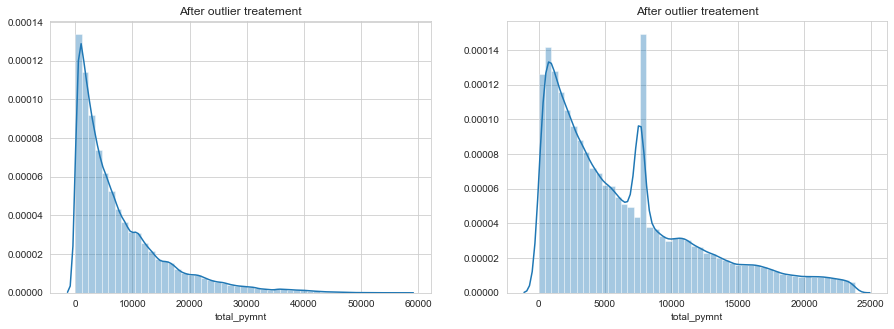

In [151]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['total_pymnt']).set_title("After outlier treatement")

#treating upper end outier with mean
data_num.loc[data_num['total_pymnt']>IQR_UL , 'total_pymnt'] = total_pymnt_mean
data.loc[data['total_pymnt']>IQR_UL , 'total_pymnt'] = total_pymnt_mean

#treating lower end outlier as mean
data_num.loc[data_num['total_pymnt']<IQR_LL , 'total_pymnt'] = total_pymnt_mean
data.loc[data['total_pymnt']<IQR_LL , 'total_pymnt'] = total_pymnt_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['total_pymnt']).set_title("After outlier treatement")

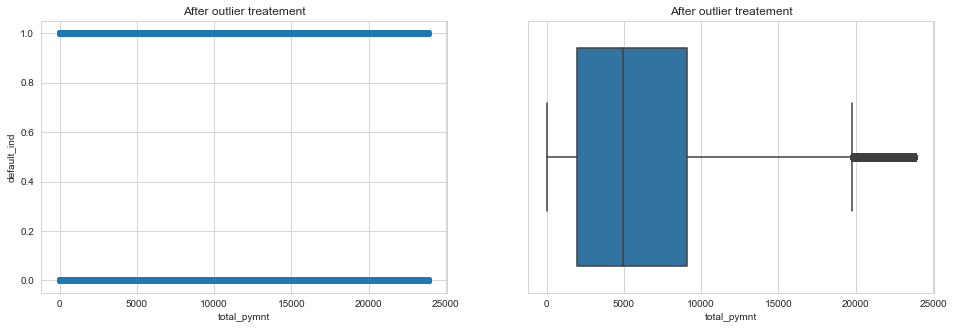

In [152]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['total_pymnt'], y=data_num['default_ind'], fit_reg=False).set_title("After outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['total_pymnt']).set_title("After outlier treatement")
plt.show()

In [153]:
data_num['total_pymnt_ban'] = pd.cut(data_num['total_pymnt'], 3)
data_num['total_pymnt_ban'].value_counts()

(-23.861, 7953.545]       601687
(7953.545, 15907.091]     177540
(15907.091, 23860.636]     70824
Name: total_pymnt_ban, dtype: int64

In [154]:
data_num.loc[data_num['total_pymnt'] <= 7796.647, 'total_pymnt'] = 0
data_num.loc[(data_num['total_pymnt'] > 7796.647) & (data_num['total_pymnt'] <= 15593.293), 'total_pymnt'] = 1
data_num.loc[data_num['total_pymnt'] > 15593.293, 'total_pymnt'] = 2
data_num['total_pymnt'].value_counts()

0.0    596283
1.0    178587
2.0     75181
Name: total_pymnt, dtype: int64

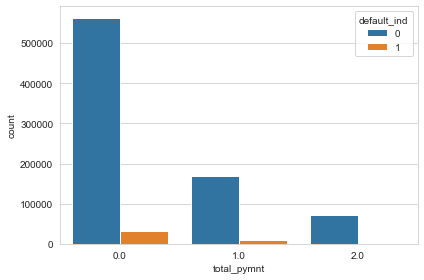

In [155]:
sns.countplot(x='total_pymnt',hue='default_ind',data=data_num)
plt.tight_layout()

In [156]:
#total_rec_int
data_num['total_rec_int'].describe()

count    850051.000000
mean       1738.538975
std        2057.862842
min           0.000000
25%         448.480000
50%        1069.650000
75%        2215.945000
max       24205.620000
Name: total_rec_int, dtype: float64

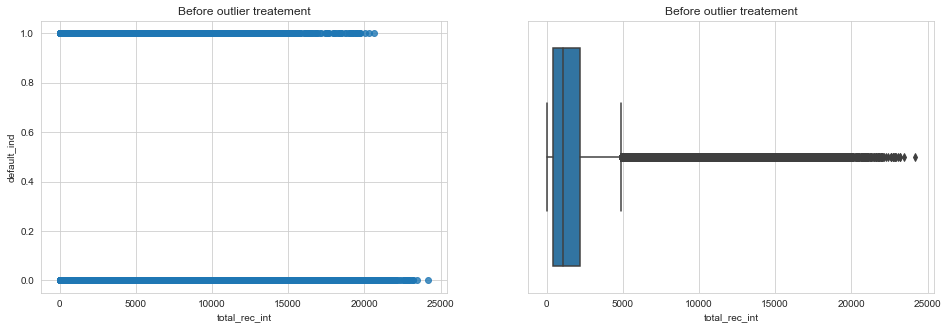

In [157]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['total_rec_int'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['total_rec_int']).set_title("Before outlier treatement")
plt.show()

In [158]:
# Outliers Treatment
#Find mean of the column "total_rec_int"
total_rec_int_mean = int(data_num['total_rec_int'].mean())

#FInd 75th Percentile of the column "total_rec_int"
IQR_total_rec_int_P75 = data_num['total_rec_int'].quantile(q=0.75)

#FInd 25th Percentile of the column "total_rec_int"
IQR_total_rec_int_P25 = data_num['total_rec_int'].quantile(q=0.25)

#FInd IQR of the column "total_rec_int"
IQR_total_rec_int = IQR_total_rec_int_P75-IQR_total_rec_int_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_total_rec_int_P25 - 1.5*IQR_total_rec_int)
IQR_UL = int(IQR_total_rec_int_P75 + 1.5*IQR_total_rec_int)

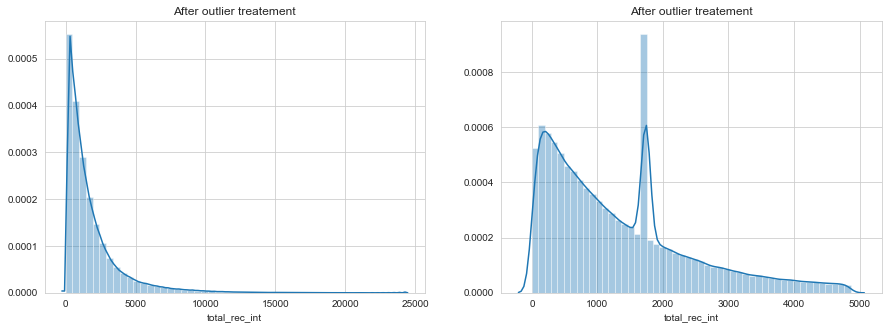

In [159]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['total_rec_int']).set_title("After outlier treatement")

#treating upper end outier with mean
data_num.loc[data_num['total_rec_int']>IQR_UL , 'total_rec_int'] = total_rec_int_mean
data.loc[data['total_rec_int']>IQR_UL , 'total_rec_int'] = total_rec_int_mean

#treating lower end outlier as mean
data_num.loc[data_num['total_rec_int']<IQR_LL , 'total_rec_int'] = total_rec_int_mean
data.loc[data['total_rec_int']<IQR_LL , 'total_rec_int'] = total_rec_int_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['total_rec_int']).set_title("After outlier treatement")

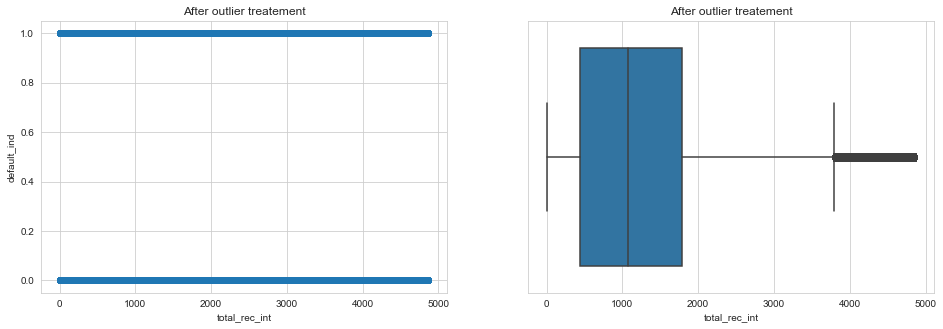

In [160]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['total_rec_int'], y=data_num['default_ind'], fit_reg=False).set_title("After outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['total_rec_int']).set_title("After outlier treatement")
plt.show()

In [161]:
data_num['total_rec_int_band'] = pd.cut(data_num['total_rec_int'], 4)
data_num['total_rec_int_band'].value_counts()

(-4.867, 1216.728]      462751
(1216.728, 2433.455]    260122
(2433.455, 3650.182]     86180
(3650.182, 4866.91]      40998
Name: total_rec_int_band, dtype: int64

In [162]:
data_num.loc[data_num['total_rec_int'] <= 1190.965, 'total_rec_int'] = 0
data_num.loc[(data_num['total_rec_int'] > 1190.965) & (data_num['total_rec_int'] <= 2381.93), 'total_rec_int'] = 1
data_num.loc[data_num['total_rec_int'] > 2381.93, 'total_rec_int'] = 2
data_num['total_rec_int'].value_counts()

0.0    456616
1.0    260730
2.0    132705
Name: total_rec_int, dtype: int64

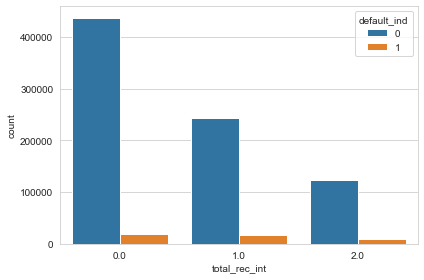

In [163]:
sns.countplot(x='total_rec_int',hue='default_ind',data=data_num)
plt.tight_layout()

In [164]:
#total_rec_late_fee
data_num['total_rec_late_fee'].describe()

count    850051.000000
mean          0.315308
std           3.548815
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         294.680000
Name: total_rec_late_fee, dtype: float64

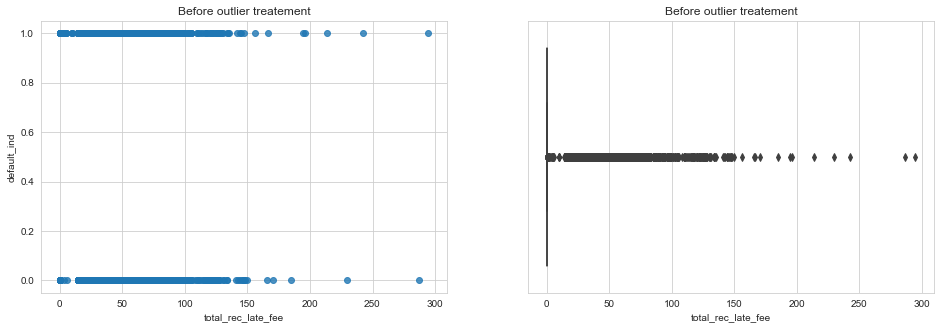

In [165]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['total_rec_late_fee'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['total_rec_late_fee']).set_title("Before outlier treatement")
plt.show()

##### Outliers Treatment not required

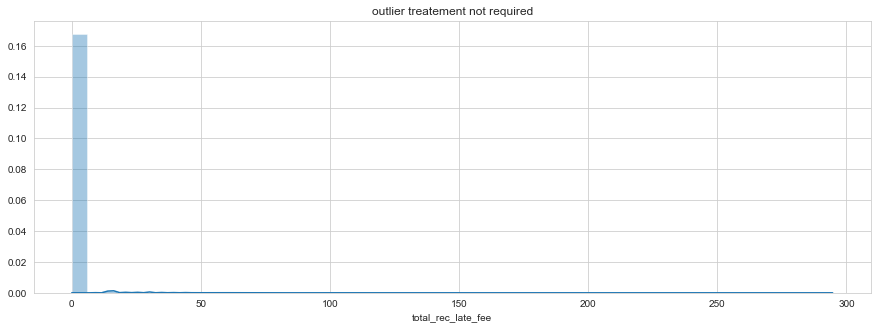

In [166]:
plt.subplots(figsize=(15, 5))
plt.plot
g = sns.distplot(data_num['total_rec_late_fee']).set_title("outlier treatement not required")

In [167]:
data_num['total_rec_late_fee_band'] = pd.cut(data_num['total_rec_late_fee'], 4)
data_num['total_rec_late_fee_band'].value_counts()# Should be removed as it doesnot convey anything

(-0.295, 73.67]     849765
(73.67, 147.34]        270
(147.34, 221.01]        12
(221.01, 294.68]         4
Name: total_rec_late_fee_band, dtype: int64

In [168]:
data_num.loc[data_num['total_rec_late_fee'] <= 0, 'total_rec_late_fee'] = 0
data_num.loc[data_num['total_rec_late_fee'] > 0, 'total_rec_late_fee'] = 1
data_num['total_rec_late_fee'].value_counts()

0.0    840204
1.0      9847
Name: total_rec_late_fee, dtype: int64

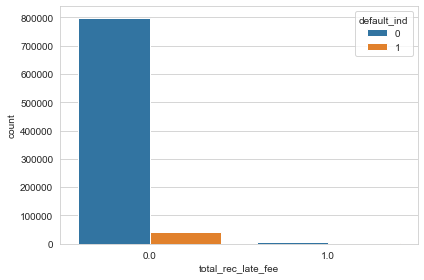

In [169]:
sns.countplot(x='total_rec_late_fee',hue='default_ind',data=data_num)
plt.tight_layout() 

In [170]:
#recoveries
data_num['recoveries'].describe()

count    850051.000000
mean         46.124979
std         408.325454
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64

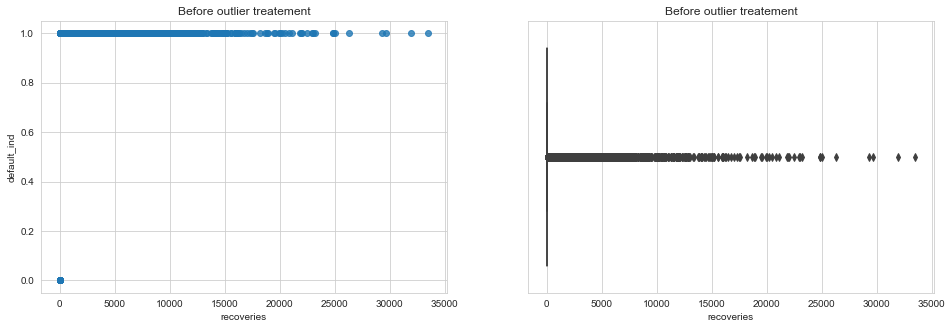

In [171]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['recoveries'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['recoveries']).set_title("Before outlier treatement")
plt.show()

In [172]:
# Outliers Treatment
#Find mean of the column "recoveries"
recoveries_mean = int(data_num['recoveries'].mean())

#FInd 75th Percentile of the column "recoveries"
IQR_recoveries_P75 = data_num['recoveries'].quantile(q=0.75)

#FInd 25th Percentile of the column "recoveries"
IQR_recoveries_P25 = data_num['recoveries'].quantile(q=0.25)

#FInd IQR of the column "recoveries"
IQR_recoveries = IQR_recoveries_P75-IQR_recoveries_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_recoveries_P25 - 1.5*IQR_recoveries)
IQR_UL = int(IQR_recoveries_P75 + 1.5*IQR_recoveries)

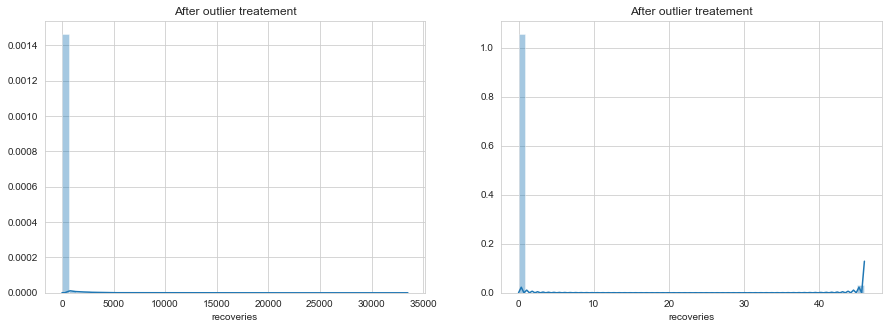

In [173]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['recoveries']).set_title("After outlier treatement")

#treating upper end outier with mean
data_num.loc[data_num['recoveries']>IQR_UL , 'recoveries'] = recoveries_mean
data.loc[data['recoveries']>IQR_UL , 'recoveries'] = recoveries_mean

#treating lower end outlier as mean
data_num.loc[data_num['recoveries']<IQR_LL , 'recoveries'] = recoveries_mean
data.loc[data['recoveries']<IQR_LL , 'recoveries'] = recoveries_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['recoveries']).set_title("After outlier treatement")


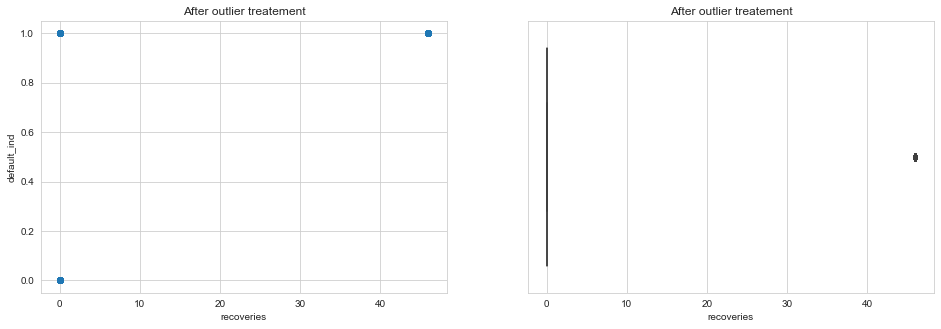

In [174]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['recoveries'], y=data_num['default_ind'], fit_reg=False).set_title("After outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['recoveries']).set_title("After outlier treatement")
plt.show()

In [175]:
data_num['recoveries_band'] = pd.cut(data_num['recoveries'], 4)
data_num['recoveries_band'].value_counts()

(-0.046, 11.5]    826219
(34.5, 46.0]       23832
(23.0, 34.5]           0
(11.5, 23.0]           0
Name: recoveries_band, dtype: int64

In [176]:
data_num.loc[data_num['recoveries'] <= 11.25, 'recoveries'] = 0
data_num.loc[data_num['recoveries'] > 11.25, 'recoveries'] = 1
data_num['recoveries'].value_counts()

0.0    826219
1.0     23832
Name: recoveries, dtype: int64

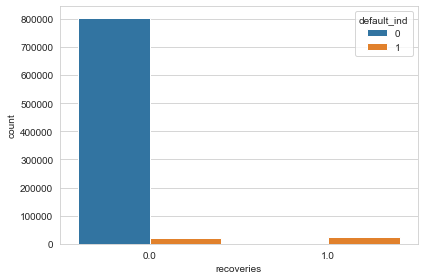

In [177]:
sns.countplot(x='recoveries',hue='default_ind',data=data_num)
plt.tight_layout()

In [178]:
#last_pymnt_amnt
data_num['last_pymnt_amnt'].describe()

count    850051.000000
mean       2214.938004
std        4836.243037
min           0.000000
25%         284.370000
50%         467.430000
75%         845.545000
max       36347.050000
Name: last_pymnt_amnt, dtype: float64

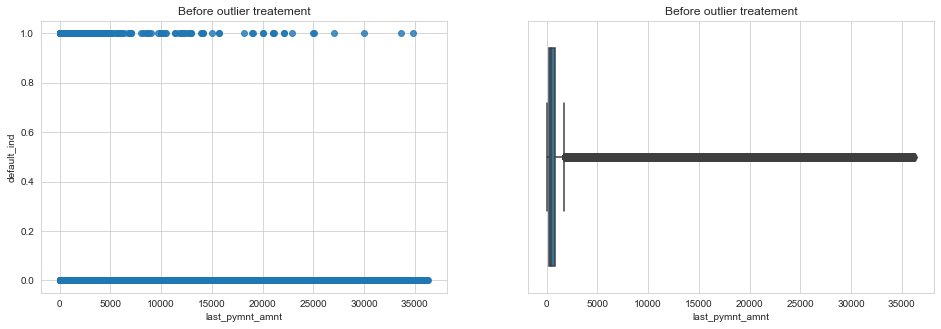

In [179]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['last_pymnt_amnt'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['last_pymnt_amnt']).set_title("Before outlier treatement")
plt.show()

In [180]:
# Outliers Treatment
#Find mean of the column "last_pymnt_amnt"
last_pymnt_amnt_mean = int(data_num['last_pymnt_amnt'].mean())

#FInd 75th Percentile of the column "last_pymnt_amnt"
IQR_last_pymnt_amnt_P75 = data_num['last_pymnt_amnt'].quantile(q=0.75)

#FInd 25th Percentile of the column "last_pymnt_amnt"
IQR_last_pymnt_amnt_P25 = data_num['last_pymnt_amnt'].quantile(q=0.25)

#FInd IQR of the column "last_pymnt_amnt"
IQR_last_pymnt_amnt = IQR_last_pymnt_amnt_P75-IQR_last_pymnt_amnt_P25

#Fix boundaries to detect outliers in column "dti"
IQR_LL = int(IQR_last_pymnt_amnt_P25 - 1.5*IQR_last_pymnt_amnt)
IQR_UL = int(IQR_last_pymnt_amnt_P75 + 1.5*IQR_last_pymnt_amnt)

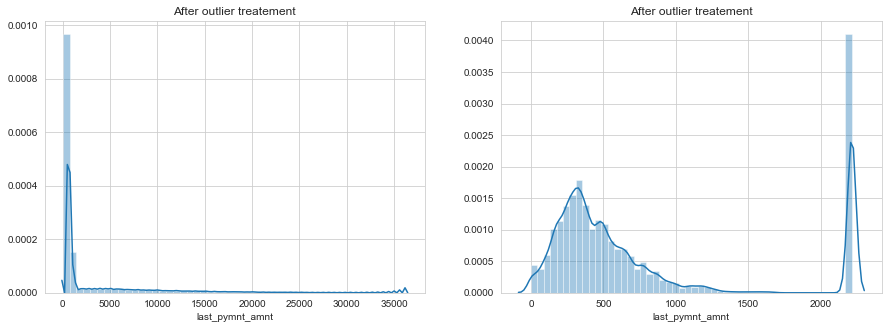

In [181]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['last_pymnt_amnt']).set_title("After outlier treatement")

#treating upper end outier with mean
data_num.loc[data_num['last_pymnt_amnt']>IQR_UL , 'last_pymnt_amnt'] = last_pymnt_amnt_mean
data.loc[data['last_pymnt_amnt']>IQR_UL , 'last_pymnt_amnt'] = last_pymnt_amnt_mean

#treating lower end outlier as mean
data_num.loc[data_num['last_pymnt_amnt']<IQR_LL , 'last_pymnt_amnt'] = last_pymnt_amnt_mean
data.loc[data['last_pymnt_amnt']<IQR_LL , 'last_pymnt_amnt'] = last_pymnt_amnt_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['last_pymnt_amnt']).set_title("After outlier treatement")

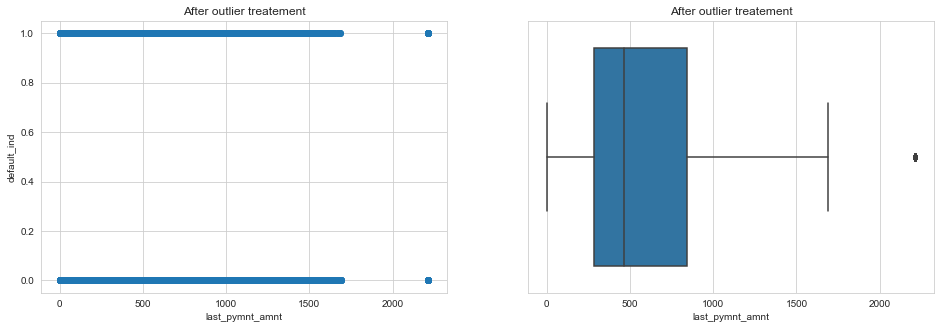

In [182]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['last_pymnt_amnt'], y=data_num['default_ind'], fit_reg=False).set_title("After outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['last_pymnt_amnt']).set_title("After outlier treatement")
plt.show()

In [183]:
data_num['last_pymnt_amnt_ban'] = pd.cut(data_num['last_pymnt_amnt'], 3)
data_num['last_pymnt_amnt_ban'].value_counts()

(-2.214, 738.0]     600919
(1476.0, 2214.0]    157129
(738.0, 1476.0]      92003
Name: last_pymnt_amnt_ban, dtype: int64

In [184]:
data_num.loc[data_num['last_pymnt_amnt'] <= 359.33, 'last_pymnt_amnt'] = 0
data_num.loc[data_num['last_pymnt_amnt'] > 359.33, 'last_pymnt_amnt'] = 1
data_num['last_pymnt_amnt'].value_counts()

1.0    532986
0.0    317065
Name: last_pymnt_amnt, dtype: int64

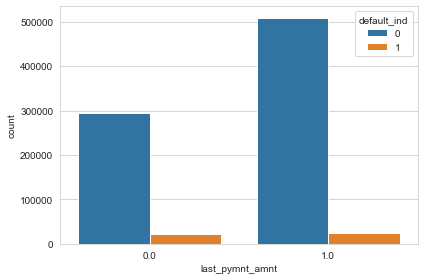

In [185]:
sns.countplot(x='last_pymnt_amnt',hue='default_ind',data=data_num)
plt.tight_layout()

In [186]:
#collections_12_mths_ex_med
data_num['collections_12_mths_ex_med'].describe()

count    850051.000000
mean          0.014197
std           0.133583
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64

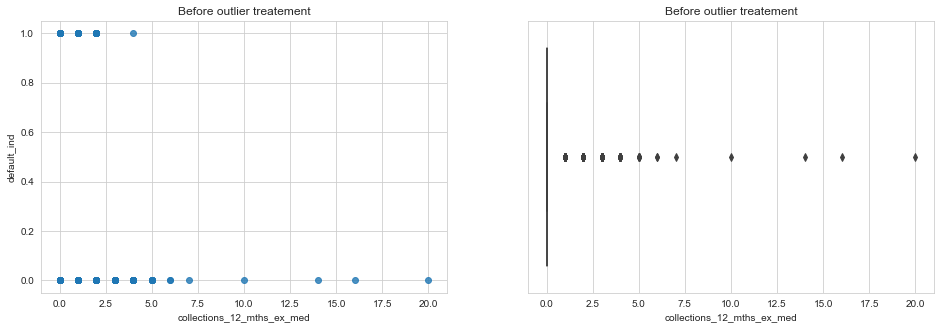

In [187]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['collections_12_mths_ex_med'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['collections_12_mths_ex_med']).set_title("Before outlier treatement")
plt.show()

##### Outliers Treatment- not required here because of nature of column

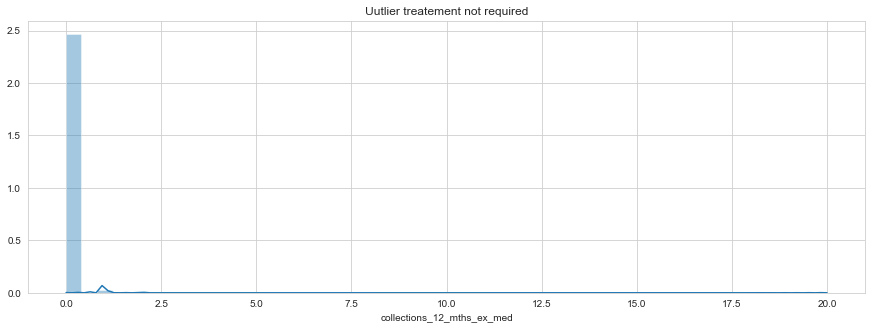

In [188]:
plt.subplots(figsize=(15, 5))
plt.plot
g = sns.distplot(data_num['collections_12_mths_ex_med']).set_title("Uutlier treatement not required")

In [189]:
data_num['collections_12_mths_ex_med_band'] = pd.cut(data_num['collections_12_mths_ex_med'], 4)
data_num['collections_12_mths_ex_med_band'].value_counts()

(-0.02, 5.0]    850044
(5.0, 10.0]          4
(15.0, 20.0]         2
(10.0, 15.0]         1
Name: collections_12_mths_ex_med_band, dtype: int64

In [190]:
data_num.loc[data_num['collections_12_mths_ex_med'] <= 0, 'collections_12_mths_ex_med'] = 0
data_num.loc[data_num['collections_12_mths_ex_med'] > 0, 'collections_12_mths_ex_med'] = 1
data_num['collections_12_mths_ex_med'].value_counts()

0.0    839007
1.0     11044
Name: collections_12_mths_ex_med, dtype: int64

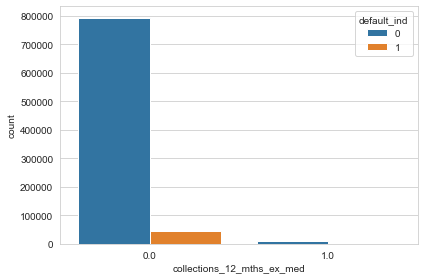

In [191]:
sns.countplot(x='collections_12_mths_ex_med',hue='default_ind',data=data_num)
plt.tight_layout() # can be dropped does not infer much

In [192]:
#acc_now_delinq
data_num['acc_now_delinq'].describe()

count    850051.000000
mean          0.004895
std           0.076959
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: acc_now_delinq, dtype: float64

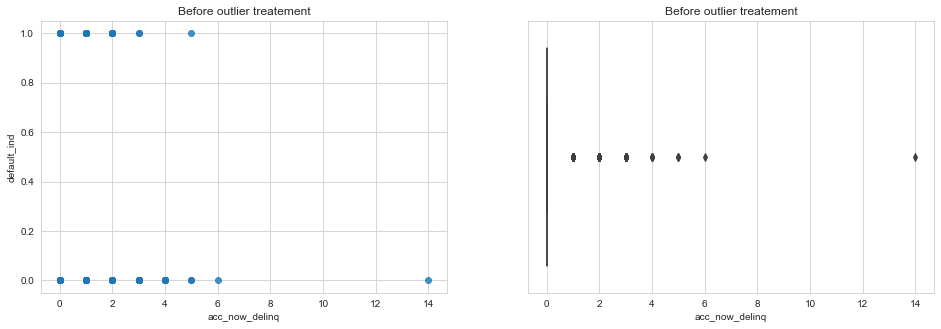

In [193]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['acc_now_delinq'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['acc_now_delinq']).set_title("Before outlier treatement")
plt.show()

##### Outliers Treatment not req as o/p needs to be in binarize format

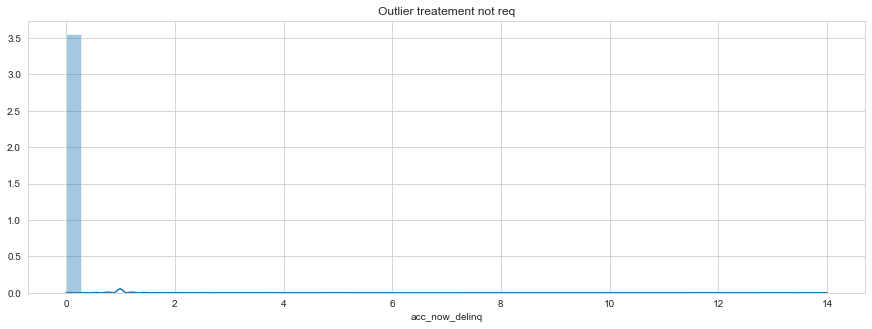

In [194]:
plt.subplots(figsize=(15, 5))
plt.plot
g = sns.distplot(data_num['acc_now_delinq']).set_title("Outlier treatement not req")

In [195]:
data_num.loc[data_num['acc_now_delinq'] <= 0, 'acc_now_delinq'] = 0
data_num.loc[data_num['acc_now_delinq'] > 0, 'acc_now_delinq'] = 1
data_num['acc_now_delinq'].value_counts()

0.0    846186
1.0      3865
Name: acc_now_delinq, dtype: int64

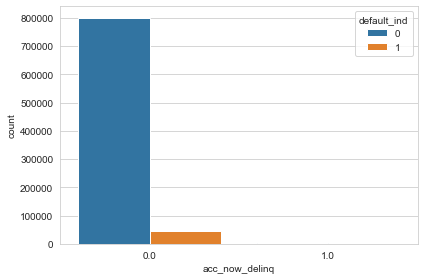

In [196]:
sns.countplot(x='acc_now_delinq',hue='default_ind',data=data_num)
plt.tight_layout() #can be dropped as it doesnot convey anything

In [197]:
#tot_coll_amt
data_num['tot_coll_amt'].describe()

count    8.500510e+05
mean     2.255540e+02
std      1.010256e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64

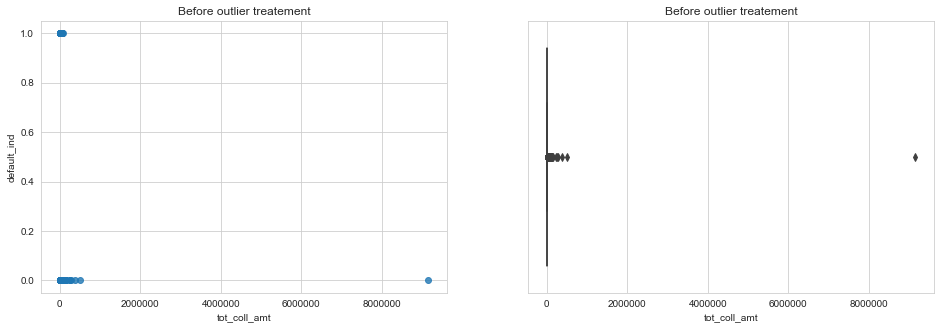

In [198]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['tot_coll_amt'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['tot_coll_amt']).set_title("Before outlier treatement")
plt.show()

In [199]:
# Outliers Treatment
#Find mean of the column "tot_coll_amt"
tot_coll_amt_mean = int(data_num['tot_coll_amt'].mean())

#FInd 75th Percentile of the column "tot_coll_amt"
IQR_tot_coll_amt_P75 = data_num['tot_coll_amt'].quantile(q=0.75)

#FInd 25th Percentile of the column "tot_coll_amt"
IQR_tot_coll_amt_P25 = data_num['tot_coll_amt'].quantile(q=0.25)

#FInd IQR of the column "tot_coll_amt"
IQR_tot_coll_amt = IQR_tot_coll_amt_P75-IQR_tot_coll_amt_P25

#Fix boundaries to detect outliers in column "tot_coll_amt"
IQR_LL = int(IQR_tot_coll_amt_P25 - 1.5*IQR_tot_coll_amt)
IQR_UL = int(IQR_tot_coll_amt_P75 + 1.5*IQR_tot_coll_amt)

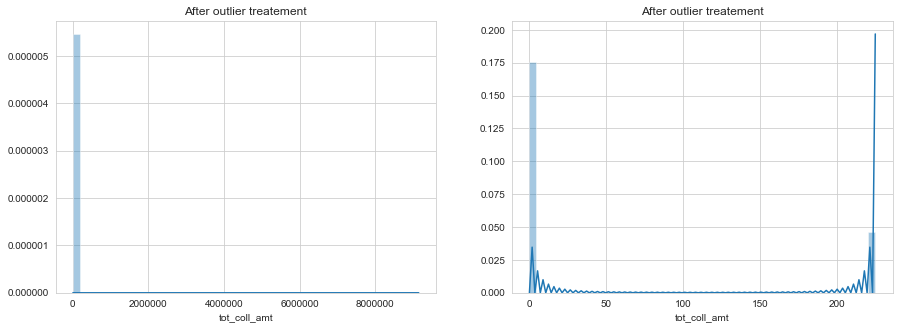

In [200]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['tot_coll_amt']).set_title("After outlier treatement")

#treating upper end outier with mean
data_num.loc[data_num['tot_coll_amt']>IQR_UL , 'tot_coll_amt'] = tot_coll_amt_mean
data.loc[data['tot_coll_amt']>IQR_UL , 'tot_coll_amt'] = tot_coll_amt_mean

#treating lower end outlier as mean
data_num.loc[data_num['tot_coll_amt']<IQR_LL , 'tot_coll_amt'] = tot_coll_amt_mean
data.loc[data['tot_coll_amt']<IQR_LL , 'tot_coll_amt'] = tot_coll_amt_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['tot_coll_amt']).set_title("After outlier treatement")

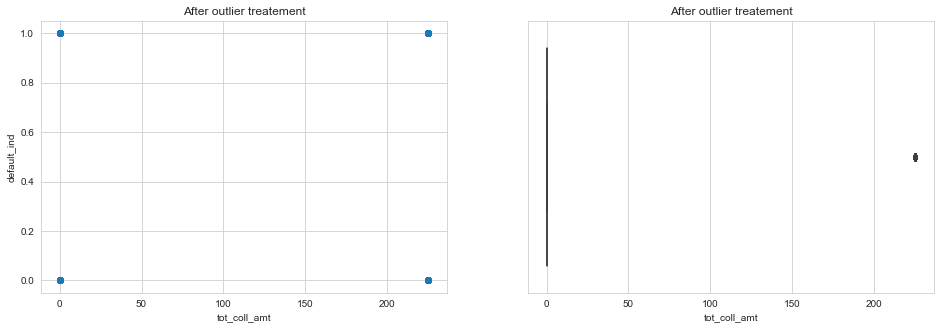

In [201]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['tot_coll_amt'], y=data_num['default_ind'], fit_reg=False).set_title("After outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['tot_coll_amt']).set_title("After outlier treatement")
plt.show()

In [202]:
data_num['tot_coll_amt_band'] = pd.cut(data_num['tot_coll_amt'], 4)
data_num['tot_coll_amt_band'].value_counts()

(-0.225, 56.25]    672076
(168.75, 225.0]    177975
(112.5, 168.75]         0
(56.25, 112.5]          0
Name: tot_coll_amt_band, dtype: int64

In [203]:
data_num.loc[data_num['tot_coll_amt'] <= 56.25, 'tot_coll_amt'] = 0
data_num.loc[data_num['tot_coll_amt'] > 56.25, 'tot_coll_amt'] = 1
data_num['tot_coll_amt'].value_counts()

0.0    672076
1.0    177975
Name: tot_coll_amt, dtype: int64

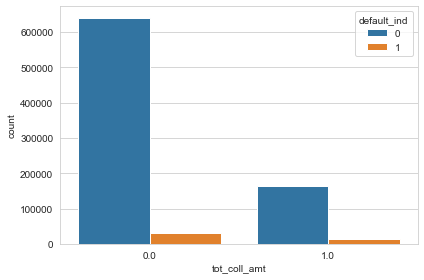

In [204]:
sns.countplot(x='tot_coll_amt',hue='default_ind',data=data_num)
plt.tight_layout()

In [205]:
#tot_cur_bal
data_num['tot_cur_bal'].describe()

count    8.500510e+05
mean     1.398324e+05
std      1.477847e+05
min      0.000000e+00
25%      3.225400e+04
50%      1.008260e+05
75%      1.964245e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

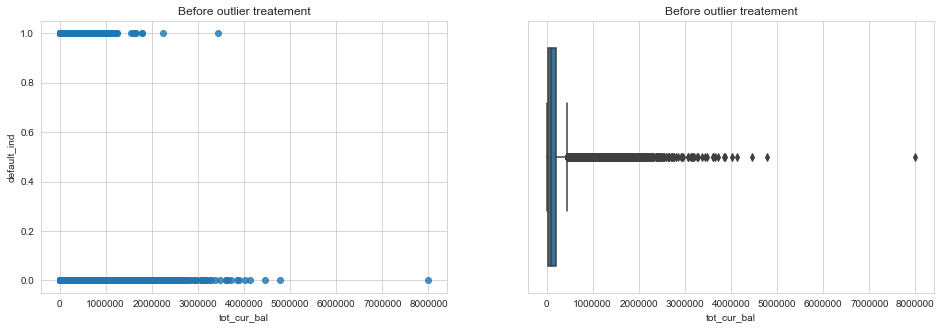

In [206]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['tot_cur_bal'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['tot_cur_bal']).set_title("Before outlier treatement")
plt.show()

In [207]:
# Outliers Treatment
#Find mean of the column "tot_cur_bal"
tot_cur_bal_mean = int(data_num['tot_cur_bal'].mean())

#FInd 75th Percentile of the column "tot_cur_bal"
IQR_tot_cur_bal_P75 = data_num['tot_cur_bal'].quantile(q=0.75)

#FInd 25th Percentile of the column "tot_cur_bal"
IQR_tot_cur_bal_P25 = data_num['tot_cur_bal'].quantile(q=0.25)

#FInd IQR of the column "tot_cur_bal"
IQR_tot_cur_bal = IQR_tot_cur_bal_P75-IQR_tot_cur_bal_P25

#Fix boundaries to detect outliers in column "tot_cur_bal"
IQR_LL = int(IQR_tot_cur_bal_P25 - 1.5*IQR_tot_cur_bal)
IQR_UL = int(IQR_tot_cur_bal_P75 + 1.5*IQR_tot_cur_bal)

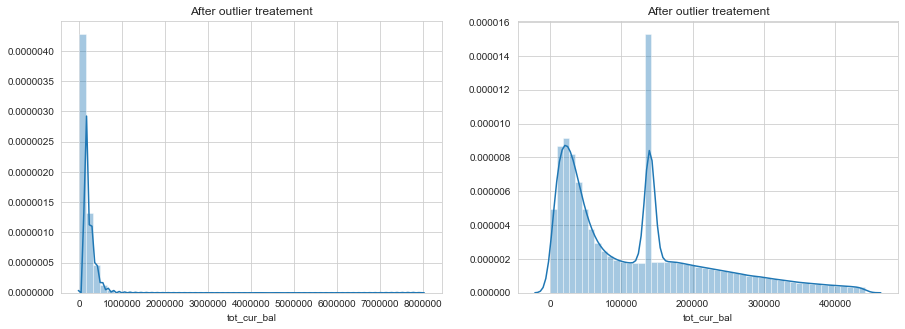

In [208]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
g = sns.distplot(data_num['tot_cur_bal']).set_title("After outlier treatement")

#treating upper end outier with mean
data_num.loc[data_num['tot_cur_bal']>IQR_UL , 'tot_cur_bal'] = tot_cur_bal_mean
data.loc[data['tot_cur_bal']>IQR_UL , 'tot_cur_bal'] = tot_cur_bal_mean

#treating lower end outlier as mean
data_num.loc[data_num['tot_cur_bal']<IQR_LL , 'tot_cur_bal'] = tot_cur_bal_mean
data.loc[data['tot_cur_bal']<IQR_LL , 'tot_cur_bal'] = tot_cur_bal_mean
plt.subplot(1, 2, 2)                                                                                
g = sns.distplot(data_num['tot_cur_bal']).set_title("After outlier treatement")

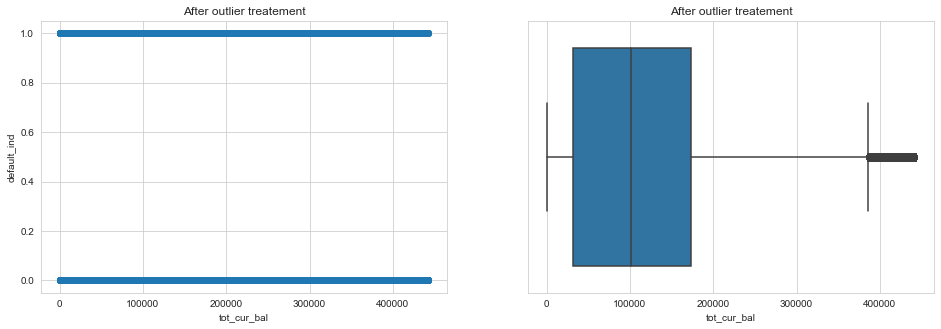

In [209]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['tot_cur_bal'], y=data_num['default_ind'], fit_reg=False).set_title("After outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['tot_cur_bal']).set_title("After outlier treatement")
plt.show()

In [210]:
data_num['tot_cur_bal_bb'] = pd.cut(data_num['tot_cur_bal'], 3)
data_num['tot_cur_bal_bb'].value_counts()

(-442.671, 147557.0]    597245
(147557.0, 295114.0]    181522
(295114.0, 442671.0]     71284
Name: tot_cur_bal_bb, dtype: int64

In [211]:
data_num.loc[data_num['tot_cur_bal'] <= 139092.667, 'tot_cur_bal'] = 0
data_num.loc[data_num['tot_cur_bal'] > 139092.667, 'tot_cur_bal'] = 1
data_num['tot_cur_bal'].value_counts()

0.0    482745
1.0    367306
Name: tot_cur_bal, dtype: int64

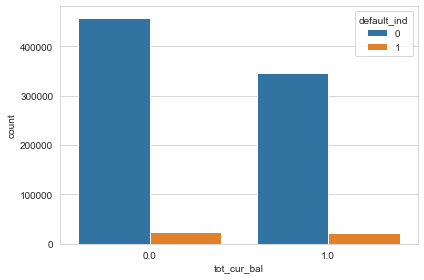

In [212]:
sns.countplot(x='tot_cur_bal',hue='default_ind',data=data_num)
plt.tight_layout()

In [213]:
data_num['installment']=data['installment']

In [214]:
#installment
data_num['installment'].describe()

count    850051.000000
mean        434.955673
std         243.105752
min          15.690000
25%         259.800000
50%         381.040000
75%         569.705000
max        1391.410000
Name: installment, dtype: float64

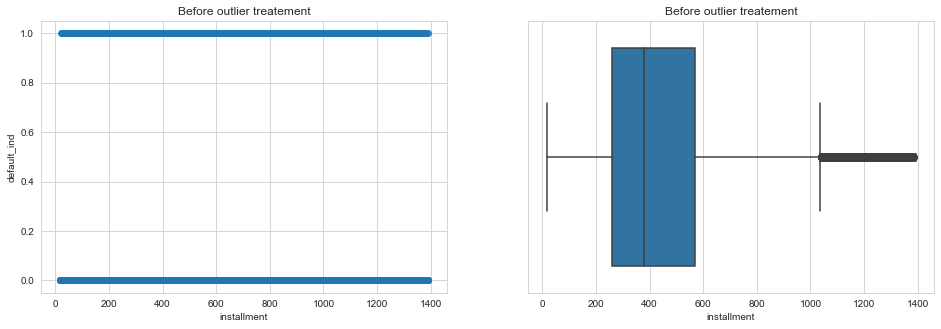

In [215]:
#Checking Outlier
plt.subplots(figsize=(16, 5))
plt.figure(1)
plt.subplot(121)
g = sns.regplot(x=data_num['installment'], y=data_num['default_ind'], fit_reg=False).set_title("Before outlier treatement")
plt.subplot(122)
sns.boxplot(data=data_num,x=data_num['installment']).set_title("Before outlier treatement")
plt.show()

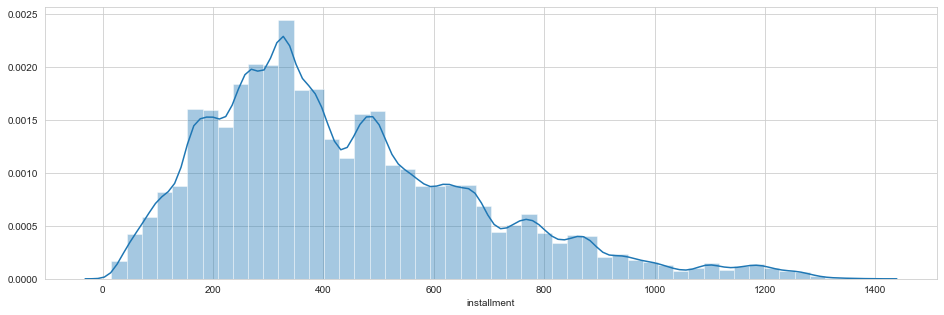

In [216]:
plt.subplots(figsize=(16, 5))
sns.distplot(data_num['installment'])
plt.show() #outliers does not exist

In [217]:
data_num['installment_bann'] = pd.cut(data_num['installment'], 3)
data_num['installment_bann'].value_counts()

(14.314, 474.263]     536533
(474.263, 932.837]    276822
(932.837, 1391.41]     36696
Name: installment_bann, dtype: int64

In [218]:
data_num.loc[data_num['installment'] <= 474.263, 'installment'] = 0
data_num.loc[data_num['installment'] > 474.263, 'installment'] = 1
data_num['installment'].value_counts()

0.0    536533
1.0    313518
Name: installment, dtype: int64

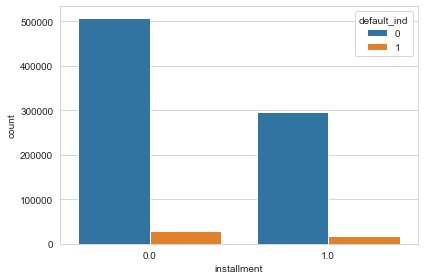

In [219]:
sns.countplot(x='installment',hue='default_ind',data=data_num)
plt.tight_layout()

In [220]:
data_num.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'default_ind', 'annual_inc_band', 'loan_amnt_band',
       'int_rate_band', 'dti_band', 'delinq_2yrs_bandvx',
       'inq_last_6mths_band', 'mths_since_last_delinq_band', 'open_acc_ba',
       'pub_rec_ban', 'revol_bal_baad', 'revol_util_ban', 'total_acc_band',
       'out_prncp_ban', 'total_pymnt_ban', 'total_rec_int_band',
       'total_rec_late_fee_band', 'recoveries_band', 'last_pymnt_amnt_ban',
       'collections_12_mths_ex_med_band', 'tot_coll_amt_band',
       'tot_cur_bal_bb', 'installment', 'installment_bann'],
      dtype='object')

In [221]:
data_num.drop(['annual_inc_band', 'loan_amnt_band',
       'int_rate_band', 'dti_band', 'delinq_2yrs_bandvx',
       'inq_last_6mths_band', 'mths_since_last_delinq_band', 'open_acc_ba',
       'pub_rec_ban', 'revol_bal_baad', 'revol_util_ban', 'total_acc_band',
       'out_prncp_ban', 'total_pymnt_ban', 'total_rec_int_band',
       'total_rec_late_fee_band', 'recoveries_band', 'last_pymnt_amnt_ban',
       'collections_12_mths_ex_med_band', 'tot_coll_amt_band',
       'tot_cur_bal_bb', 'installment_bann'], axis = 1, inplace = True)

In [222]:
print(data.shape, data_num.shape)

(850051, 53) (850051, 24)


### EDA will be performed on Categorical data with data type as object

In [223]:
data_cat = data.select_dtypes(include = ['object'])

In [224]:
data_cat.shape

(850051, 19)

In [225]:
data_cat.isnull().sum()

term                       0
grade                      0
sub_grade                  0
emp_title              49162
emp_length             42810
home_ownership             0
verification_status        0
issue_d                    0
pymnt_plan                 0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
earliest_cr_line           0
initial_list_status        0
last_pymnt_d               0
next_pymnt_d               0
last_credit_pull_d         0
application_type           0
dtype: int64

In [226]:
data_cat['default_ind'] = data['default_ind']

C:\Users\ezkiska\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [227]:
data_cat.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type', 'default_ind'],
      dtype='object')

In [228]:
#grade
data_cat['grade'].value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     19434
G       849
Name: grade, dtype: int64

In [229]:
grade_map={'A':1, 'B':2, 'C':3, 'D': 4, 'E':5, 'F':5, 'G':5}
data_cat['grade']=data_cat['grade'].map(grade_map)

C:\Users\ezkiska\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [230]:
data['grade']=data['grade'].map(grade_map)

In [231]:
data_cat['grade'].value_counts()

2    247998
3    236855
1    145665
4    132802
5     86731
Name: grade, dtype: int64

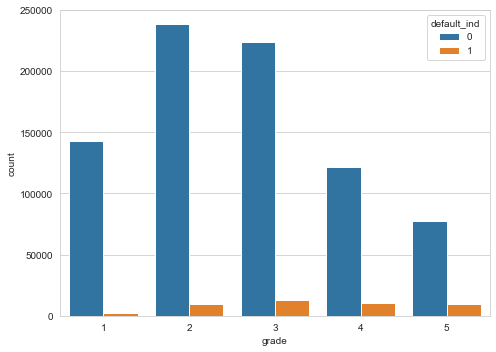

In [232]:
plt.figure(figsize=(7,5))
sns.countplot(x='grade',hue='default_ind',data=data_cat)
plt.tight_layout()

In [233]:
#sub_grade
data_cat['sub_grade'].value_counts()  # A lot of data exists will keep this for categorical

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3167
F5      487
G1      348
G2      218
G3      121
G4      100
G5       62
Name: sub_grade, dtype: int64

In [234]:
#home_ownership
data_cat['home_ownership'].value_counts()

MORTGAGE    426361
RENT        340029
OWN          83469
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [235]:
home_map={'MORTGAGE':1, 'RENT':2, 'OWN':3, 'OTHER':4, 'NONE':4, 'ANY':4}
data_cat['home_ownership']=data_cat['home_ownership'].map(home_map)
data['home_ownership']=data['home_ownership'].map(home_map)
data_cat['home_ownership'].value_counts()

C:\Users\ezkiska\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    426361
2    340029
3     83469
4       192
Name: home_ownership, dtype: int64

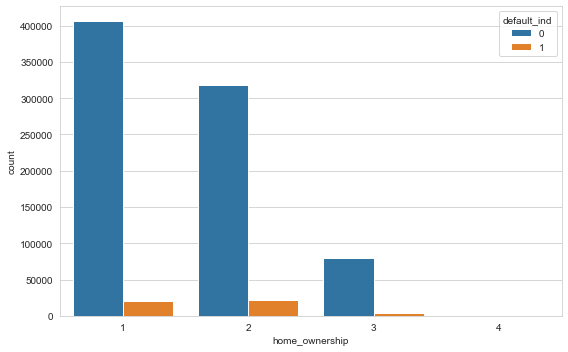

In [236]:
plt.figure(figsize=(8,5))
sns.countplot(x='home_ownership',hue='default_ind',data=data_cat)
plt.tight_layout()

In [237]:
#verification_status
data_cat['verification_status'].value_counts()

Source Verified    316127
Verified           276490
Not Verified       257434
Name: verification_status, dtype: int64

In [238]:
verify_map={'Source Verified':1, 'Not Verified':2, 'Verified':3}
data_cat['verification_status']=data_cat['verification_status'].map(verify_map)
data['verification_status']=data['verification_status'].map(verify_map)
data_cat['verification_status'].value_counts()

C:\Users\ezkiska\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    316127
3    276490
2    257434
Name: verification_status, dtype: int64

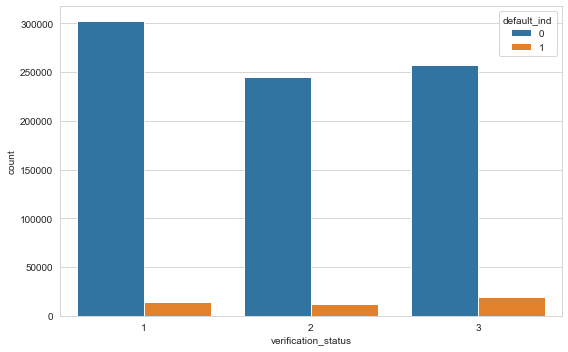

In [239]:
plt.figure(figsize=(8,5))
sns.countplot(x='verification_status',hue='default_ind',data=data_cat)
plt.tight_layout()

In [240]:
#purpose
data_cat['purpose'].value_counts()  # part of categorical data so numerical mapping wont be done

debt_consolidation    501749
credit_card           199840
home_improvement       49558
other                  40267
major_purchase         16474
small_business          9432
car                     8557
medical                 8094
moving                  5082
vacation                4517
house                   3344
wedding                 2269
renewable_energy         542
educational              326
Name: purpose, dtype: int64

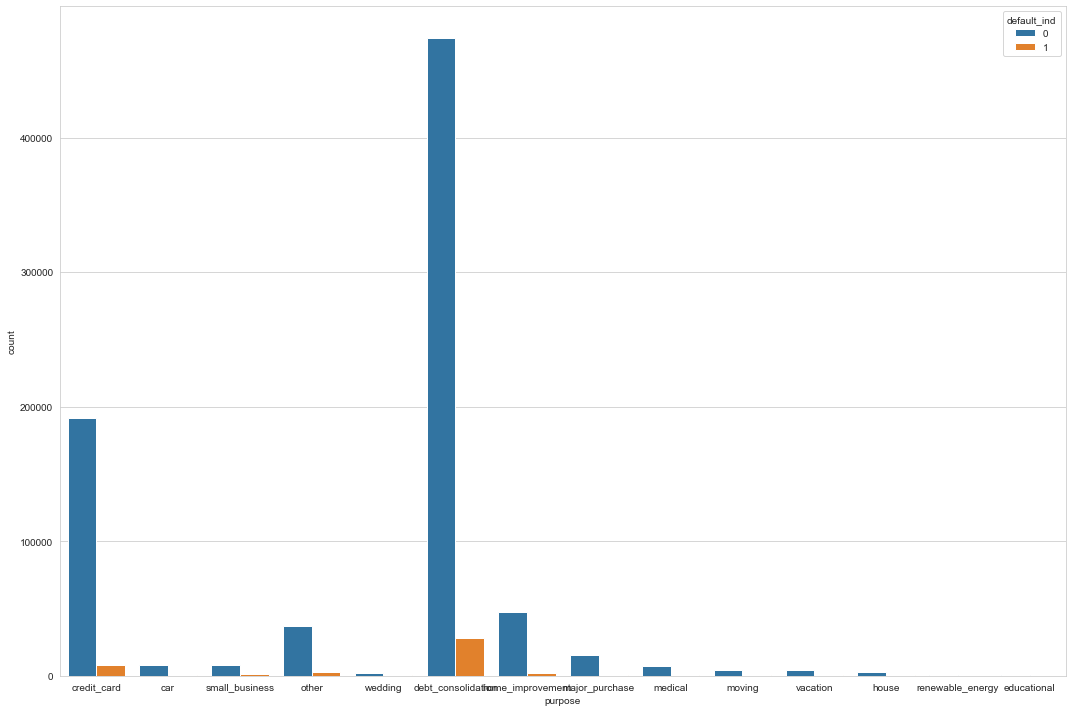

In [241]:
plt.figure(figsize=(15,10))
sns.countplot(x='purpose',hue='default_ind',data=data_cat)
plt.tight_layout()

In [242]:
#term  ##bcategorical dummyfying needs to be done
data_cat['term'].value_counts()

 36 months    599561
 60 months    250490
Name: term, dtype: int64

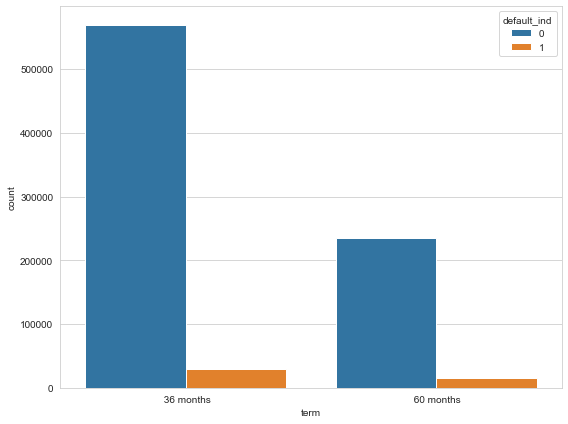

In [243]:
plt.figure(figsize=(8,6))
sns.countplot(x='term',hue='default_ind',data=data_cat)
plt.tight_layout()

In [244]:
#application_type
data_cat['application_type'].value_counts() 

INDIVIDUAL    849621
JOINT            430
Name: application_type, dtype: int64

In [245]:
app_map={'INDIVIDUAL':1, 'JOINT':2}
data_cat['application_type']=data_cat['application_type'].map(app_map)
data['application_type']=data['application_type'].map(app_map)
data_cat['application_type'].value_counts()

C:\Users\ezkiska\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    849621
2       430
Name: application_type, dtype: int64

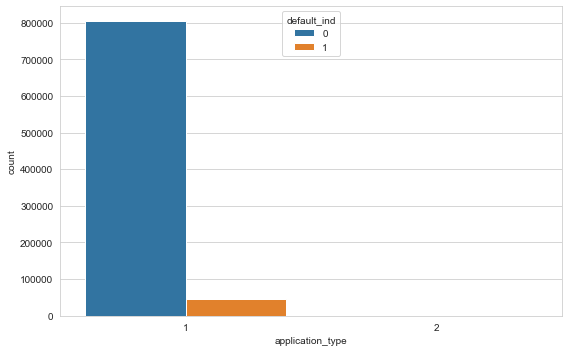

In [246]:
plt.figure(figsize=(8,5))
sns.countplot(x='application_type',hue='default_ind',data=data_cat)
plt.tight_layout()

In [247]:
#zip_code
data_cat['zip_code'].describe()  # does not add value so it can be dropped, 931 unique value exists which cant be treated

count     850051
unique       931
top        945xx
freq        9402
Name: zip_code, dtype: object

In [248]:
#pymnt_plan
data_cat['pymnt_plan'].describe()   #doesnot convey much can be dropped

count     850051
unique         2
top            n
freq      850046
Name: pymnt_plan, dtype: object

In [249]:
#title
data_cat['title'].describe()   #to be dropped as a lot of categories exists ie 60840 unique values

count                 850051
unique                 60840
top       Debt consolidation
freq                  394838
Name: title, dtype: object

In [250]:
#addr_state
data_cat['addr_state'].describe() # has to dummyfied

count     850051
unique        51
top           CA
freq      124333
Name: addr_state, dtype: object

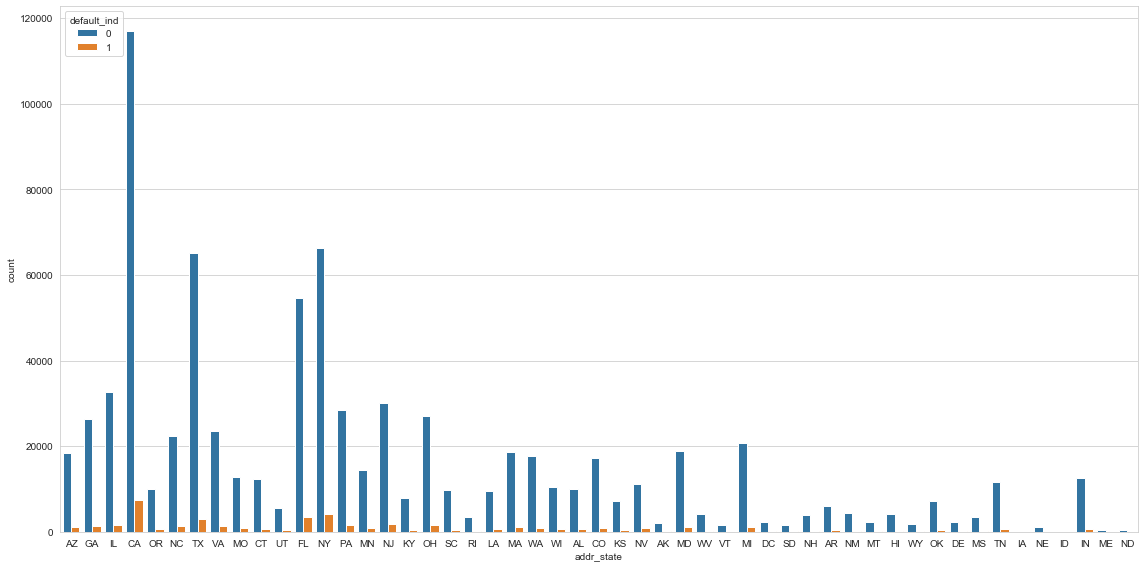

In [251]:
plt.figure(figsize=(16,8))
sns.countplot(x='addr_state',hue='default_ind',data=data_cat)
plt.tight_layout()

In [252]:
#earliest_cr_line
data_cat['earliest_cr_line'].describe() #Categorical data

count       850051
unique         697
top       Aug-2001
freq          6383
Name: earliest_cr_line, dtype: object

In [253]:
#initial_list_status
data_cat['initial_list_status'].value_counts()

f    439101
w    410950
Name: initial_list_status, dtype: int64

In [254]:
list_status_map={'f':1, 'w':2}
data_cat['initial_list_status']=data_cat['initial_list_status'].map(list_status_map)

C:\Users\ezkiska\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [255]:
data['initial_list_status']=data['initial_list_status'].map(list_status_map)
data_cat['initial_list_status'].value_counts()

1    439101
2    410950
Name: initial_list_status, dtype: int64

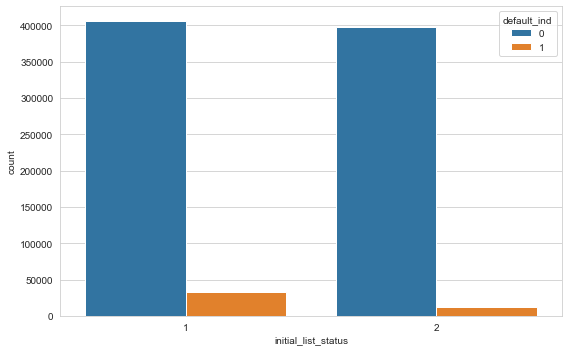

In [256]:
plt.figure(figsize=(8,5))
sns.countplot(x='initial_list_status',hue='default_ind',data=data_cat)
plt.tight_layout()  

In [257]:
#last_pymnt_d
data_cat['last_pymnt_d'].describe()  # has to dummyfied a lot of categiries

count       850051
unique          97
top       Jan-2016
freq        472746
Name: last_pymnt_d, dtype: object

In [258]:
#next_pymnt_d 
data_cat['next_pymnt_d'].value_counts()

Feb-2016    751620
Jan-2016     98355
Mar-2016        76
Name: next_pymnt_d, dtype: int64

In [259]:
next_pymnt_status_map={'Feb-2016':1, 'Jan-2016':2, 'Mar-2016': 3}
data_cat['next_pymnt_d']=data_cat['next_pymnt_d'].map(next_pymnt_status_map)
data['next_pymnt_d']=data['next_pymnt_d'].map(next_pymnt_status_map)
data_cat['next_pymnt_d'].value_counts()

C:\Users\ezkiska\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    751620
2     98355
3        76
Name: next_pymnt_d, dtype: int64

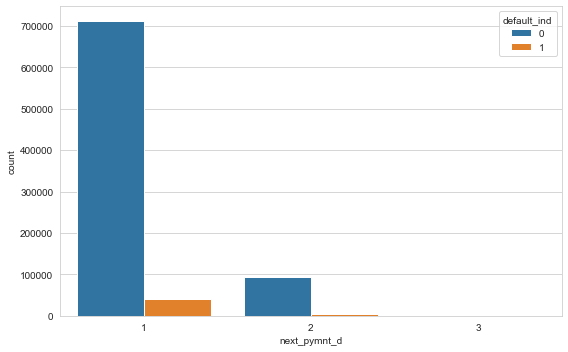

In [260]:
plt.figure(figsize=(8,5))
sns.countplot(x='next_pymnt_d',hue='default_ind',data=data_cat)
plt.tight_layout()  

In [261]:
#last_credit_pull_d 
data_cat['last_credit_pull_d'].value_counts() # categorical data- has to be dummyfied

Jan-2016    696997
Dec-2015     18822
Nov-2015     11307
Oct-2015     10207
Sep-2015      9900
Jul-2015      8524
Aug-2015      7857
Jun-2015      7023
Apr-2015      6079
May-2015      5839
Mar-2015      5692
Jan-2015      5176
Feb-2015      4949
Dec-2014      3651
Oct-2014      3319
Nov-2014      3129
Sep-2014      2911
Aug-2014      2775
Jul-2014      2736
May-2014      2266
Jun-2014      2208
Mar-2014      2183
Apr-2014      2152
Feb-2014      1901
Jan-2014      1767
Feb-2013      1398
Nov-2013      1388
Dec-2013      1378
Oct-2013      1252
Sep-2013      1042
             ...  
Dec-2009        46
Oct-2009        35
Nov-2009        29
Jan-2010        27
Aug-2009        19
Apr-2009        16
Jan-2009        16
Feb-2009        16
Aug-2007        15
Jun-2009        14
Jul-2009        13
Jun-2007        12
Sep-2009        11
May-2009        10
Mar-2009        10
Aug-2008         9
Oct-2008         9
Dec-2008         5
Sep-2008         5
Mar-2008         4
Jan-2008         3
Feb-2008    

In [262]:
data_cat['emp_title'].describe() # too many categories so it has to be dropped, 289475 unique values.

count      800889
unique     289475
top       Teacher
freq        12890
Name: emp_title, dtype: object

In [263]:
#emp_length
data_cat['emp_length'].value_counts()

10+ years    280035
2 years       75483
< 1 year      67159
3 years       66946
1 year        54465
5 years       53466
4 years       50332
7 years       42877
8 years       42111
6 years       41154
9 years       33213
Name: emp_length, dtype: int64

In [264]:
data_cat['emp_length'].isnull().sum()

42810

In [265]:
#mapping and null value treatement
emp_range= {'< 1 year':0.5, '1 year':1, '2 years': 2, '3 years':3,
            '4 years':4, '5 years':5,'6 years':6,'7 years':7,
            '8 years':8,'9 years':9, '10+ years':10}
data_cat['emp_length'] = data_cat["emp_length"].map(emp_range)
nullseries=pd.isnull(data_cat).sum()
nullseries[nullseries>0]
data_cat['emplen'] = data_cat['emp_length'].replace(np.nan, 10)
data_cat.drop(['emp_length'],axis=1,inplace=True)
data_cat['emplen'].value_counts() #category

C:\Users\ezkiska\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ezkiska\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ezkiska\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

10.0    322845
2.0      75483
0.5      67159
3.0      66946
1.0      54465
5.0      53466
4.0      50332
7.0      42877
8.0      42111
6.0      41154
9.0      33213
Name: emplen, dtype: int64

In [266]:
data['emplen']=data_cat['emplen']

In [267]:
#To reset all the indexes 
data.reset_index(drop=True, inplace=True)
data_cat.reset_index(drop=True, inplace=True)
data_num.reset_index(drop=True, inplace=True)

In [268]:
data_cat.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'title',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type', 'default_ind', 'emplen'],
      dtype='object')

In [269]:
data_ordinal=data_cat.loc[:,['term','sub_grade','purpose','application_type','addr_state', 
                             'last_pymnt_d', 'last_credit_pull_d']] 

In [270]:
data_ordinal.columns

Index(['term', 'sub_grade', 'purpose', 'application_type', 'addr_state',
       'last_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

In [271]:
print(data.shape,data_num.shape,data_cat.shape,data_ordinal.shape)

(850051, 54) (850051, 24) (850051, 20) (850051, 7)


In [272]:
data_numerical = data_cat.loc[:,['grade','home_ownership','verification_status','initial_list_status','next_pymnt_d','emplen',
                                'application_type']]

In [273]:
data_numerical.shape

(850051, 7)

In [274]:
data_num_all = pd.concat([data_num,data_numerical], axis = 1)

In [275]:
data_num_all.shape

(850051, 31)

In [276]:
data_num_all.drop(['default_ind'], axis =1, inplace = True)

In [277]:
data_num_all.columns # data_num_all is basically combination of al Pd.cut data performed on data set

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'installment', 'grade', 'home_ownership',
       'verification_status', 'initial_list_status', 'next_pymnt_d', 'emplen',
       'application_type'],
      dtype='object')

#### Now We will encode Categorical columns

In [278]:
from sklearn.preprocessing import LabelEncoder

In [279]:
LabelEncoder_categorical = data_cat.loc[:,['term','sub_grade','purpose','addr_state', 
                             'last_pymnt_d', 'last_credit_pull_d']]
dummyEncoder_categorical = data_cat.loc[:,['term','sub_grade','purpose','addr_state', 
                             'last_pymnt_d', 'last_credit_pull_d']]

In [280]:
categorical_feature_mask = LabelEncoder_categorical.dtypes==object
categorical_feature_mask

term                  True
sub_grade             True
purpose               True
addr_state            True
last_pymnt_d          True
last_credit_pull_d    True
dtype: bool

In [281]:
categorical_cols = LabelEncoder_categorical.columns[categorical_feature_mask].tolist()

In [282]:
le = LabelEncoder()
LabelEncoder_categorical[categorical_cols] = LabelEncoder_categorical[categorical_cols].apply(lambda col: le.fit_transform(col))
LabelEncoder_categorical.head()

term  sub_grade  purpose  addr_state  last_pymnt_d  last_credit_pull_d
0     0          6        1           3            39                  41
1     1         13        0          10             5                  99
2     0         14       11          14            55                  41
3     0         10        9           4            39                  40
4     1          9        9          37            40                  41

In [283]:
LabelEncoder_categorical.shape

(850051, 6)

In [284]:
dummyEncoder_categorical = pd.get_dummies(dummyEncoder_categorical, drop_first=True)
dummyEncoder_categorical.shape

(850051, 295)

In [285]:
data_num.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'default_ind', 'installment'],
      dtype='object')

In [286]:
data_numerical.columns

Index(['grade', 'home_ownership', 'verification_status', 'initial_list_status',
       'next_pymnt_d', 'emplen', 'application_type'],
      dtype='object')

In [287]:
scaled_all_numeric= data.loc[:,['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'installment', 'grade', 'home_ownership', 'verification_status', 'initial_list_status',
       'next_pymnt_d', 'emplen','application_type' ]]

#### We will Scale all the numerical data in dataset

In [288]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(scaled_all_numeric)
scaled_numeric_all = scaler.transform(scaled_all_numeric)
Numeric_Scaled = pd.DataFrame(scaled_numeric_all, columns=scaled_all_numeric.columns.tolist())

In [289]:
com1 = pd.concat([Numeric_Scaled,dummyEncoder_categorical], axis=1)

In [290]:
print(Numeric_Scaled.shape, dummyEncoder_categorical.shape, com1.shape)

(850051, 30) (850051, 295) (850051, 325)


##### We will split data into train & test based on issue_d column as per problem statement

In [291]:
com1[['issue_d','default_ind']]= data_cat[['issue_d','default_ind']]
#for splitting purpose'
com1['issue_d'] = pd.to_datetime(com1['issue_d'])
# Creating train and test data set According to problem statement given The data should be divided into train 
# June 2007 - May 2015 )'and out-of-time test ( June 2015 - Dec 2015 ) data.'

train1 = com1[com1['issue_d'] < '2015-6-01']
test1 = com1[com1['issue_d'] >= '2015-6-01']
print(train1.shape, test1.shape)

(594741, 327) (255310, 327)


In [292]:
train1 =train1.drop('issue_d' , axis=1)
test1 =test1.drop('issue_d', axis=1)
"""X = train1.iloc[:,0:-1]
y = train1['default_ind']"""

X_train1 = train1.iloc[:,0:-1]
y_train1 = train1['default_ind']
X_test_com1  = test1.iloc[:,0:-1]
y_test_com1  = test1['default_ind']

In [293]:
print(X_train1.shape, y_train1.shape, X_test_com1.shape, y_test_com1.shape)

(594741, 325) (594741,) (255310, 325) (255310,)


#### We will split the dataframe into Subtrain & validation so as to reduce training time for model 

In [294]:
from sklearn.model_selection import train_test_split 
X_train_com1, X_val1, y_train_com1, y_val1 = train_test_split(X_train1, y_train1, test_size = 0.3, random_state = 0)
print(X_train_com1.shape, y_train_com1.shape, X_val1.shape, y_val1.shape)

(416318, 325) (416318,) (178423, 325) (178423,)


### To treat data imbalance we will use SMOTE on train dataframe

In [295]:
from imblearn.over_sampling import SMOTE 
sm1 = SMOTE(random_state = 2) 
X_sm1, y_sm1 = sm1.fit_sample(X_train_com1, y_train_com1.ravel()) 

In [296]:
print('Before OverSampling, X: {}'.format(X_train_com1.shape)) 
print('Before OverSampling, y: {}'.format(y_train_com1.shape)) 
print("Before OverSampling, counts of '1': {}".format(sum(y_train_com1 == 1))) 
print("Before OverSampling, counts of '0': {}".format(sum(y_train_com1 == 0))) 
print('\n')
print('With imbalance treatment:'.upper())
print('After OverSampling, X: {}'.format(X_sm1.shape)) 
print('After OverSampling, y: {}'.format(y_sm1.shape)) 
print("After OverSampling, counts of '1': {}".format(sum(y_sm1 == 1))) 
print("After OverSampling, counts of '0': {}".format(sum(y_sm1 == 0))) 
print('\n')

Before OverSampling, X: (416318, 325)
Before OverSampling, y: (416318,)
Before OverSampling, counts of '1': 31616
Before OverSampling, counts of '0': 384702


WITH IMBALANCE TREATMENT:
After OverSampling, X: (769404, 325)
After OverSampling, y: (769404,)
After OverSampling, counts of '1': 384702
After OverSampling, counts of '0': 384702




#### because of highly unbalanced data lets apply SMOTE on test as well to verify

In [335]:
from imblearn.over_sampling import SMOTE 
smt = SMOTE(random_state = 2) 
X_smt1, y_smt1 = smt.fit_sample(X_test_com1, y_test_com1.ravel()) 

In [336]:
print('Before OverSampling, X: {}'.format(X_test_com1.shape)) 
print('Before OverSampling, y: {}'.format(y_test_com1.shape)) 
print("Before OverSampling, counts of '1': {}".format(sum(y_test_com1 == 1))) 
print("Before OverSampling, counts of '0': {}".format(sum(y_test_com1 == 0))) 
print('\n')
print('With imbalance treatment:'.upper())
print('After OverSampling, X: {}'.format(X_smt1.shape)) 
print('After OverSampling, y: {}'.format(y_smt1.shape)) 
print("After OverSampling, counts of '1': {}".format(sum(y_smt1 == 1))) 
print("After OverSampling, counts of '0': {}".format(sum(y_smt1 == 0))) 
print('\n')

Before OverSampling, X: (255310, 325)
Before OverSampling, y: (255310,)
Before OverSampling, counts of '1': 297
Before OverSampling, counts of '0': 255013


WITH IMBALANCE TREATMENT:
After OverSampling, X: (510026, 325)
After OverSampling, y: (510026,)
After OverSampling, counts of '1': 255013
After OverSampling, counts of '0': 255013




### For imbalance data treatement Lets use UnderSampler

In [351]:
from imblearn.under_sampling import (RandomUnderSampler)
un = RandomUnderSampler(random_state=2) 
X_sm3, y_sm3 = un.fit_sample(X_train_com1, y_train_com1.ravel()) 

In [353]:
print('Before Undersampling, X: {}'.format(X_train_com1.shape)) 
print('Before Undersampling, y: {}'.format(y_train_com1.shape)) 
print("Before Undersampling, counts of '1': {}".format(sum(y_train_com1 == 1))) 
print("Before Undersampling, counts of '0': {}".format(sum(y_train_com1 == 0))) 
print('\n')
print('With imbalance treatment:'.upper())
print('After Undersampling, X: {}'.format(X_sm3.shape)) 
print('After Undersampling, y: {}'.format(y_sm3.shape)) 
print("After Undersampling, counts of '1': {}".format(sum(y_sm3 == 1))) 
print("After Undersampling, counts of '0': {}".format(sum(y_sm3 == 0))) 
print('\n')

Before Undersampling, X: (416318, 325)
Before Undersampling, y: (416318,)
Before Undersampling, counts of '1': 31616
Before Undersampling, counts of '0': 384702


WITH IMBALANCE TREATMENT:
After Undersampling, X: (63232, 325)
After Undersampling, y: (63232,)
After Undersampling, counts of '1': 31616
After Undersampling, counts of '0': 31616




# MODEL FITTING

## LOGISTIC REGRESSION

### LOGISTIC REGRESSION - Without SMOTE

********************************************************************************
Logistic Regression:
Accuracy without SNOTE on validation set: 99.00%
Accuracy without SNOTE on test set: 99.96%
********************************************************************************
F1 score val:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    164668
           1       0.94      0.92      0.93     13755

    accuracy                           0.99    178423
   macro avg       0.97      0.96      0.96    178423
weighted avg       0.99      0.99      0.99    178423

********************************************************************************
F1 score test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    255013
           1       0.92      0.70      0.79       297

    accuracy                           1.00    255310
   macro avg       0.96      0.85      0.90    255310
weighted avg  

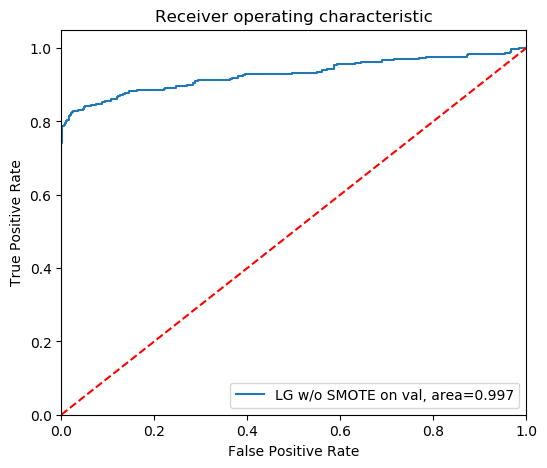

********************************************************************************


In [354]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report , f1_score, accuracy_score, roc_auc_score
from confusionMatrix import plotConfusionMatrix

lR = LogisticRegression(max_iter=200, C=0.5)
lR.fit(X_train_com1, y_train_com1)
acc_v=lR.score(X_val1, y_val1)
acc = lR.score(X_test_com1, y_test_com1)
predv= lR.predict(X_val1)
preds = lR.predict(X_test_com1)
pred_probav = lR.predict_proba(X_val1)[::,1]
pred_proba = lR.predict_proba(X_test_com1)[::,1]
print('*'*80)
print('Logistic Regression:')
print("Accuracy without SNOTE on validation set: %.2f%%" % (acc_v * 100.0))
print("Accuracy without SNOTE on test set: %.2f%%" % (acc * 100.0))
print('*'*80)
print('F1 score val:\n', classification_report(y_val1, predv)) 
#print('\n')
print('*'*80)
print('F1 score test:\n', classification_report(y_test_com1, preds)) 
print('*'*80)
fpr_G, tpr_G, _G = roc_curve(y_test_com1,  pred_proba)
aucv = roc_auc_score(y_val1, pred_probav)
plt.figure(figsize = (6,5))
plt.plot(fpr_G,tpr_G,label="LG w/o SMOTE on val, area="+str(np.round(aucv,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.style.use('default')
plt.show()
print('*'*80)

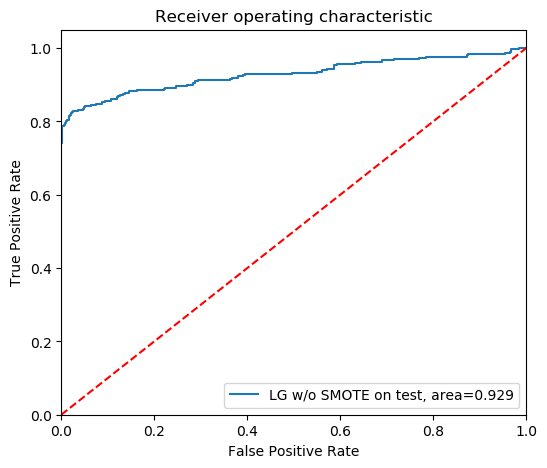

********************************************************************************


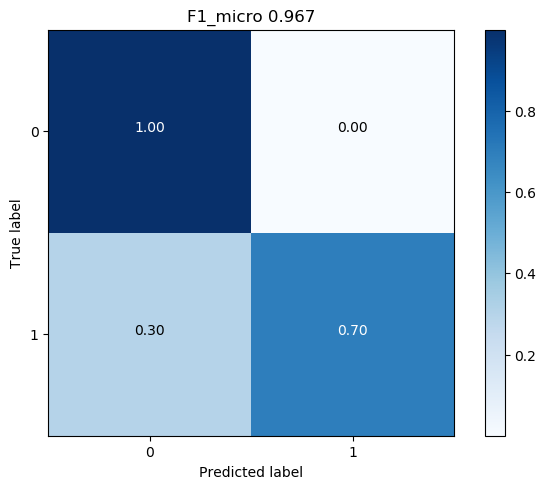

In [355]:
fpr_G, tpr_G, _G = roc_curve(y_test_com1,  pred_proba)
auc = roc_auc_score(y_test_com1, pred_proba)
plt.figure(figsize = (6,5))
plt.plot(fpr_G,tpr_G,label="LG w/o SMOTE on test, area="+str(np.round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.style.use('default')
plt.style.context('dark_background')
plt.show()

print('*'*80)
cnf_mat = confusion_matrix(y_test_com1,preds)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))

#### LOGISTIC REGRESSION - With SMOTE

********************************************************************************
Logistic Regression:
Accuracy with SMOTE: 99.95%
********************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255013
           1       0.87      0.69      0.77       297

    accuracy                           1.00    255310
   macro avg       0.94      0.84      0.88    255310
weighted avg       1.00      1.00      1.00    255310

********************************************************************************


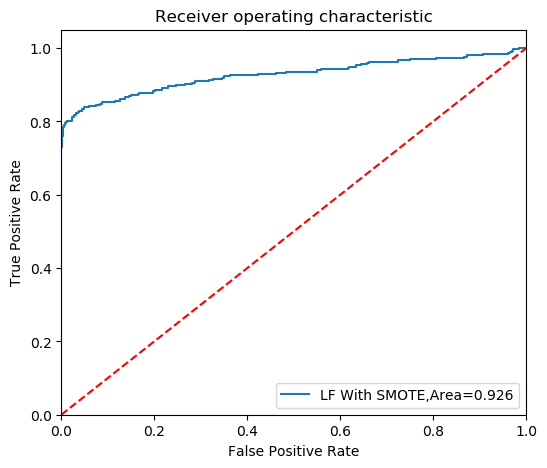

********************************************************************************
[[254983     30]
 [    93    204]]
********************************************************************************


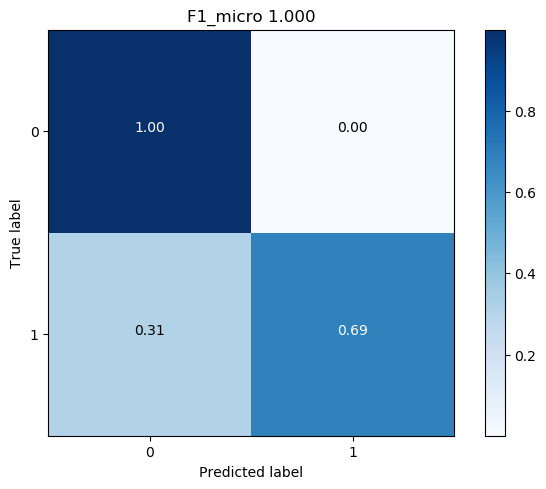

In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report , f1_score, accuracy_score, roc_auc_score
from confusionMatrix import plotConfusionMatrix
lR = LogisticRegression(max_iter=200, C=0.5)
lR.fit(X_sm1, y_sm1)
lR.score(X_sm1, y_sm1)
acc = lR.score(X_test_com1, y_test_com1)
preds = lR.predict(X_test_com1)
pred_proba = lR.predict_proba(X_test_com1)[::,1]
print('*'*80)
print('Logistic Regression:')
print("Accuracy with SMOTE: %.2f%%" % (acc * 100.0))
print('*'*80)

print(classification_report(y_test_com1, preds)) 
print('*'*80)
#y_pred_proba_G = model_G.predict_proba(X_val_res)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_test_com1,  pred_proba)
auc = roc_auc_score(y_test_com1, pred_proba)
plt.figure(figsize = (6,5))
plt.plot(fpr_G,tpr_G,label="LF With SMOTE,Area="+str(np.round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)

print(confusion_matrix(y_test_com1, preds))
cnf_mat = confusion_matrix(y_test_com1, preds)
f1= f1_score(y_test_com1,preds, average='micro')
plt.figure()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com1,preds)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))

### Logistic Regression with SMOTE on test as well

********************************************************************************
Logistic Regression:
Accuracy with SMOTE: 97.88%
********************************************************************************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    255013
           1       1.00      0.96      0.98    255013

    accuracy                           0.98    510026
   macro avg       0.98      0.98      0.98    510026
weighted avg       0.98      0.98      0.98    510026

********************************************************************************


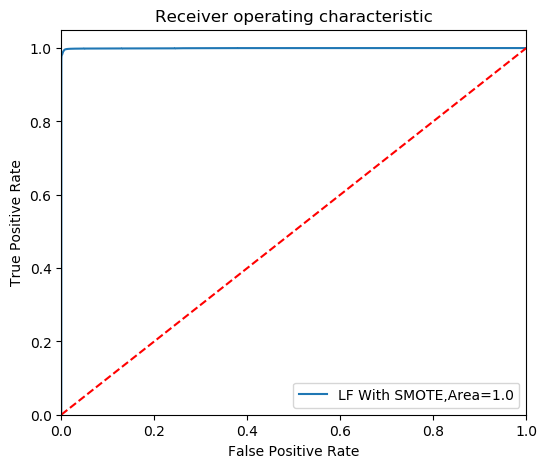

********************************************************************************
[[254983     30]
 [ 10768 244245]]
********************************************************************************


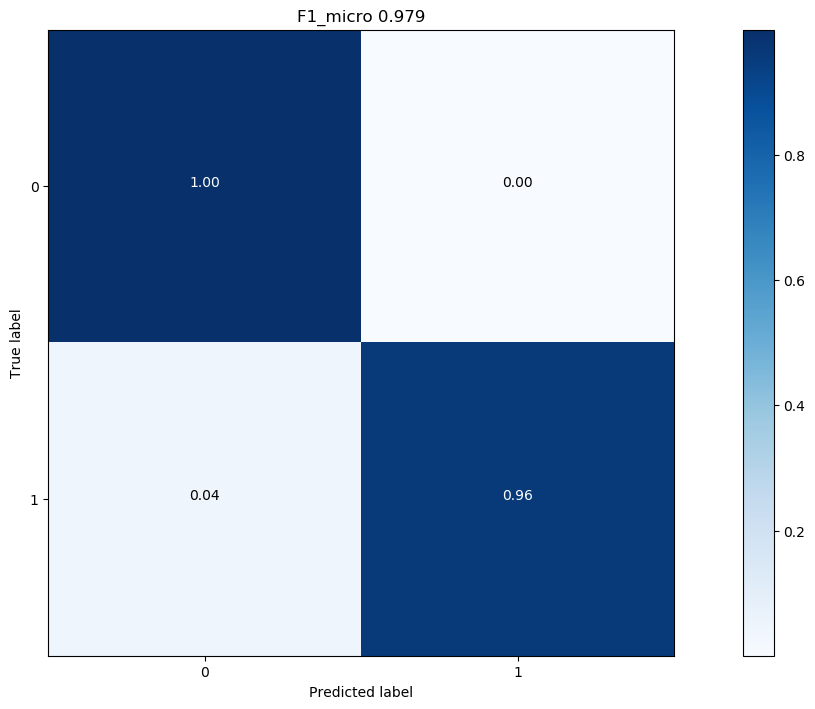

In [337]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report , f1_score, accuracy_score, roc_auc_score
from confusionMatrix import plotConfusionMatrix
lR = LogisticRegression(max_iter=200, C=0.5)
lR.fit(X_sm1, y_sm1)
lR.score(X_sm1, y_sm1)
acct = lR.score(X_smt1, y_smt1)
preds = lR.predict(X_smt1)
pred_proba = lR.predict_proba(X_smt1)[::,1]
print('*'*80)
print('Logistic Regression:')
print("Accuracy with SMOTE: %.2f%%" % (acct * 100.0))
print('*'*80)

print(classification_report(y_smt1, preds)) 
print('*'*80)
#y_pred_proba_G = model_G.predict_proba(X_val_res)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_smt1,  pred_proba)
auct = roc_auc_score(y_smt1, pred_proba)
plt.figure(figsize = (6,5))
plt.plot(fpr_G,tpr_G,label="LF With SMOTE,Area="+str(np.round(auct,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)

print(confusion_matrix(y_smt1, preds))
cnf_mat = confusion_matrix(y_smt1, preds)
f1= f1_score(y_smt1,preds, average='micro')
plt.figure()
print('*'*80)
cnf_mat = confusion_matrix(y_smt1,preds)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))

### Logistic regression with undersampling of majority

********************************************************************************
Logistic Regression:
Accuracy with UnderSampling: 99.78%
********************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255013
           1       0.32      0.79      0.45       297

    accuracy                           1.00    255310
   macro avg       0.66      0.89      0.73    255310
weighted avg       1.00      1.00      1.00    255310

********************************************************************************


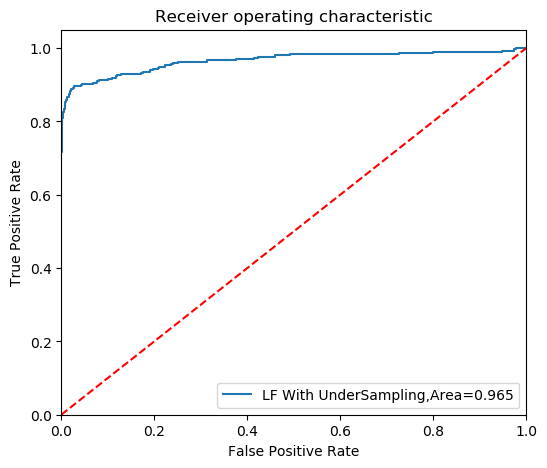

********************************************************************************
[[254507    506]
 [    62    235]]
********************************************************************************


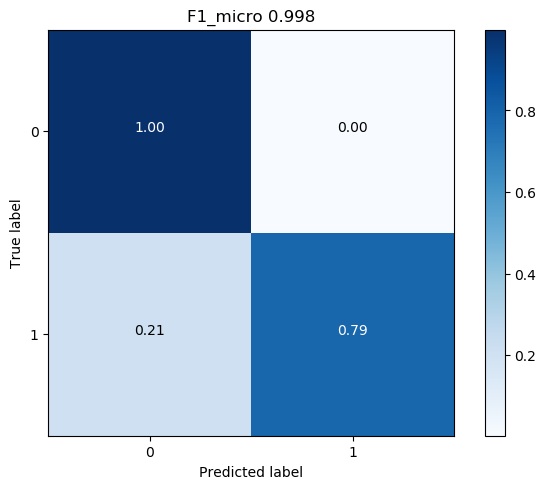

In [377]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report , f1_score, accuracy_score, roc_auc_score
from confusionMatrix import plotConfusionMatrix
lR = LogisticRegression(max_iter=200, C=0.5)
lR.fit(X_sm3, y_sm3)
lR.score(X_sm3, y_sm3)
acc = lR.score(X_test_com1, y_test_com1)
preds = lR.predict(X_test_com1)
pred_proba = lR.predict_proba(X_test_com1)[::,1]
print('*'*80)
print('Logistic Regression:')
print("Accuracy with UnderSampling: %.2f%%" % (acc * 100.0))
print('*'*80)

print(classification_report(y_test_com1, preds)) 
print('*'*80)
#y_pred_proba_G = model_G.predict_proba(X_val_res)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_test_com1,  pred_proba)
auc = roc_auc_score(y_test_com1, pred_proba)
plt.figure(figsize = (6,5))
plt.plot(fpr_G,tpr_G,label="LF With UnderSampling,Area="+str(np.round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)

print(confusion_matrix(y_test_com1, preds))
cnf_mat = confusion_matrix(y_test_com1, preds)
f1= f1_score(y_test_com1,preds, average='micro')
plt.figure()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com1,preds)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))

## Decision Tree

### Decision Tree - Without SMOTE

In [306]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , f1_score, accuracy_score, roc_auc_score, roc_curve
from confusionMatrix import plotConfusionMatrix
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_com1, y_train_com1.ravel()) 
accv = clf.score(X_val1, y_val1)
acc = clf.score(X_test_com1, y_test_com1)
predictions_v = clf.predict(X_val1)
predictions_ = clf.predict(X_test_com1) 
y_pred_probav = clf.predict_proba(X_val1)[::,1]
y_pred_proba = clf.predict_proba(X_test_com1)[::,1]
print('*'*80)
print('Decision Tree:')
print("Accuracy without SMOTE on val: %.2f%%" % (accv * 100.0))
print("Accuracy without SMOTE on test: %.2f%%" % (acc * 100.0))

print('*'*80)
print(confusion_matrix(y_val1, predictions_v))
# print classification report 
print('Without SMOTE on Val:'.upper())
print(classification_report(y_val1, predictions_v)) 
print('*'*80)
print(confusion_matrix(y_test_com1, predictions_))
# print classification report 
print('Without SMOTE on Test:'.upper())
print(classification_report(y_test_com1, predictions_)) 
print('*'*80)
#print('\n')

********************************************************************************
Decision Tree:
Accuracy without SMOTE on val: 99.73%
Accuracy without SMOTE on test: 99.08%
********************************************************************************
[[164436    232]
 [   257  13498]]
WITHOUT SMOTE ON VAL:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    164668
           1       0.98      0.98      0.98     13755

    accuracy                           1.00    178423
   macro avg       0.99      0.99      0.99    178423
weighted avg       1.00      1.00      1.00    178423

********************************************************************************
[[252673   2340]
 [    11    286]]
WITHOUT SMOTE ON TEST:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    255013
           1       0.11      0.96      0.20       297

    accuracy                           0.99    255310
   ma

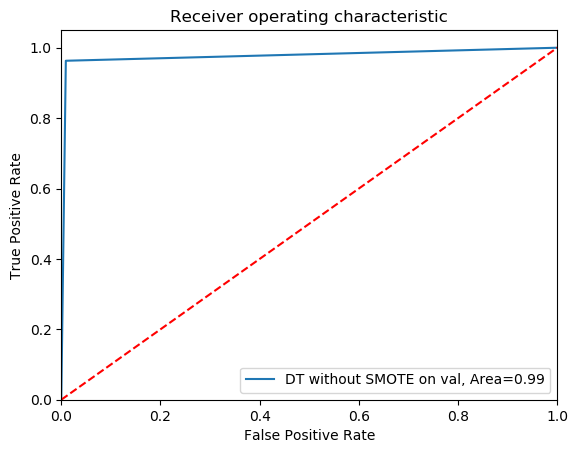

********************************************************************************


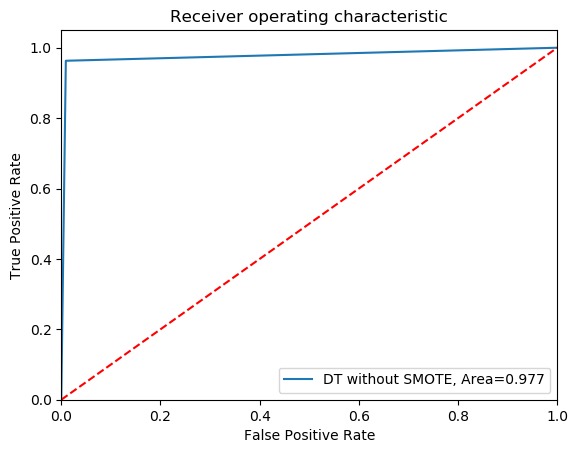

********************************************************************************
********************************************************************************


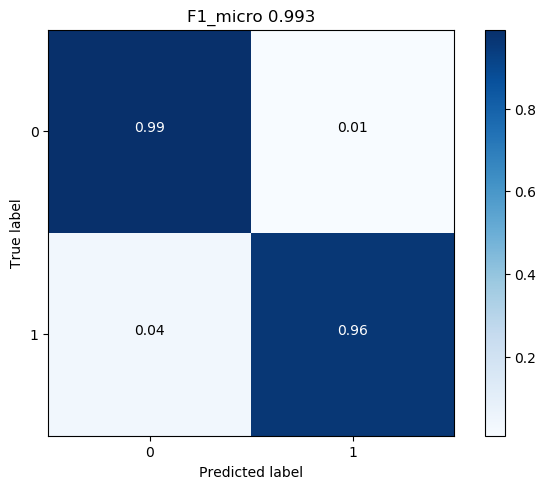

In [308]:
## ROC curve
y_pred_probav = clf.predict_proba(X_val1)[::,1]
fpr, tpr, _ = roc_curve(y_test_com1,  y_pred_probav)
aucv = roc_auc_score(y_val1, y_pred_probav)
plt.plot(fpr,tpr,label="DT without SMOTE on val, Area="+str(np.round(aucv,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)

## ROC curve
y_pred_proba = clf.predict_proba(X_test_com1)[::,1]
fpr, tpr, _ = roc_curve(y_test_com1,  y_pred_proba)
auc = roc_auc_score(y_test_com1, y_pred_proba)
plt.plot(fpr,tpr,label="DT without SMOTE, Area="+str(np.round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com1,predictions_)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

#### Decision Tree - With SMOTE

********************************************************************************
Decision Tree:
Accuracy with SMOTE: 99.30%
********************************************************************************
[[253242   1771]
 [    15    282]]
********************************************************************************
WITH SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    255013
           1       0.14      0.95      0.24       297

    accuracy                           0.99    255310
   macro avg       0.57      0.97      0.62    255310
weighted avg       1.00      0.99      1.00    255310

********************************************************************************


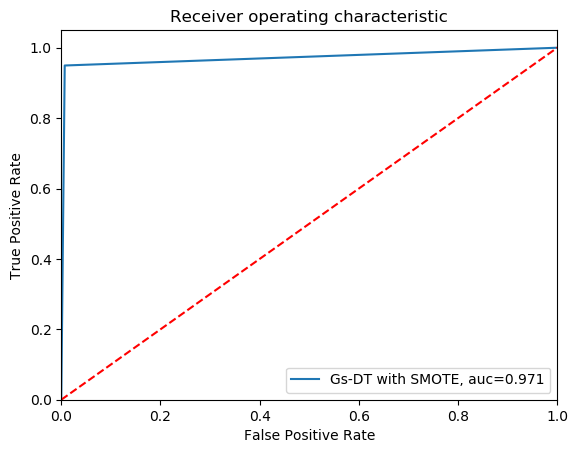

********************************************************************************
********************************************************************************


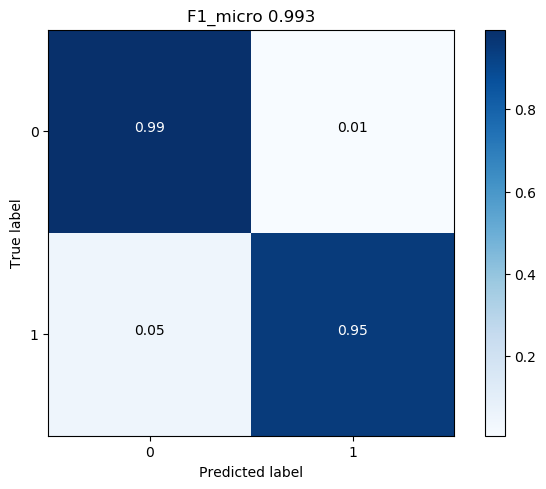

In [311]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , f1_score, accuracy_score, roc_auc_score, roc_curve
from confusionMatrix import plotConfusionMatrix
clfs = DecisionTreeClassifier(random_state=0)
clfs.fit(X_sm1, y_sm1.ravel()) 
acc = clfs.score(X_test_com1, y_test_com1)
predictions_ = clfs.predict(X_test_com1) 
y_pred_proba = clfs.predict_proba(X_test_com1)[::,1]
print('*'*80)
print('Decision Tree:')
print("Accuracy with SMOTE: %.2f%%" % (acc * 100.0))
print('*'*80)
print(confusion_matrix(y_test_com1, predictions_))
print('*'*80)
# print classification report 
print('With SMOTE:'.upper())
print(classification_report(y_test_com1, predictions_)) 
print('*'*80)
#print('\n')
## ROC curve
y_pred_proba = clfs.predict_proba(X_test_com1)[::,1]
fpr, tpr, _ = roc_curve(y_test_com1,  y_pred_proba)
auc = roc_auc_score(y_test_com1, y_pred_proba)
plt.plot(fpr,tpr,label="Gs-DT with SMOTE, auc="+str(np.round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com1,predictions_)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

#### Decision Tree With SMOTE on Test data

********************************************************************************
Decision Tree:
Accuracy with SMOTE: 99.04%
********************************************************************************
[[253242   1771]
 [  3141 251872]]
********************************************************************************
WITH SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    255013
           1       0.99      0.99      0.99    255013

    accuracy                           0.99    510026
   macro avg       0.99      0.99      0.99    510026
weighted avg       0.99      0.99      0.99    510026

********************************************************************************


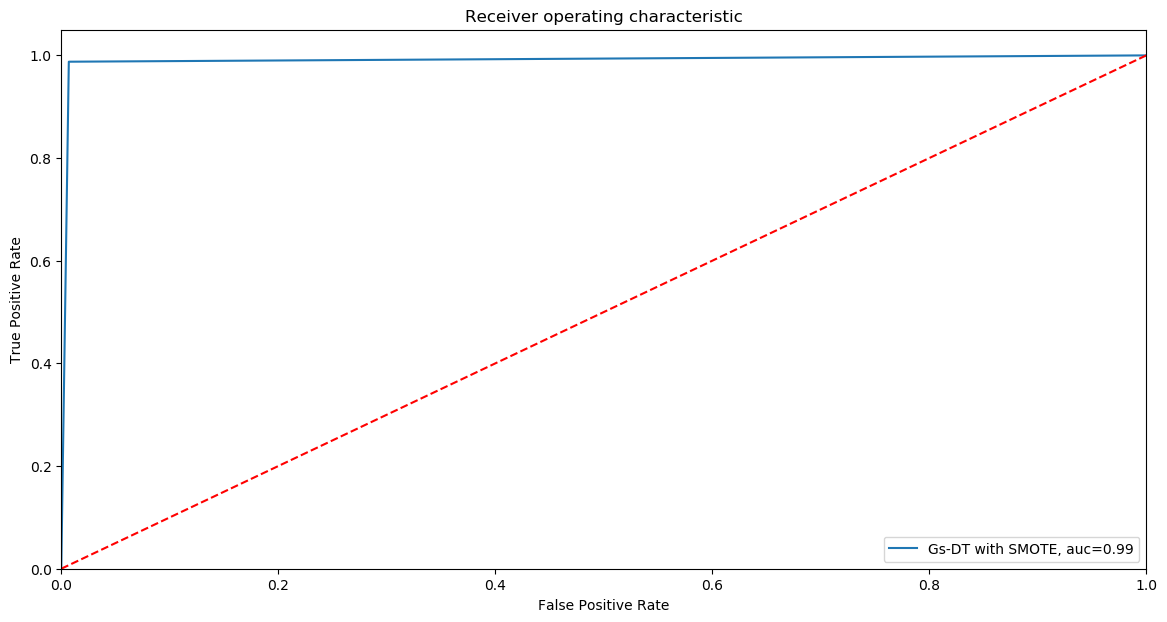

********************************************************************************
********************************************************************************


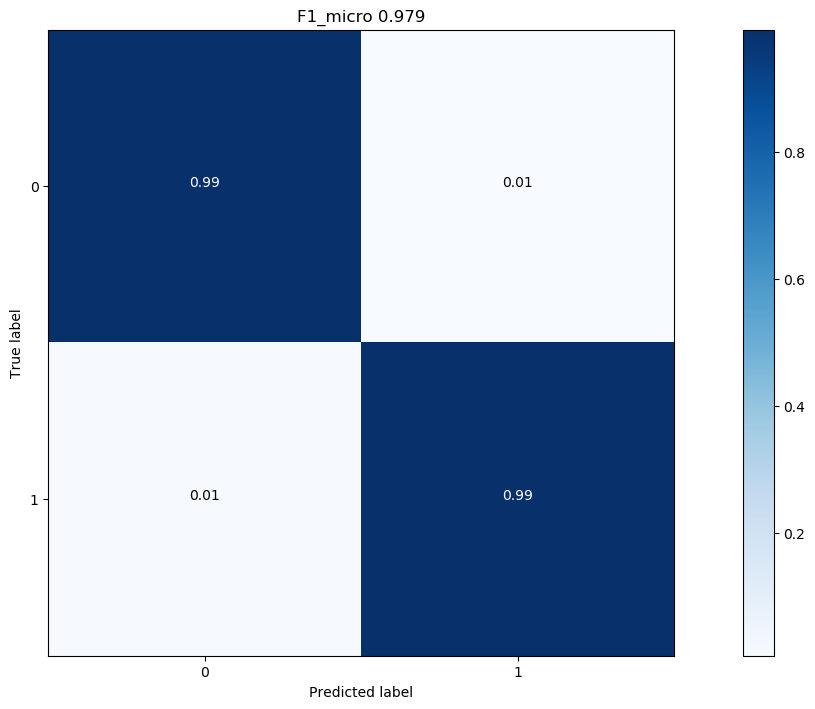

In [339]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , f1_score, accuracy_score, roc_auc_score, roc_curve
from confusionMatrix import plotConfusionMatrix
clfs = DecisionTreeClassifier(random_state=0)
clfs.fit(X_sm1, y_sm1.ravel()) 
acc = clfs.score(X_smt1, y_smt1)
predictions_ = clfs.predict(X_smt1) 
y_pred_proba = clfs.predict_proba(X_smt1)[::,1]
print('*'*80)
print('Decision Tree:')
print("Accuracy with SMOTE: %.2f%%" % (acc * 100.0))
print('*'*80)
print(confusion_matrix(y_smt1, predictions_))
print('*'*80)
# print classification report 
print('With SMOTE:'.upper())
print(classification_report(y_smt1, predictions_)) 
print('*'*80)
#print('\n')
## ROC curve
y_pred_proba = clfs.predict_proba(X_smt1)[::,1]
fpr, tpr, _ = roc_curve(y_smt1,  y_pred_proba)
auc = roc_auc_score(y_smt1, y_pred_proba)
plt.plot(fpr,tpr,label="Gs-DT with SMOTE, auc="+str(np.round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_smt1,predictions_)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

### Decision Tree with UnderSampling on Train

********************************************************************************
Decision Tree:
Accuracy with UnderSampling: 98.99%
********************************************************************************
[[252434   2579]
 [    10    287]]
********************************************************************************
WITH SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    255013
           1       0.10      0.97      0.18       297

    accuracy                           0.99    255310
   macro avg       0.55      0.98      0.59    255310
weighted avg       1.00      0.99      0.99    255310

********************************************************************************


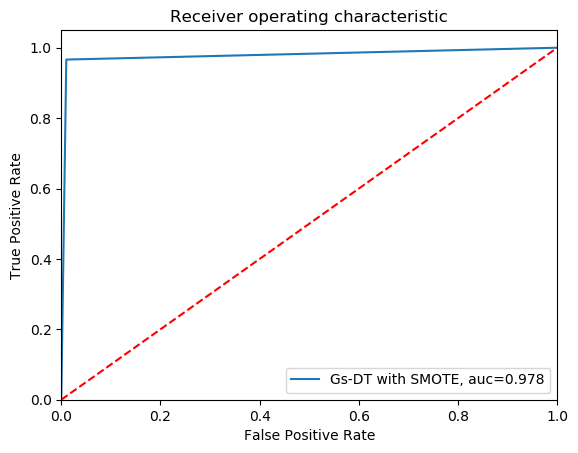

********************************************************************************
********************************************************************************


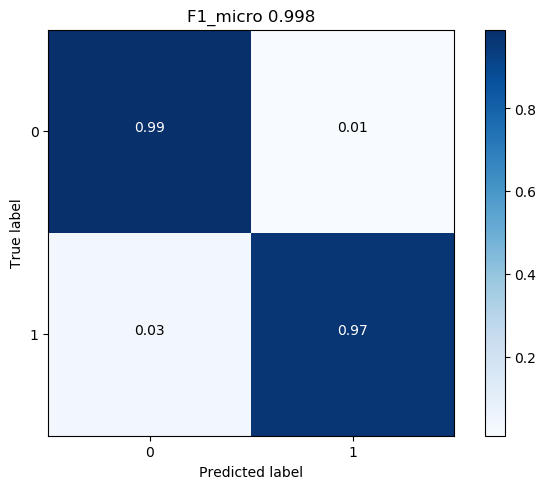

In [357]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , f1_score, accuracy_score, roc_auc_score, roc_curve
from confusionMatrix import plotConfusionMatrix
clfs = DecisionTreeClassifier(random_state=0)
clfs.fit(X_sm3, y_sm3.ravel()) 
acc = clfs.score(X_test_com1, y_test_com1)
predictions_ = clfs.predict(X_test_com1) 
y_pred_proba = clfs.predict_proba(X_test_com1)[::,1]
print('*'*80)
print('Decision Tree:')
print("Accuracy with UnderSampling: %.2f%%" % (acc * 100.0))
print('*'*80)
print(confusion_matrix(y_test_com1, predictions_))
print('*'*80)
# print classification report 
print('With SMOTE:'.upper())
print(classification_report(y_test_com1, predictions_)) 
print('*'*80)
#print('\n')
## ROC curve
y_pred_proba = clfs.predict_proba(X_test_com1)[::,1]
fpr, tpr, _ = roc_curve(y_test_com1,  y_pred_proba)
auc = roc_auc_score(y_test_com1, y_pred_proba)
plt.plot(fpr,tpr,label="Gs-DT with SMOTE, auc="+str(np.round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com1,predictions_)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

#### GRID SEARCH WITH SMOTE

GRID SEARCH WITH SMOTE -- DT:
Using best parameters: {'max_depth': 9}
Accuracy with SMOTE & Grid Search: 99.30%


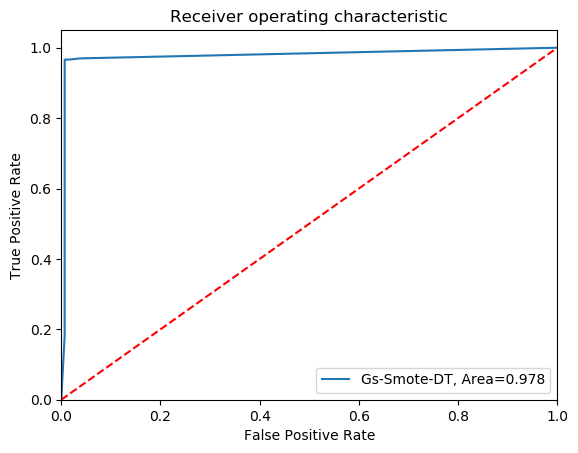

********************************************************************************


In [302]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics

parameters = {'max_depth': np.arange(3, 10)} # pruning
tree = GridSearchCV(clfs,parameters)
tree.fit(X_sm1,y_sm1)
preds = tree.predict(X_test_com1)
accu = tree.score(X_test_com1, y_test_com1)

print('GRID SEARCH WITH SMOTE -- DT:')
print('Using best parameters:',tree.best_params_)
print("Accuracy with SMOTE & Grid Search: %.2f%%" % (acc * 100.0))

y_pred_proba_ = tree.predict_proba(X_test_com1)[::,1]
fpr, tpr, _ = roc_curve(y_test_com1,  y_pred_proba_)
auc = roc_auc_score(y_test_com1, y_pred_proba_)
plt.plot(fpr,tpr,label="Gs-Smote-DT, Area="+str(np.round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)

### GRID SEARCH WITH SMOTE & CROSS VALIDATION

GRID SEARCH WITH SMOTE & CROSS VALIDATION -- DT:
Using best parameters: {'criterion': 'entropy', 'max_depth': 28}
Accuracy with SMOTE & Grid Search & CV: 99.31%
********************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    255013
           1       0.14      0.97      0.25       297

    accuracy                           0.99    255310
   macro avg       0.57      0.98      0.62    255310
weighted avg       1.00      0.99      1.00    255310

[[253261   1752]
 [    10    287]]
********************************************************************************


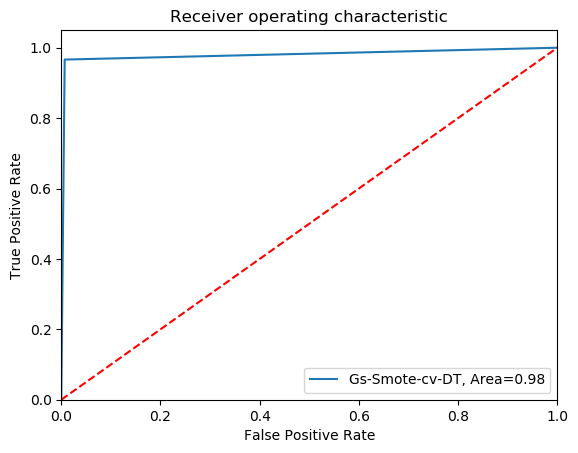

********************************************************************************
********************************************************************************


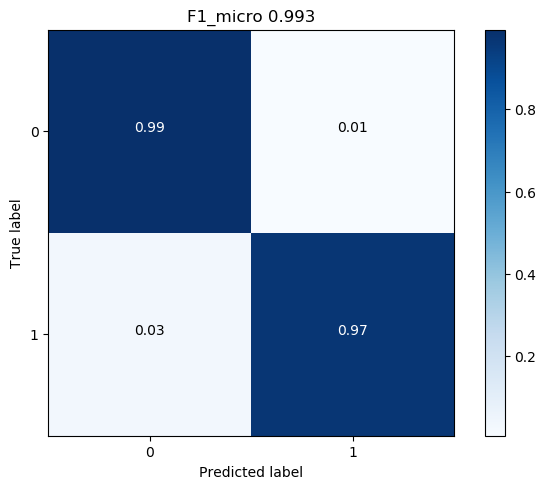

In [313]:
def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(15, 30)}
    # decision tree model
    dtree_model = DecisionTreeClassifier()
    #use gridsearch to val all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    #find score
    score = dtree_gscv.score(X, y)
    
    return dtree_gscv.best_params_, score, dtree_gscv

print('GRID SEARCH WITH SMOTE & CROSS VALIDATION -- DT:')
best_param, acc, model = dtree_grid_search(X_sm1,y_sm1, 4)
preds = model.predict(X_test_com1)
acc = model.score(X_test_com1, y_test_com1)
print('Using best parameters:',best_param)
print("Accuracy with SMOTE & Grid Search & CV: %.2f%%" % (acc * 100.0))
print('*'*80)
print(classification_report(y_test_com1, preds)) 
print(confusion_matrix(y_test_com1, preds))
print('*'*80)
## ROC curve
y_pred_proba = model.predict_proba(X_test_com1)[::,1]
fpr, tpr, _ = roc_curve(y_test_com1,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_com1, y_pred_proba)
plt.plot(fpr,tpr,label="Gs-Smote-cv-DT, Area="+str(np.round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)

cnf_mat = confusion_matrix(y_test_com1,preds)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

## RANDOM FOREST

### Random Forest without SMOTE

********************************************************************************
Random Forest:
Accuracy with Random forest without SMOTE on val: 99.53%
Accuracy with Random forest without SMOTE on test: 98.92%
********************************************************************************
Classification matrix on Val
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    164668
           1       1.00      0.94      0.97     13755

    accuracy                           1.00    178423
   macro avg       1.00      0.97      0.98    178423
weighted avg       1.00      1.00      1.00    178423

********************************************************************************
Classification matrix on Val
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    255013
           1       0.09      0.97      0.17       297

    accuracy                           0.99    255310
   macro avg       0.55 

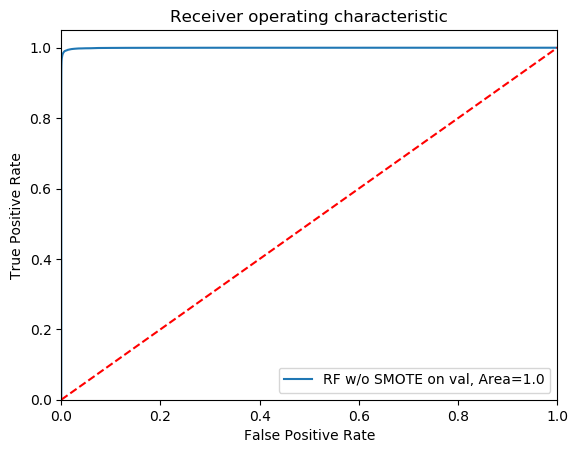

********************************************************************************


In [358]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train_com1, y_train_com1)
print('*'*80)
print('Random Forest:')
# Actual class predictions
probs = model.predict(X_test_com1)
probsv = model.predict(X_val1)
# Probabilities for each class
rf_probsv = model.predict_proba(X_val1)[:, 1]
rf_probs = model.predict_proba(X_test_com1)[:, 1]
acc_rfv = model.score(X_val1, y_val1)
acc_rf = model.score(X_test_com1, y_test_com1)
print("Accuracy with Random forest without SMOTE on val: %.2f%%" % (acc_rfv * 100.0))
print("Accuracy with Random forest without SMOTE on test: %.2f%%" % (acc_rf * 100.0))

print('*'*80)
print("Classification matrix on Val")
print(classification_report(y_val1, probsv)) 
print('*'*80)
print("Classification matrix on Val")
print(classification_report(y_test_com1, probs))
print('*'*80)
## ROC curve
fpr_rf, tpr_rf, _rf = roc_curve(y_val1,  rf_probsv)
auc_rfv = metrics.roc_auc_score(y_val1, rf_probsv)
plt.plot(fpr_rf,tpr_rf,label="RF w/o SMOTE on val, Area="+str(np.round(auc_rfv,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)

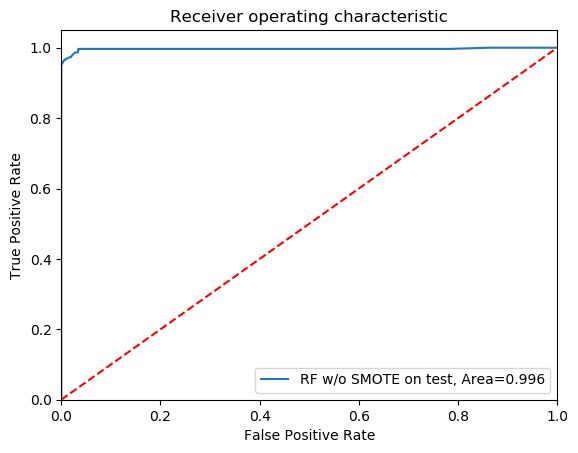

********************************************************************************
[[252257   2756]
 [     9    288]]
********************************************************************************
********************************************************************************


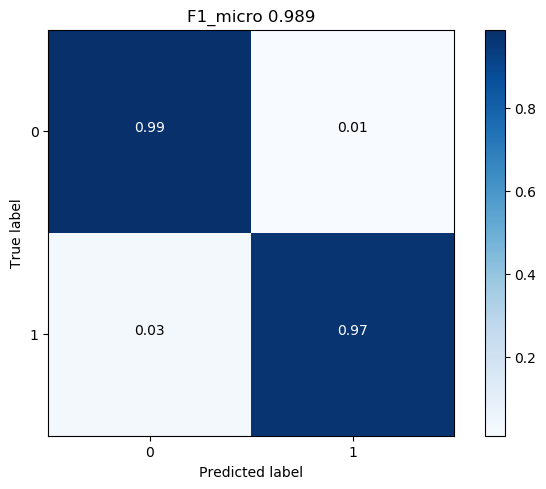

In [359]:
## ROC curve
fpr_rf, tpr_rf, _rf = roc_curve(y_test_com1,  rf_probs)
auc_rf = metrics.roc_auc_score(y_test_com1, rf_probs)
plt.plot(fpr_rf,tpr_rf,label="RF w/o SMOTE on test, Area="+str(np.round(auc_rf,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
print(confusion_matrix(y_test_com1, probs))
f1= f1_score(y_test_com1,probs, average='micro')
plt.figure()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com1,probs)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

In [317]:
import pandas as pd

# Extract feature importances
fin_without_SMOTE = pd.DataFrame({'feature': list(X_train_com1.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending= False)

# Display
fin_without_SMOTE.head(5)

feature  importance
16       recoveries    0.262319
17  last_pymnt_amnt    0.133930
13      total_pymnt    0.093959
12        out_prncp    0.070553
22      installment    0.032133

### Random Forest with SMOTE on train

********************************************************************************
Random Forest:
Accuracy with Random forest: 99.31%
********************************************************************************
[[254936     77]
 [    25    272]]
********************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255013
           1       0.78      0.92      0.84       297

    accuracy                           1.00    255310
   macro avg       0.89      0.96      0.92    255310
weighted avg       1.00      1.00      1.00    255310

********************************************************************************


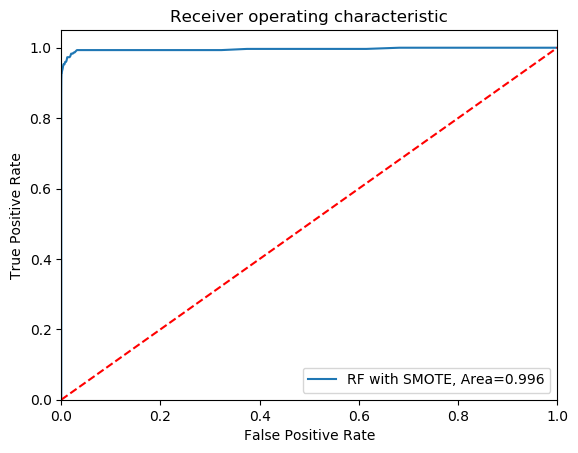

********************************************************************************
********************************************************************************


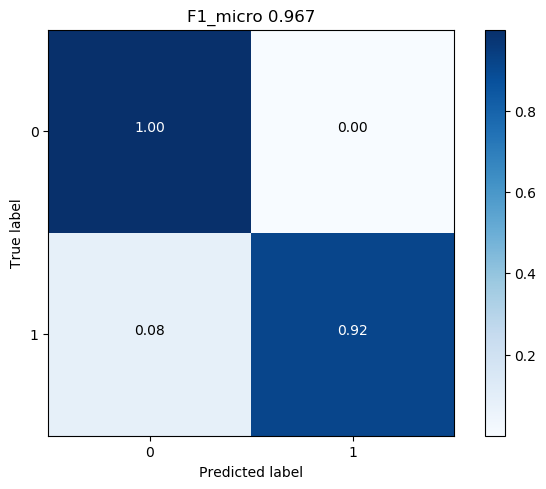

In [318]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_sm1, y_sm1)
print('*'*80)
print('Random Forest:')
# Actual class predictions
probs = model.predict(X_test_com1)
# Probabilities for each class
rf_probs = model.predict_proba(X_test_com1)[:, 1]
acc_rf = model.score(X_test_com1, y_test_com1)
print("Accuracy with Random forest: %.2f%%" % (acc * 100.0))
print('*'*80)
print(confusion_matrix(y_test_com1, probs))
print('*'*80)
print(classification_report(y_test_com1, probs)) 
print('*'*80)
## ROC curve
fpr_rf, tpr_rf, _rf = roc_curve(y_test_com1,  rf_probs)
auc_rf = metrics.roc_auc_score(y_test_com1, rf_probs)
plt.plot(fpr_rf,tpr_rf,label="RF with SMOTE, Area="+str(np.round(auc_rf,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com1,probs)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

### Random Forest with SMOTE on train & test

********************************************************************************
Random Forest:
Accuracy with Random forest: 99.04%
********************************************************************************
[[254979     34]
 [  1961 253052]]
********************************************************************************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    255013
           1       1.00      0.99      1.00    255013

    accuracy                           1.00    510026
   macro avg       1.00      1.00      1.00    510026
weighted avg       1.00      1.00      1.00    510026

********************************************************************************


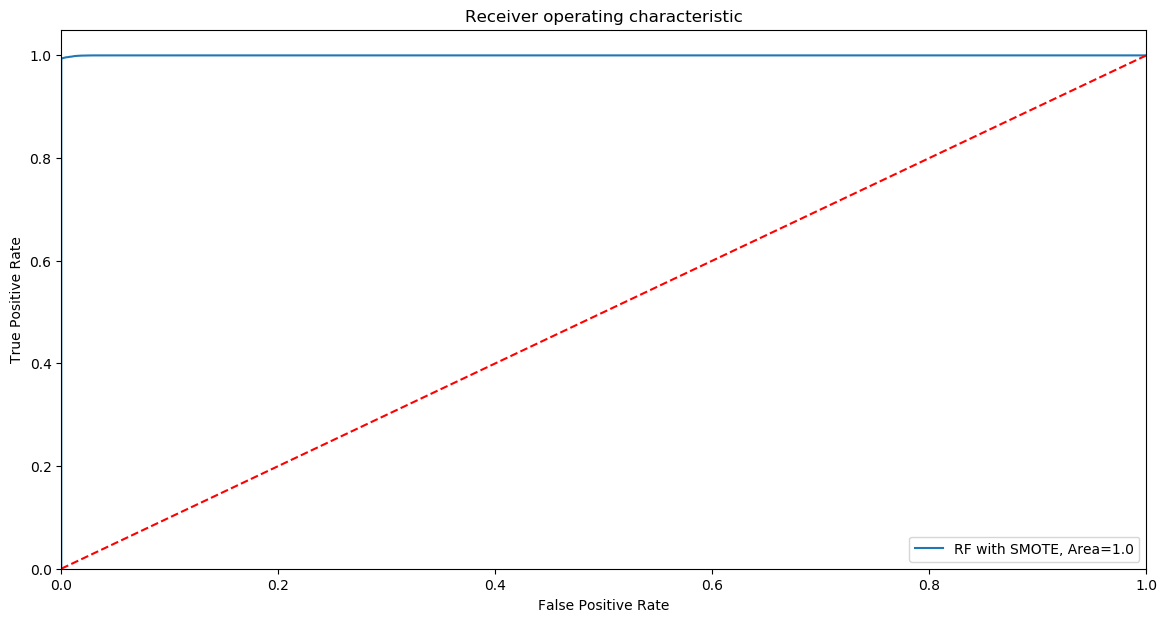

********************************************************************************
********************************************************************************


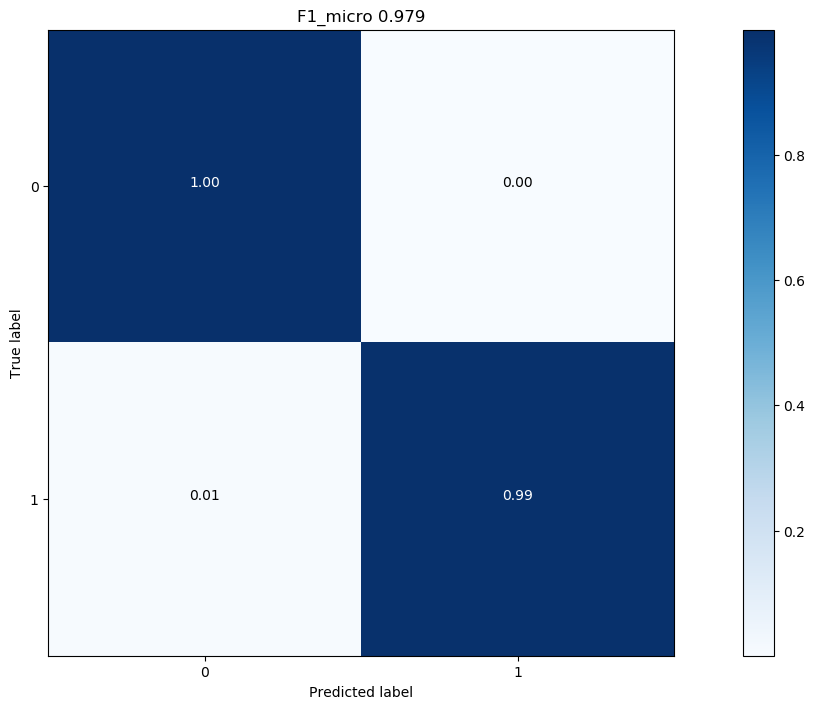

In [340]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_sm1, y_sm1)
print('*'*80)
print('Random Forest:')
# Actual class predictions
probs = model.predict(X_smt1)
# Probabilities for each class
rf_probs = model.predict_proba(X_smt1)[:, 1]
acc_rf = model.score(X_smt1, y_smt1)
print("Accuracy with Random forest: %.2f%%" % (acc * 100.0))
print('*'*80)
print(confusion_matrix(y_smt1, probs))
print('*'*80)
print(classification_report(y_smt1, probs)) 
print('*'*80)
## ROC curve
fpr_rf, tpr_rf, _rf = roc_curve(y_smt1,  rf_probs)
auc_rf = metrics.roc_auc_score(y_smt1, rf_probs)
plt.plot(fpr_rf,tpr_rf,label="RF with SMOTE, Area="+str(np.round(auc_rf,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_smt1,probs)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

### Random Forest with Undersampling of majority class

********************************************************************************
Random Forest:
Accuracy with Random forest and undersampling: 98.99%
********************************************************************************
[[254813    200]
 [    10    287]]
********************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255013
           1       0.59      0.97      0.73       297

    accuracy                           1.00    255310
   macro avg       0.79      0.98      0.87    255310
weighted avg       1.00      1.00      1.00    255310

********************************************************************************


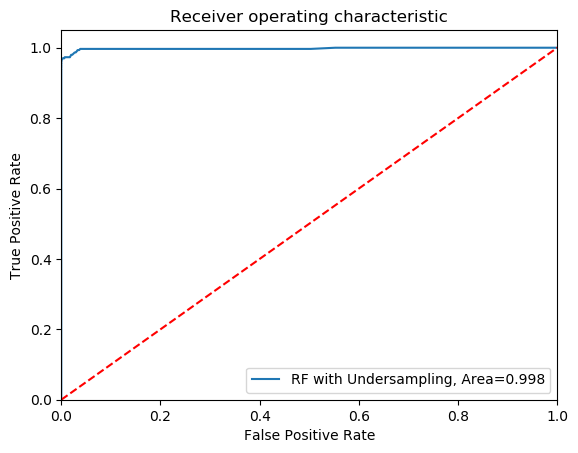

********************************************************************************
********************************************************************************


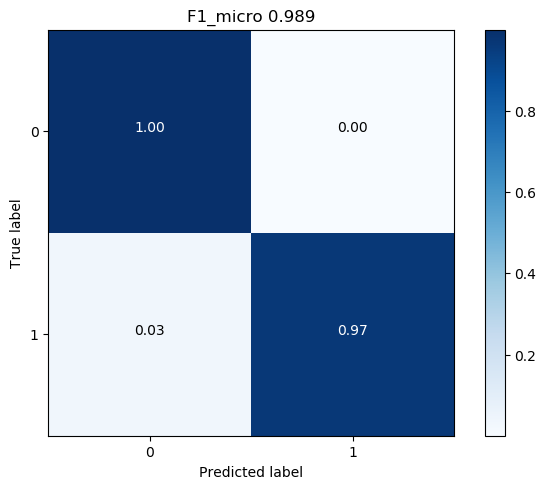

In [360]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_sm3, y_sm3)
print('*'*80)
print('Random Forest:')
# Actual class predictions
probs = model.predict(X_test_com1)
# Probabilities for each class
rf_probs = model.predict_proba(X_test_com1)[:, 1]
acc_rf = model.score(X_test_com1, y_test_com1)
print("Accuracy with Random forest and undersampling: %.2f%%" % (acc * 100.0))
print('*'*80)
print(confusion_matrix(y_test_com1, probs))
print('*'*80)
print(classification_report(y_test_com1, probs)) 
print('*'*80)
## ROC curve
fpr_rf, tpr_rf, _rf = roc_curve(y_test_com1,  rf_probs)
auc_rf = metrics.roc_auc_score(y_test_com1, rf_probs)
plt.plot(fpr_rf,tpr_rf,label="RF with Undersampling, Area="+str(np.round(auc_rf,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com1,probs)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

In [342]:
# Extract feature importances
finnimp_with_SMOTE = pd.DataFrame({'feature': list(X_sm1.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending= False)

# Display
finnimp_with_SMOTE.head(5)

feature  importance
12               out_prncp    0.159372
16              recoveries    0.136910
17         last_pymnt_amnt    0.133417
167  last_pymnt_d_Jan-2016    0.127967
13             total_pymnt    0.054666

## XG BOOST

### XG Boost Without SMOTE

In [363]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
model_G = XGBClassifier()
model_G.fit(X_train_com1, y_train_com1)
#learning_rate =0.01, n_estimators=5000, max_depth=4,min_child_weight=6, gamma=0, subsample=0.8,colsample_bytree=0.8,
#reg_alpha=0.005, objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [364]:
y_pred = model_G.predict(X_test_com1)
y_predv = model_G.predict(X_val1)
preds = [round(value) for value in y_pred]
accGv = model_G.score(X_val1,y_val1)
accG = model_G.score(X_test_com1,y_test_com1)

print('*'*80)
print('XG Bosst:')
print("Accuracy without SMOTE on VAl: %.2f%%" % (accGv * 100.0))
print("Accuracy without SMOTE on Test: %.2f%%" % (accG * 100.0))
print('*'*80)

print("Calssification report for validation")
print(classification_report(y_val1, y_predv))
print('*'*80)
print("Calssification report for test")
print(classification_report(y_test_com1, y_pred))
print('*'*80)

********************************************************************************
XG Bosst:
Accuracy without SMOTE on VAl: 99.58%
Accuracy without SMOTE on Test: 99.99%
********************************************************************************
Calssification report for validation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    164668
           1       1.00      0.95      0.97     13755

    accuracy                           1.00    178423
   macro avg       1.00      0.97      0.98    178423
weighted avg       1.00      1.00      1.00    178423

********************************************************************************
Calssification report for test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255013
           1       0.98      0.97      0.97       297

    accuracy                           1.00    255310
   macro avg       0.99      0.98      0.99    255310
wei

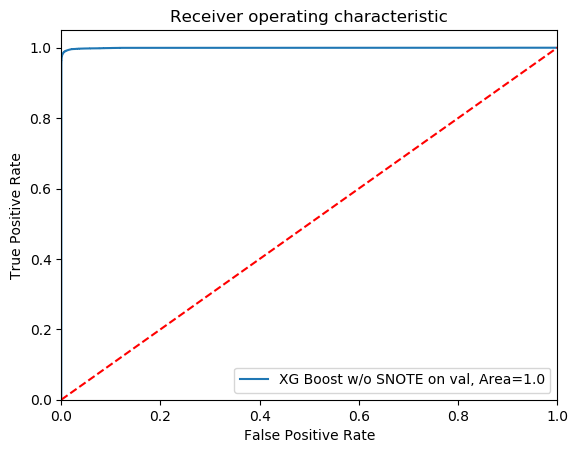

********************************************************************************


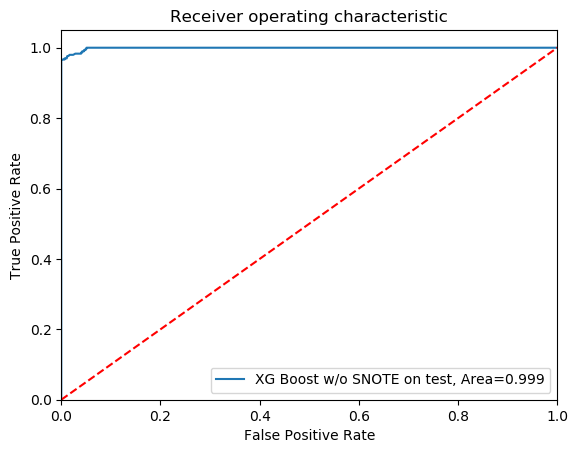

********************************************************************************
********************************************************************************


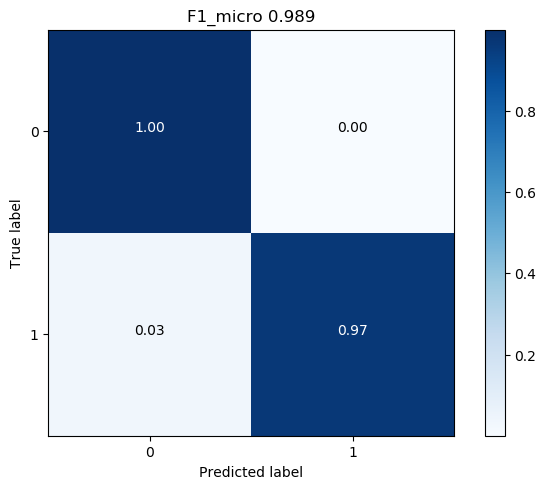

In [365]:
y_pred_proba_Gv = model_G.predict_proba(X_val1)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_val1,  y_pred_proba_Gv)
auc_Gv = metrics.roc_auc_score(y_val1, y_pred_proba_Gv)
plt.plot(fpr_G,tpr_G,label="XG Boost w/o SNOTE on val, Area="+str(np.round(auc_Gv,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
y_pred_proba_G = model_G.predict_proba(X_test_com1)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_test_com1,  y_pred_proba_G)
auc_G = metrics.roc_auc_score(y_test_com1, y_pred_proba_G)
plt.plot(fpr_G,tpr_G,label="XG Boost w/o SNOTE on test, Area="+str(np.round(auc_G,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com1,y_pred)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

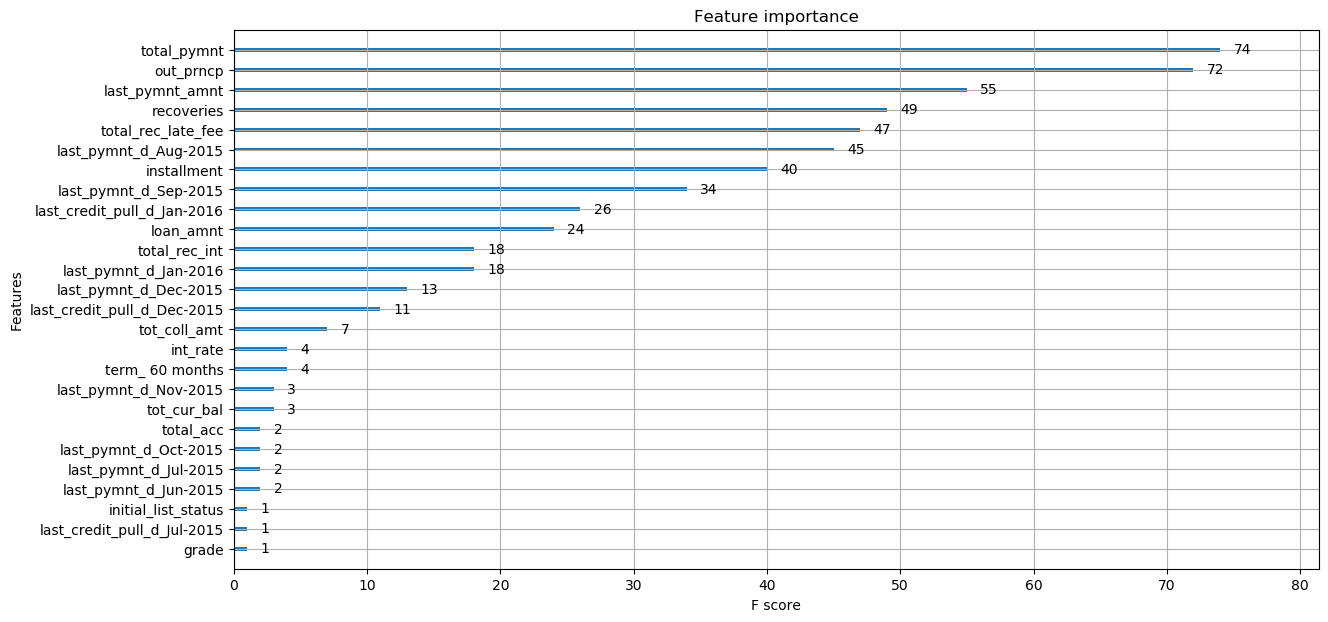

In [322]:
from xgboost import plot_importance
# plot feature importance
plt.rcParams["figure.figsize"] = (14, 7)
plot_importance(model_G)

### XG Boost With SMOTE on train

In [323]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
model_G = XGBClassifier()
model_G.fit(X_sm1, y_sm1)
#learning_rate =0.01, n_estimators=5000, max_depth=4,min_child_weight=6, gamma=0, subsample=0.8,colsample_bytree=0.8,
#reg_alpha=0.005, objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

********************************************************************************
XG Bosst:
Accuracy with SMOTE: 99.98%
********************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255013
           1       0.89      0.95      0.92       297

    accuracy                           1.00    255310
   macro avg       0.94      0.97      0.96    255310
weighted avg       1.00      1.00      1.00    255310

********************************************************************************
[[254978     35]
 [    15    282]]
********************************************************************************


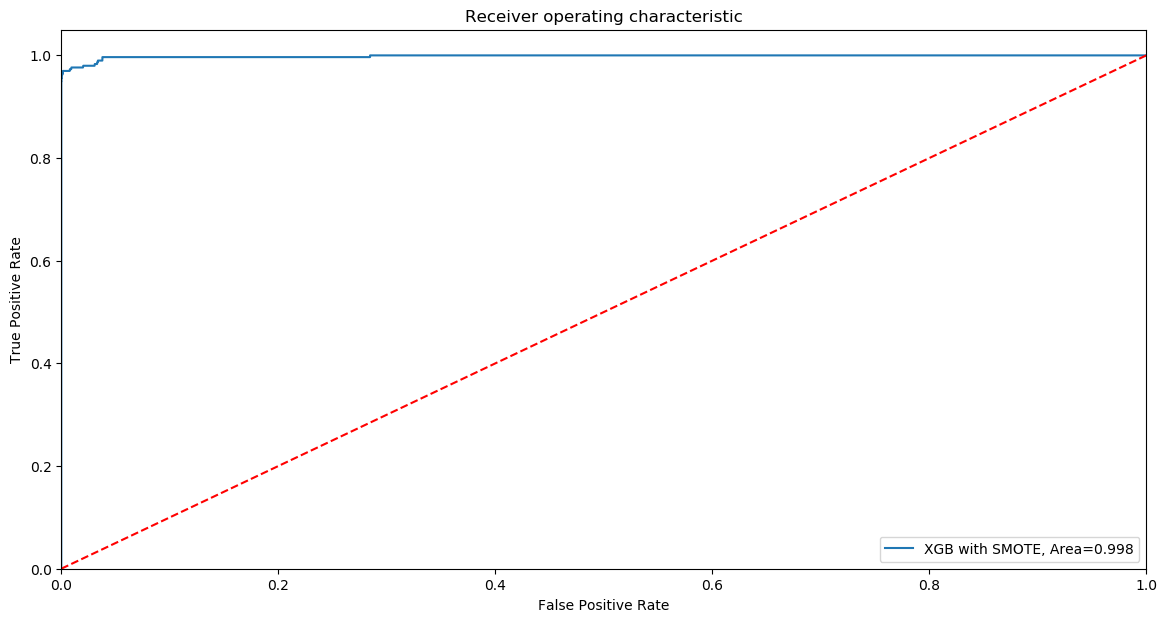

********************************************************************************
********************************************************************************


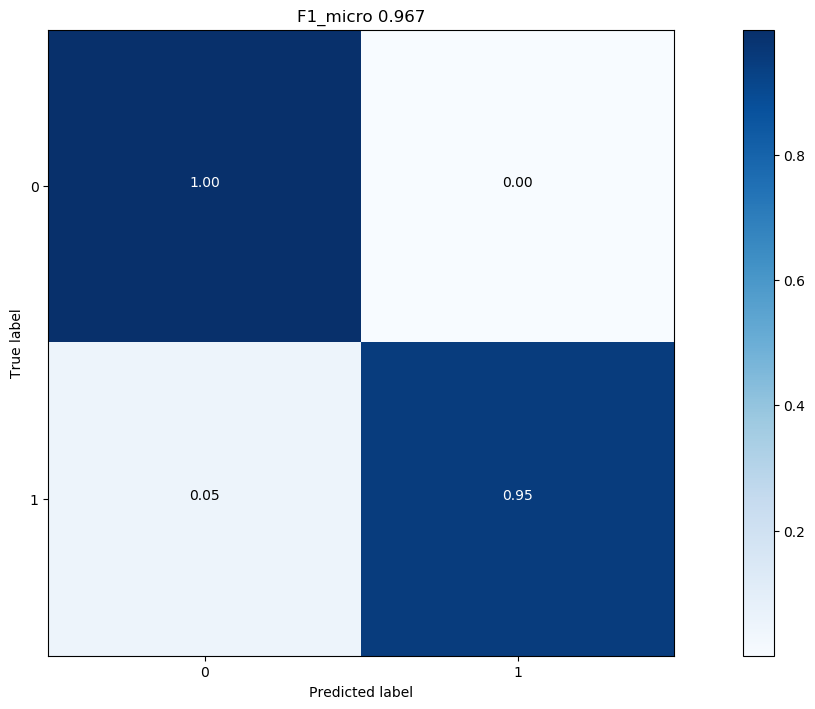

In [324]:

y_pred = model_G.predict(X_test_com1)
preds = [round(value) for value in y_pred]

accG = model_G.score(X_test_com1,y_test_com1)

print('*'*80)
print('XG Bosst:')
print("Accuracy with SMOTE: %.2f%%" % (accG * 100.0))
print('*'*80)
print(classification_report(y_test_com1, y_pred)) 
print('*'*80)
print(confusion_matrix(y_test_com1, y_pred))
print('*'*80)
y_pred_proba_G = model_G.predict_proba(X_test_com1)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_test_com1,  y_pred_proba_G)
auc_G = metrics.roc_auc_score(y_test_com1, y_pred_proba_G)
plt.plot(fpr_G,tpr_G,label="XGB with SMOTE, Area="+str(np.round(auc_G,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com1,y_pred)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

### XG Boost with SMOTE on test as well

********************************************************************************
XG Bosst:
Accuracy with SMOTE: 99.28%
********************************************************************************
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    255013
           1       1.00      0.99      0.99    255013

    accuracy                           0.99    510026
   macro avg       0.99      0.99      0.99    510026
weighted avg       0.99      0.99      0.99    510026

********************************************************************************
[[254978     35]
 [  3645 251368]]
********************************************************************************


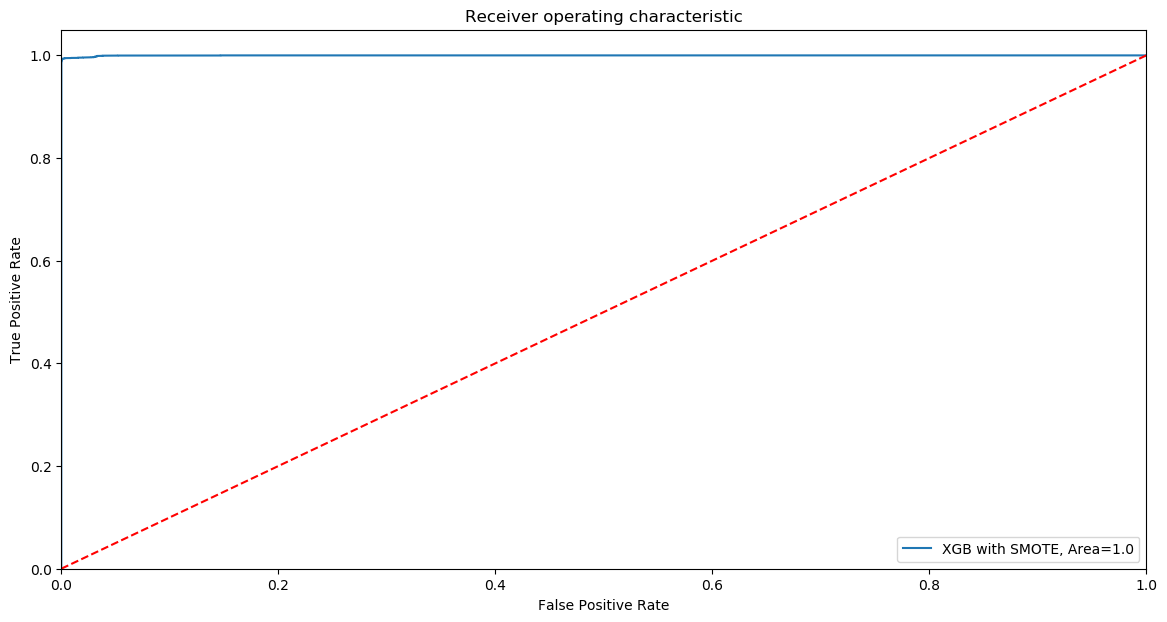

********************************************************************************
********************************************************************************


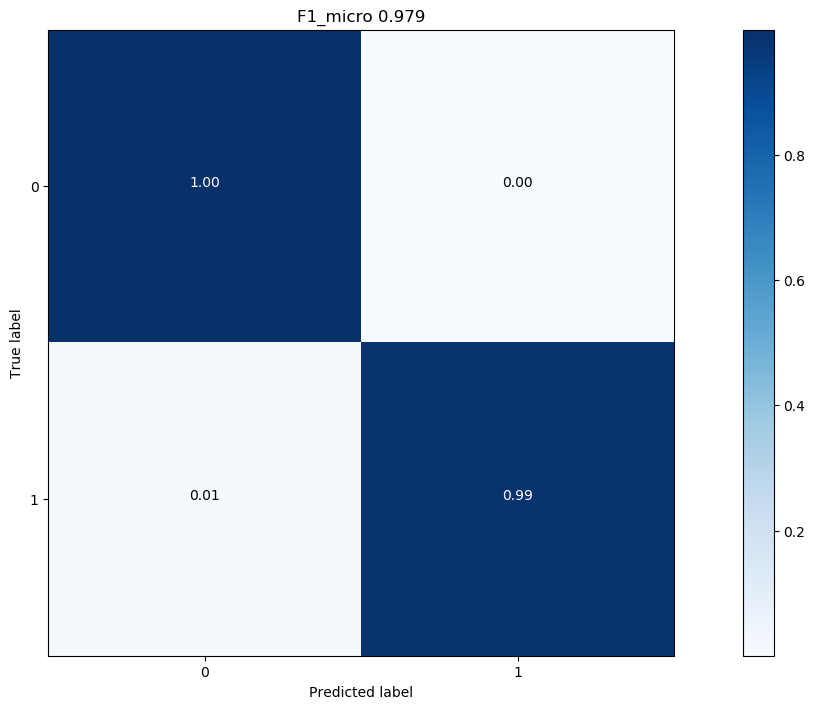

In [343]:

y_pred = model_G.predict(X_smt1)
preds = [round(value) for value in y_pred]

accG = model_G.score(X_smt1,y_smt1)

print('*'*80)
print('XG Bosst:')
print("Accuracy with SMOTE: %.2f%%" % (accG * 100.0))
print('*'*80)
print(classification_report(y_smt1, y_pred)) 
print('*'*80)
print(confusion_matrix(y_smt1, y_pred))
print('*'*80)
y_pred_proba_G = model_G.predict_proba(X_smt1)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_smt1,  y_pred_proba_G)
auc_G = metrics.roc_auc_score(y_smt1, y_pred_proba_G)
plt.plot(fpr_G,tpr_G,label="XGB with SMOTE, Area="+str(np.round(auc_G,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_smt1,y_pred)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

### XG Boost with UnderSampling on Train

********************************************************************************
XG Bosst:
Accuracy with UnderSampling: 99.97%
********************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255013
           1       0.82      0.97      0.88       297

    accuracy                           1.00    255310
   macro avg       0.91      0.98      0.94    255310
weighted avg       1.00      1.00      1.00    255310

********************************************************************************
[[254948     65]
 [    10    287]]
********************************************************************************


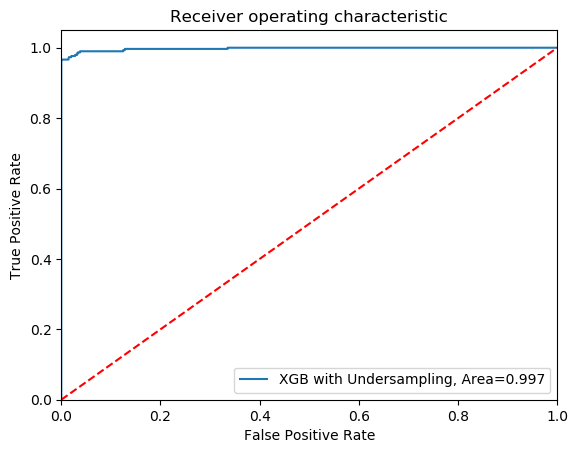

********************************************************************************
********************************************************************************


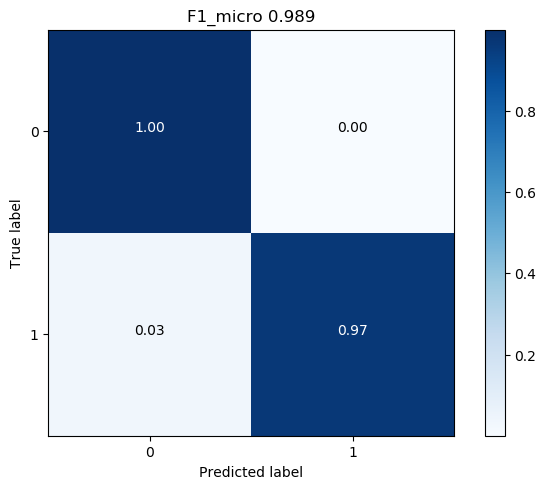

In [367]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#instantiate model and train
model_G = XGBClassifier()
model_G.fit(X_sm3, y_sm3)
#learning_rate =0.01, n_estimators=5000, max_depth=4,min_child_weight=6, gamma=0, subsample=0.8,colsample_bytree=0.8,
#reg_alpha=0.005, objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27


y_pred = model_G.predict(X_test_com1)
preds = [round(value) for value in y_pred]

accG = model_G.score(X_test_com1,y_test_com1)

print('*'*80)
print('XG Bosst:')
print("Accuracy with UnderSampling: %.2f%%" % (accG * 100.0))
print('*'*80)
print(classification_report(y_test_com1, y_pred)) 
print('*'*80)
print(confusion_matrix(y_test_com1, y_pred))
print('*'*80)
y_pred_proba_G = model_G.predict_proba(X_test_com1)[::,1]
fpr_G, tpr_G, _G = roc_curve(y_test_com1,  y_pred_proba_G)
auc_G = metrics.roc_auc_score(y_test_com1, y_pred_proba_G)
plt.plot(fpr_G,tpr_G,label="XGB with Undersampling, Area="+str(np.round(auc_G,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com1,y_pred)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

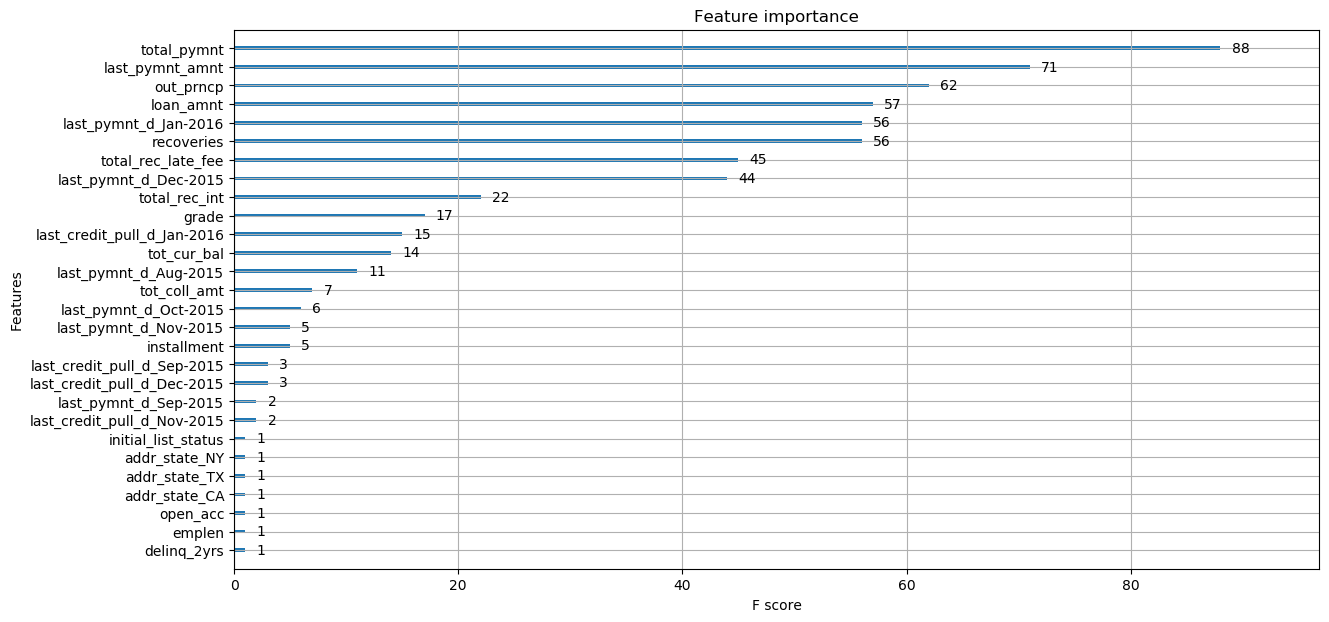

In [325]:
from xgboost import plot_importance
# plot feature importance
plt.rcParams["figure.figsize"] = (14, 7)
plot_importance(model_G)

## SVM

### SVM Without SMOTE

In [326]:
com1.shape

(850051, 327)

In [327]:
random_subset = com1.sample(n=85000)

In [328]:
#random_subset['issue_d'] = pd.to_datetime(random_subset['issue_d'])
tr1 = random_subset[random_subset['issue_d'] < '2015-6-01']
te1 = random_subset[random_subset['issue_d'] >= '2015-6-01']
print(tr1.shape, te1.shape)

(59608, 327) (25392, 327)


In [329]:
tr1 =tr1.drop('issue_d' , axis=1)
te1 =te1.drop('issue_d', axis=1)

X_train11 = tr1.iloc[:,0:-1]
y_train11 = tr1['default_ind']
X_test_com11  = te1.iloc[:,0:-1]
y_test_com11  = te1['default_ind']
print(X_train11.shape, y_train11.shape, X_test_com11.shape, y_test_com11.shape)

(59608, 325) (59608,) (25392, 325) (25392,)


In [330]:
from sklearn.model_selection import train_test_split 
X_train_com11, X_val11, y_train_com11, y_val11 = train_test_split(X_train11, y_train11, test_size = 0.4, random_state = 0)
print(X_train_com11.shape, y_train_com11.shape, X_val11.shape, y_val11.shape)

(35764, 325) (35764,) (23844, 325) (23844,)


#### To treat data Imbalance applying SMOTE on Train Data

In [331]:
from imblearn.over_sampling import SMOTE 
sm11 = SMOTE(random_state = 2) 
X_sm11, y_sm11 = sm11.fit_sample(X_train_com11, y_train_com11.ravel()) 

print('Before OverSampling, X: {}'.format(X_train_com11.shape)) 
print('Before OverSampling, y: {}'.format(y_train_com11.shape)) 
print("Before OverSampling, counts of '1': {}".format(sum(y_train_com11 == 1))) 
print("Before OverSampling, counts of '0': {}".format(sum(y_train_com11 == 0))) 
print('\n')
print('With imbalance treatment:'.upper())
print('After OverSampling, X: {}'.format(X_sm11.shape)) 
print('After OverSampling, y: {}'.format(y_sm11.shape)) 
print("After OverSampling, counts of '1': {}".format(sum(y_sm11 == 1))) 
print("After OverSampling, counts of '0': {}".format(sum(y_sm11 == 0))) 
print('\n')

Before OverSampling, X: (35764, 325)
Before OverSampling, y: (35764,)
Before OverSampling, counts of '1': 2777
Before OverSampling, counts of '0': 32987


WITH IMBALANCE TREATMENT:
After OverSampling, X: (65974, 325)
After OverSampling, y: (65974,)
After OverSampling, counts of '1': 32987
After OverSampling, counts of '0': 32987




#### Since test is highly unbalanced lets do SMOTE also on test 

In [345]:

from imblearn.over_sampling import SMOTE 
smt11 = SMOTE(random_state = 2) 
X_smt11, y_smt11 = smt11.fit_sample(X_test_com11, y_test_com11.ravel()) 

print('Before OverSampling, X: {}'.format(X_test_com11.shape)) 
print('Before OverSampling, y: {}'.format(y_test_com11.shape)) 
print("Before OverSampling, counts of '1': {}".format(sum(y_test_com11 == 1))) 
print("Before OverSampling, counts of '0': {}".format(sum(y_test_com11 == 0))) 
print('\n')
print('With imbalance treatment:'.upper())
print('After OverSampling, X: {}'.format(X_smt11.shape)) 
print('After OverSampling, y: {}'.format(y_smt11.shape)) 
print("After OverSampling, counts of '1': {}".format(sum(y_smt11 == 1))) 
print("After OverSampling, counts of '0': {}".format(sum(y_smt11 == 0))) 
print('\n')

Before OverSampling, X: (25392, 325)
Before OverSampling, y: (25392,)
Before OverSampling, counts of '1': 29
Before OverSampling, counts of '0': 25363


WITH IMBALANCE TREATMENT:
After OverSampling, X: (50726, 325)
After OverSampling, y: (50726,)
After OverSampling, counts of '1': 25363
After OverSampling, counts of '0': 25363




### Random UnderSampler to treat data Imbalance

In [368]:
from imblearn.under_sampling import (RandomUnderSampler)
un1 = RandomUnderSampler(random_state=2) 
X_sm12, y_sm12 = un1.fit_sample(X_train_com11, y_train_com11.ravel()) 

print('Before Undersampling, X: {}'.format(X_train_com11.shape)) 
print('Before Undersampling, y: {}'.format(y_train_com11.shape)) 
print("Before Undersampling, counts of '1': {}".format(sum(y_train_com11 == 1))) 
print("Before Undersampling, counts of '0': {}".format(sum(y_train_com11 == 0))) 
print('\n')
print('With imbalance treatment:'.upper())
print('After Undersampling, X: {}'.format(X_sm12.shape)) 
print('After Undersampling, y: {}'.format(y_sm12.shape)) 
print("After Undersampling, counts of '1': {}".format(sum(y_sm12 == 1))) 
print("After Undersampling, counts of '0': {}".format(sum(y_sm12 == 0))) 
print('\n')

Before Undersampling, X: (35764, 325)
Before Undersampling, y: (35764,)
Before Undersampling, counts of '1': 2777
Before Undersampling, counts of '0': 32987


WITH IMBALANCE TREATMENT:
After Undersampling, X: (5554, 325)
After Undersampling, y: (5554,)
After Undersampling, counts of '1': 2777
After Undersampling, counts of '0': 2777




### SVM without SMOTE

In [369]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC #Support vector classifier
from sklearn.metrics import roc_auc_score, roc_curve
from confusionMatrix import plotConfusionMatrix
svm = SVC() #SVC(kernel='linear') 

clf = svm.fit(X_train_com11, y_train_com11.ravel()) 
score1 = svm.score(X_val11, y_val11)
score2 = svm.score(X_test_com11, y_test_com11)
pred1 = svm.predict(X_val11) 
pred2 = svm.predict(X_test_com11)  
# print classification report 
print('Without SMOTE:'.upper())
print('Validation accuracy: ', score1)
print('test accuracy: ', score2)
print('*'*80)
print(confusion_matrix(y_test_com11, pred2))
print('*'*80)
print('F1 score val:\n', classification_report(y_val11, pred1)) 
print('*'*80)
print('F1 score test:\n', classification_report(y_test_com11, pred2)) 
print('*'*80)

WITHOUT SMOTE:
Validation accuracy:  0.9912766314376782
test accuracy:  0.9992123503465659
********************************************************************************
[[25353    10]
 [   10    19]]
********************************************************************************
F1 score val:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     22097
           1       0.97      0.90      0.94      1747

    accuracy                           0.99     23844
   macro avg       0.98      0.95      0.97     23844
weighted avg       0.99      0.99      0.99     23844

********************************************************************************
F1 score test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25363
           1       0.66      0.66      0.66        29

    accuracy                           1.00     25392
   macro avg       0.83      0.83      0.83     25392
weigh

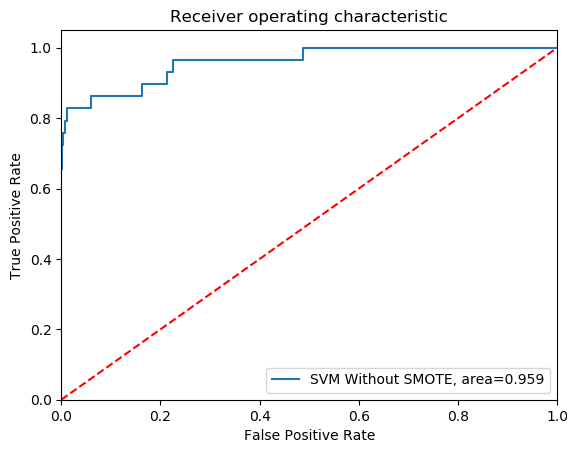

********************************************************************************
********************************************************************************


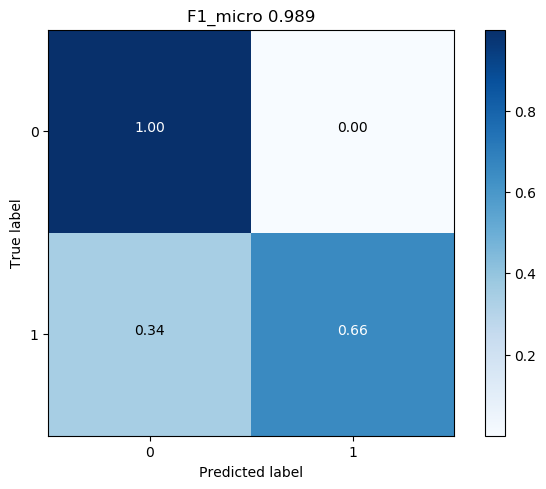

In [370]:
# ROC Curve
svm_p = SVC(probability = True) # for probability
clf_p = svm_p.fit(X_train_com11, y_train_com11.ravel()) # for probability
pred_proba = svm_p.predict_proba(X_test_com11)[::,1]
fpr, tpr, _ = roc_curve(y_test_com11,  pred_proba)
auc = roc_auc_score(y_test_com11, pred_proba)
plt.plot(fpr,tpr,label="SVM Without SMOTE, area="+str(np.round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com11,pred2)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

### SVM With SMOTE

In [371]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC #Support vector classifier
from sklearn.metrics import roc_auc_score, roc_curve
from confusionMatrix import plotConfusionMatrix
svm = SVC() #SVC(kernel='linear') 

clf = svm.fit(X_sm11, y_sm11.ravel()) 
score1 = svm.score(X_val11, y_val11)
score2 = svm.score(X_test_com11, y_test_com11)
pred1 = svm.predict(X_val11) 
pred2 = svm.predict(X_test_com11)  
# print classification report 
print('With SMOTE:'.upper())
print('Validation accuracy: ', score1)
print('test accuracy: ', score2)
print('*'*80)
print(confusion_matrix(y_test_com11, pred2))
print('*'*80)
print('F1 score val:\n', classification_report(y_val11, pred1)) 
print('*'*80)
#print('\n')
print('F1 score test:\n', classification_report(y_test_com11, pred2)) 

print('*'*80)

WITH SMOTE:
Validation accuracy:  0.9924928703237712
test accuracy:  0.9994880277252678
********************************************************************************
[[25358     5]
 [    8    21]]
********************************************************************************
F1 score val:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22097
           1       0.95      0.94      0.95      1747

    accuracy                           0.99     23844
   macro avg       0.97      0.97      0.97     23844
weighted avg       0.99      0.99      0.99     23844

********************************************************************************
F1 score test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25363
           1       0.81      0.72      0.76        29

    accuracy                           1.00     25392
   macro avg       0.90      0.86      0.88     25392
weighted

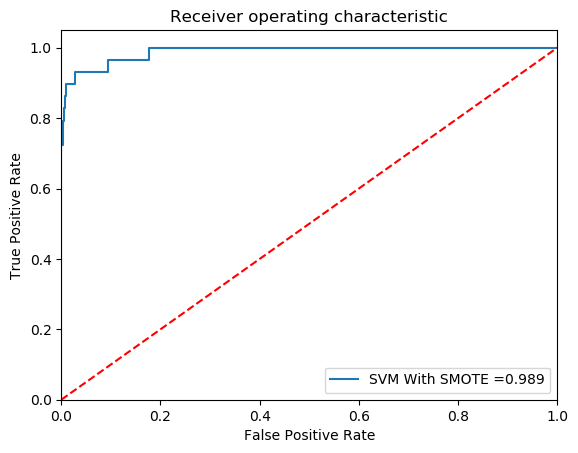

********************************************************************************
********************************************************************************


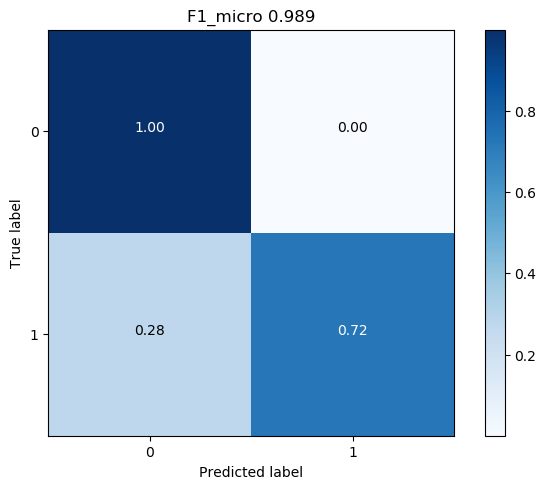

In [372]:
# ROC Curve
svm_p = SVC(probability = True) # for probability
clf_p = svm_p.fit(X_sm11, y_sm11.ravel()) # for probability
pred_proba = svm_p.predict_proba(X_test_com11)[::,1]
fpr, tpr, _ = roc_curve(y_test_com11,  pred_proba)
auc = roc_auc_score(y_test_com11, pred_proba)
plt.plot(fpr,tpr,label="SVM With SMOTE ="+str(np.round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com11,pred2)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

### SVM with SMOTE on Test

In [373]:

from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC #Support vector classifier
from sklearn.metrics import roc_auc_score, roc_curve
from confusionMatrix import plotConfusionMatrix
svm = SVC() #SVC(kernel='linear') 

clf = svm.fit(X_sm11, y_sm11.ravel()) 
score1 = svm.score(X_val11, y_val11)
score2 = svm.score(X_smt11, y_smt11)
pred1 = svm.predict(X_val11) 
pred2 = svm.predict(X_smt11)  
# print classification report 
print('With SMOTE:'.upper())
print('Validation accuracy: ', score1)
print('test accuracy: ', score2)
print('*'*80)
print(confusion_matrix(y_smt11, pred2))
print('*'*80)
print('F1 score val:\n', classification_report(y_val11, pred1)) 
print('*'*80)
#print('\n')
print('F1 score test:\n', classification_report(y_smt11, pred2)) 

print('*'*80)

WITH SMOTE:
Validation accuracy:  0.9924928703237712
test accuracy:  0.9649095138587707
********************************************************************************
[[25358     5]
 [ 1775 23588]]
********************************************************************************
F1 score val:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22097
           1       0.95      0.94      0.95      1747

    accuracy                           0.99     23844
   macro avg       0.97      0.97      0.97     23844
weighted avg       0.99      0.99      0.99     23844

********************************************************************************
F1 score test:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     25363
           1       1.00      0.93      0.96     25363

    accuracy                           0.96     50726
   macro avg       0.97      0.96      0.96     50726
weighted

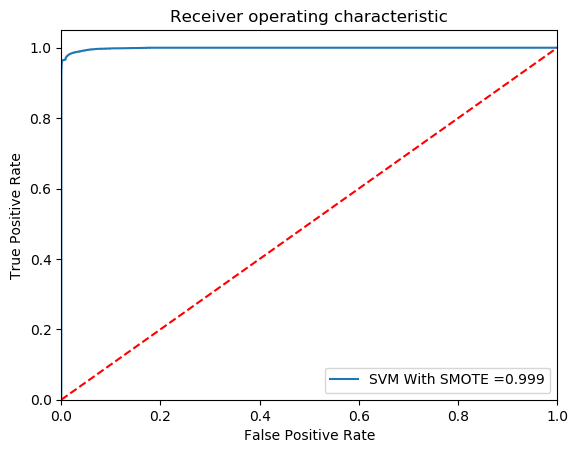

********************************************************************************
********************************************************************************


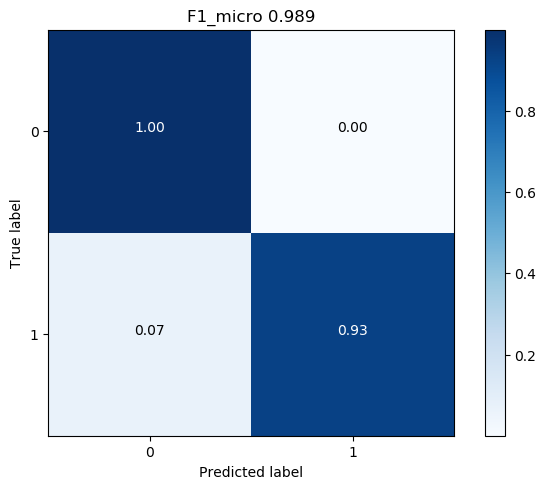

In [374]:
# ROC Curve
svm_p = SVC(probability = True) # for probability
clf_p = svm_p.fit(X_sm11, y_sm11.ravel()) # for probability
pred_proba = svm_p.predict_proba(X_smt11)[::,1]
fpr, tpr, _ = roc_curve(y_smt11,  pred_proba)
auc = roc_auc_score(y_smt11, pred_proba)
plt.plot(fpr,tpr,label="SVM With SMOTE ="+str(np.round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_smt11,pred2)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)

### SVM With UnderSampling on Train data

In [375]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC #Support vector classifier
from sklearn.metrics import roc_auc_score, roc_curve
from confusionMatrix import plotConfusionMatrix
svm = SVC() #SVC(kernel='linear') 

clf = svm.fit(X_sm12, y_sm12.ravel()) 
score1 = svm.score(X_val11, y_val11)
score2 = svm.score(X_test_com11, y_test_com11)
pred1 = svm.predict(X_val11) 
pred2 = svm.predict(X_test_com11)  
# print classification report 
print('With UnderSampling:'.upper())
print('Validation accuracy: ', score1)
print('test accuracy: ', score2)
print('*'*80)
print(confusion_matrix(y_test_com11, pred2))
print('*'*80)
print('F1 score val:\n', classification_report(y_val11, pred1)) 
print('*'*80)
#print('\n')
print('F1 score test:\n', classification_report(y_test_com11, pred2)) 

print('*'*80)

WITH UNDERSAMPLING:
Validation accuracy:  0.9747525582955879
test accuracy:  0.9936594202898551
********************************************************************************
[[25210   153]
 [    8    21]]
********************************************************************************
F1 score val:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     22097
           1       0.75      0.99      0.85      1747

    accuracy                           0.97     23844
   macro avg       0.87      0.98      0.92     23844
weighted avg       0.98      0.97      0.98     23844

********************************************************************************
F1 score test:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     25363
           1       0.12      0.72      0.21        29

    accuracy                           0.99     25392
   macro avg       0.56      0.86      0.60     25392


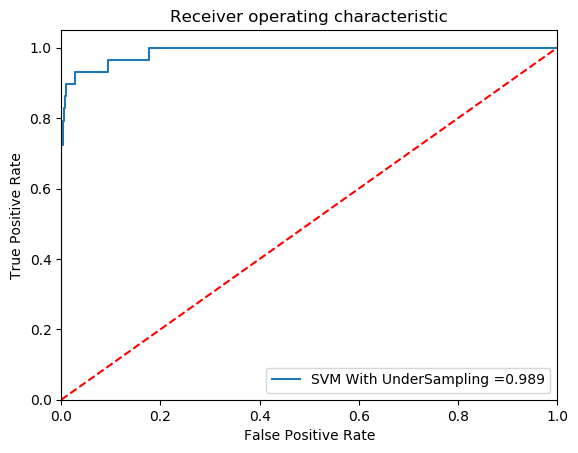

********************************************************************************
********************************************************************************


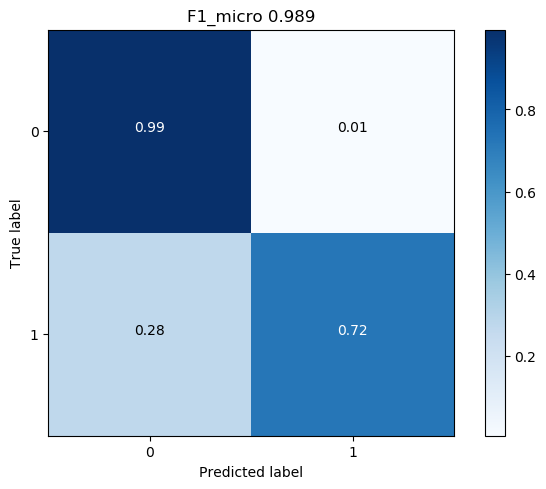

In [376]:
# ROC Curve
svm_p = SVC(probability = True) # for probability
clf_p = svm_p.fit(X_sm11, y_sm11.ravel()) # for probability
pred_proba = svm_p.predict_proba(X_test_com11)[::,1]
fpr, tpr, _ = roc_curve(y_test_com11,  pred_proba)
auc = roc_auc_score(y_test_com11, pred_proba)
plt.plot(fpr,tpr,label="SVM With UnderSampling ="+str(np.round(auc,3)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('*'*80)
cnf_mat = confusion_matrix(y_test_com11,pred2)
plotConfusionMatrix(cnf_mat, 2,title='F1_micro {:.3f}'.format(f1))
print('*'*80)